# 01 분류(Classification)의 개요

# 02 결정 트리

## 결정트리 모델의 특징

## 결정 트리 파라미터

## 결정 트리 모델의 시각화

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [7]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)

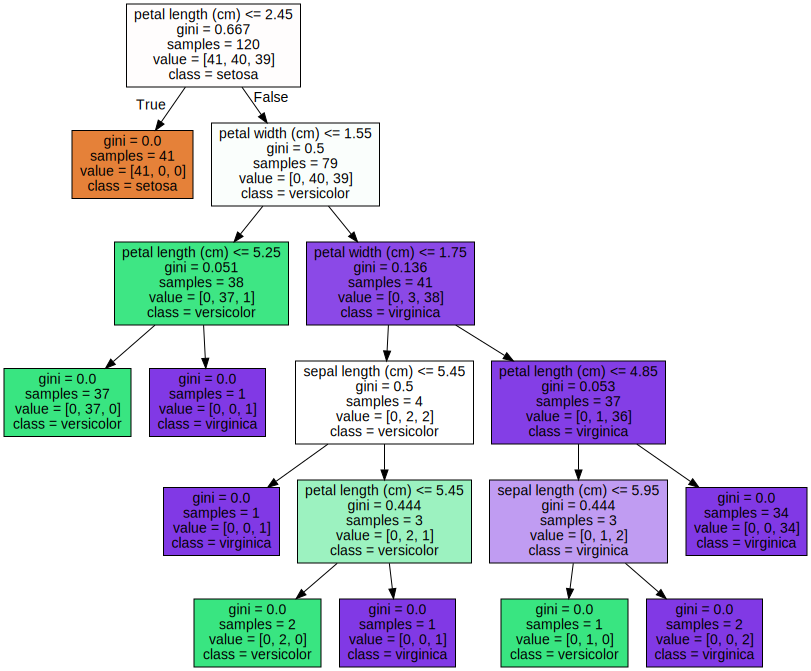

In [8]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importance:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

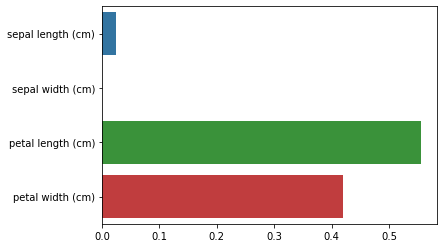

In [9]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importance:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

## 결정 트리 과적합(Overfitting)

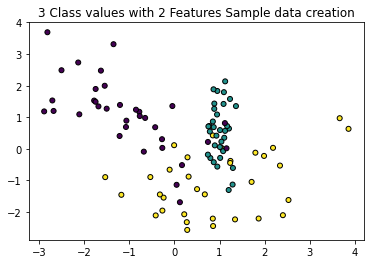

In [10]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                         n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1],marker='o',c=y_labels,s=25,edgecolor='k')

In [11]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

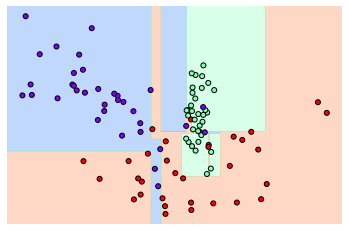

In [12]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

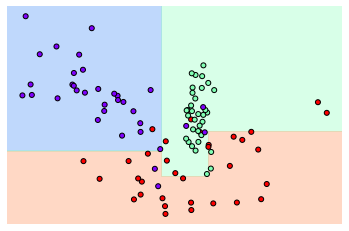

In [13]:
# min_samples_leat=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

## 결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+',
                             header=None, names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [16]:
# 중복된 피처명 찾기
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df)

                                      column_index
column_name                                       
angle(X,gravityMean)                             1
angle(Y,gravityMean)                             1
angle(Z,gravityMean)                             1
angle(tBodyAccJerkMean),gravityMean)             1
angle(tBodyAccMean,gravity)                      1
...                                            ...
tGravityAccMag-max()                             1
tGravityAccMag-mean()                            1
tGravityAccMag-min()                             1
tGravityAccMag-sma()                             1
tGravityAccMag-std()                             1

[477 rows x 1 columns]


In [18]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1])

                                  column_index
column_name                                   
fBodyAcc-bandsEnergy()-1,16                  3
fBodyAcc-bandsEnergy()-1,24                  3
fBodyAcc-bandsEnergy()-1,8                   3
fBodyAcc-bandsEnergy()-17,24                 3
fBodyAcc-bandsEnergy()-17,32                 3
fBodyAcc-bandsEnergy()-25,32                 3
fBodyAcc-bandsEnergy()-25,48                 3
fBodyAcc-bandsEnergy()-33,40                 3
fBodyAcc-bandsEnergy()-33,48                 3
fBodyAcc-bandsEnergy()-41,48                 3
fBodyAcc-bandsEnergy()-49,56                 3
fBodyAcc-bandsEnergy()-49,64                 3
fBodyAcc-bandsEnergy()-57,64                 3
fBodyAcc-bandsEnergy()-9,16                  3
fBodyAccJerk-bandsEnergy()-1,16              3
fBodyAccJerk-bandsEnergy()-1,24              3
fBodyAccJerk-bandsEnergy()-1,8               3
fBodyAccJerk-bandsEnergy()-17,24             3
fBodyAccJerk-bandsEnergy()-17,32             3
fBodyAccJerk-

In [19]:
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())

column_index    42
dtype: int64


In [20]:
feature_dup_df[feature_dup_df['column_index'] > 1].head()

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [21]:
# 새로운 피처명을 가지는 DataFrame을 반환하는 함수인 get_new_feature_name_df()를 생성
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [22]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [23]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [24]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n',dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [26]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24],
    'min_samples_split' : [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정화도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정화도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [27]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [28]:
max_depths = [6,8,10,12,16,20,24]
# max_depth 값을 변화시키면서 그떄마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


In [29]:
params = {
    'max_depth' : [8,12,16,20],
    'min_samples_split' : [16,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정화도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정화도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [30]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


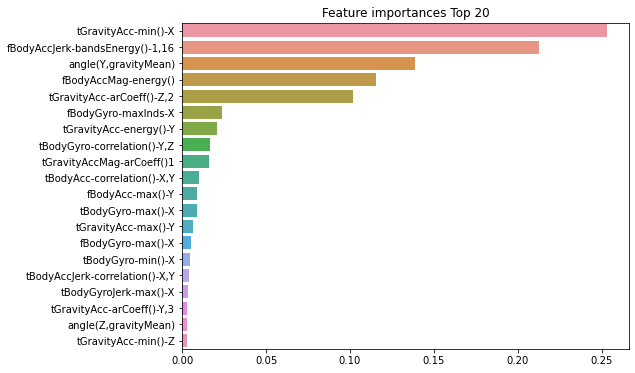

In [31]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, Seaborn의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

# 중요도 값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# 03 앙상블 학습

## 앙상블 학습 개요

## 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

## 보팅 분류기(Voting Classifier)

In [32]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [33]:
# 개별 모델은 로지스틱 회귀와 KNN
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

Voting 분류기 정확도 : 0.9561
LogisticRegression 정확도 : 0.9474
KNeighborsClassifier 정확도 : 0.9386


# 04 랜덤 포레스트

## 랜덤 포레스트의 개요 및 실습

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9196


## 랜덤 포레스트 하이퍼 파라미터 및 튜닝

In [35]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8,16,24],
    'min_samples_leaf' : [1,6,12],
    'min_samples_split' : [2,8,16]
}

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9165


In [36]:
rf_clf1=RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16,
                             min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred=rf_clf1.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도:0.9260


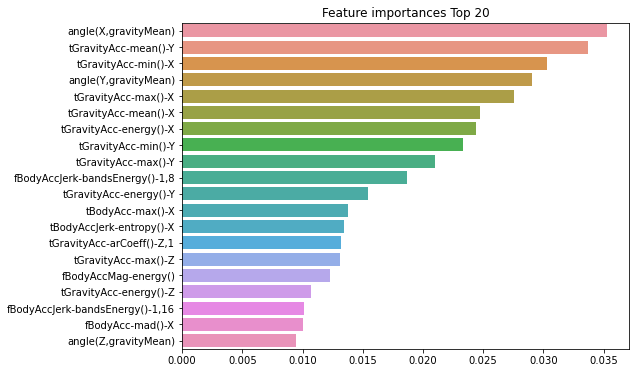

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# 05 GBM(Gradient Boosting Machine)

## GBM의 개요 및 실습

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간 : {0:.1f}'.format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행 시간 : 574.6


# 06 XGBoost(eXtra Gradient Boost)

## XGBoost 개요

## XGBoost 설치하기

In [40]:
import xgboost as xgb
from xgboost import XGBClassifier

## 파이썬 래퍼 XGBoost 하이퍼 파라미터

In [41]:
import xgboost
print(xgboost.__version__)

1.6.0


### 주요 일반 파라미터
### 주요 부스터 파라미터
### 학습 태스크 파라미터

## 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

In [42]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [43]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [45]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출

X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [46]:
# 학습, 검증, 테스트용 DMatrix를 생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [47]:
params = {'max_depth':3,
         'eta':0.05,
         'objective':'binary:logistic',
         'eval_metric':'logloss'
         }
num_rounds = 400

In [48]:
# 학습 데이터 셋은 train 또는 평가 데이터 셋은 eval로 명기
eval_list = [(dtr,'train'),(dval,'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train()함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds,
                     early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52930
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31892	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

[170]	train-logloss:0.01312	eval-logloss:0.26133
[171]	train-logloss:0.01304	eval-logloss:0.26148
[172]	train-logloss:0.01297	eval-logloss:0.26157
[173]	train-logloss:0.01285	eval-logloss:0.26253
[174]	train-logloss:0.01278	eval-logloss:0.26229
[175]	train-logloss:0.01267	eval-logloss:0.26086


In [49]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds = [ 1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:',preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [57]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC:0.9937


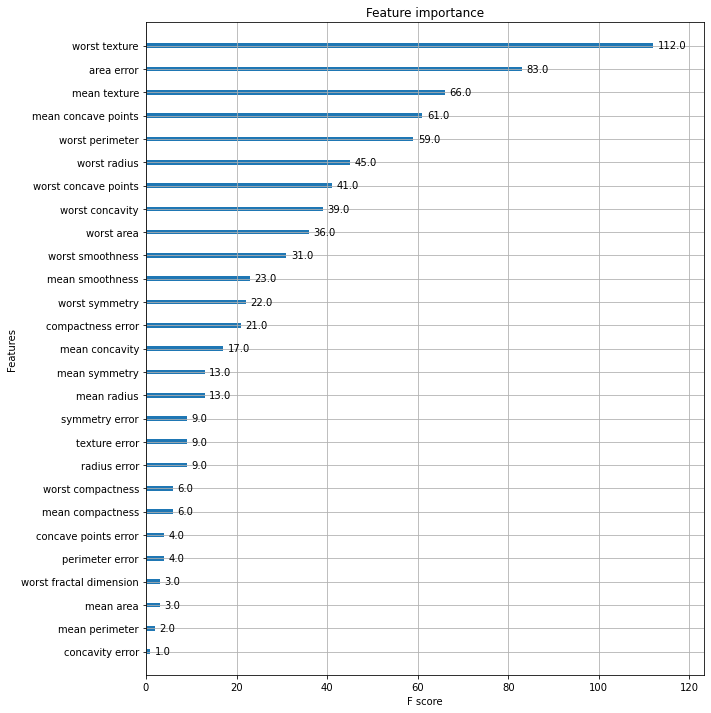

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)
plt.savefig('p239_xgb_feature_importance.tif', format='tif', dpi=300, bbox_inches='tight')

## 사이킷런 래퍼 XGBoost의 개요 및 적용

In [64]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [63]:
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1: 0.9806, AUC:0.9951


In [67]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

[238]	validation_0-logloss:0.08639
[239]	validation_0-logloss:0.08634
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.08620
[242]	validation_0-logloss:0.08625
[243]	validation_0-logloss:0.08626
[244]	validation_0-logloss:0.08629
[245]	validation_0-logloss:0.08622
[246]	validation_0-logloss:0.08640
[247]	validation_0-logloss:0.08635
[248]	validation_0-logloss:0.08628
[249]	validation_0-logloss:0.08645
[250]	validation_0-logloss:0.08629
[251]	validation_0-logloss:0.08631
[252]	validation_0-logloss:0.08636
[253]	validation_0-logloss:0.08639
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.08644
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08646
[258]	validation_0-logloss:0.08639
[259]	validation_0-logloss:0.08644
[260]	validation_0-logloss:0.08646
[261]	validation_0-logloss:0.08649
[262]	validation_0-logloss:0.08645
[263]	validation_0-logloss:0.08647
[264]	validation_0-logloss:0.08632
[265]	validation_0-logloss:0.08649
[266]	validation_0-l

In [68]:
get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870, F1: 0.9744, AUC:0.9954


In [69]:
# early_stopping_rounds를 10으로 설정하고 재학습
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

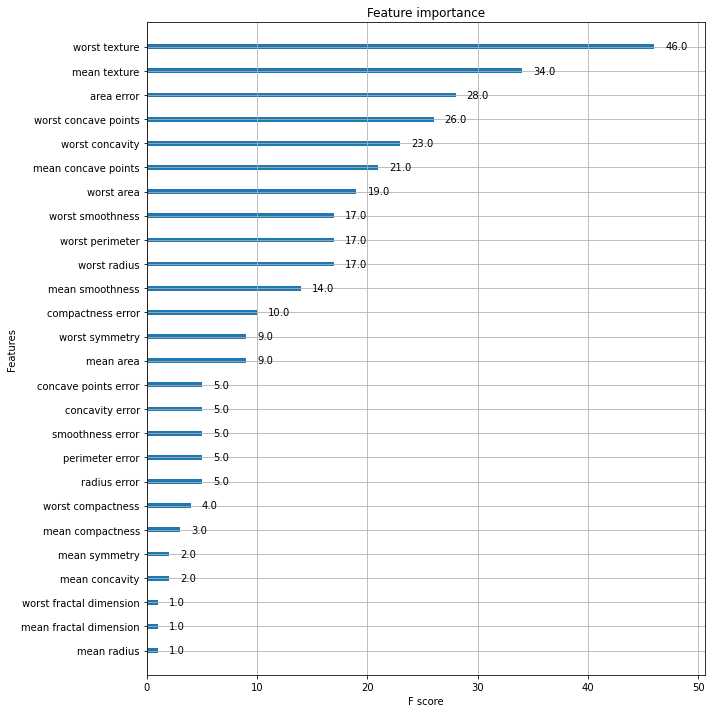

In [70]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방
plot_importance(xgb_wrapper, ax=ax)

# 07 LightGBM

## LightGBM 설치

## LightGBM 하이퍼 파라미터

### 주요 파라미터
### Learning Task 파라미터

## 하이퍼 파라미터 튜닝 방안

## 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교

## LightGBM 적용 - 위스콘신 유방암 예측

In [1]:
import lightgbm
print(lightgbm.__version__)

3.3.2


In [2]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target'] = dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

C:\Users\jy\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\jy\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [4]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC:0.9877


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

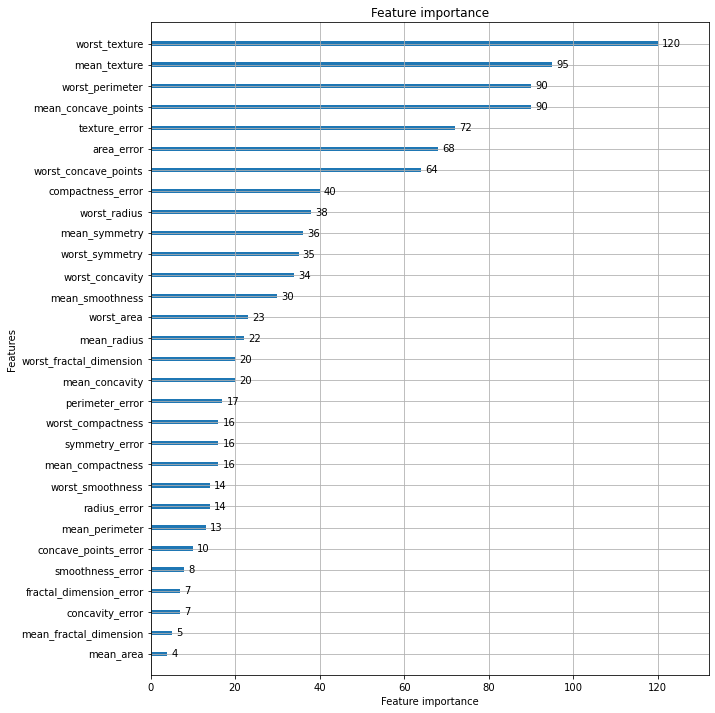

In [5]:
# plot_importance()를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

# 08 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝

## 베이지안 최적화 개요

## HyperOpt 사용하기

In [7]:
from hyperopt import hp

# -10 ~ 10까지 1간격을 가지는 입력 변수 x와 -15 ~ 15까지 1간격으로 입력 변수 y설정
search_space = {'x':hp.quniform('x',-10,10,1), 'y':hp.quniform('y',-15,15,1)}

In [8]:
from hyperopt import STATUS_OK

# 목적 함수를 생성, 변숫값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정값을 반환
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y
    
    return retval

In [9]:
import numpy as np
from hyperopt import fmin, tpe, Trials

# 입력 결괏값을 저장한 Trials 객체값 생성
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_evals=5)로 찾아냄
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5,
              trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:',best_01)

100%|█████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 283.28trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


In [10]:
trial_val = Trials()

# max_evals를 20회로 늘려서 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20,
              trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:',best_02)

100%|███████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 781.06trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


In [11]:
# fmin()에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적 함수 반환값들이 저장됨
# 리스트 내부의 개별 원소는 {'loss':함수 반환값, 'status':반환 상태값}와 같은 딕셔너리임.
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [12]:
# Trial 객체의 vals 속성에 {'입력변수명': 개별 수행시마다 입력된 값 리스트} 형태로 저장됨
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


In [13]:
import pandas as pd

# results에서 loss 키값에 해당하는 밸류들을 추출하여 list로 생성
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

# DataFrame으로 생성
result_df = pd.DataFrame({'x': trial_val.vals['x'], 'y': trial_val.vals['y'], 'losses':losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


## HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화

In [14]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

In [16]:
from hyperopt import hp

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1 사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색

xgb_search_space = {'max_depth' : hp.quniform('max_depth',5,20,1),
                   'min_child_weight' : hp.quniform('min_child_weight',1,2,1),
                   'learning_rate' : hp.uniform('learning_rate',0.01,0.2),
                   'colsample_bytree' : hp.uniform('colsample_bytree',0.5,1)}

In [17]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함
# 정확도는 높을수록 더 좋은 수치임 # -1 * 정확도를 통해 큰 정확도 값일수록 최소가 되도록 변환

def objective_func(search_space):
    
    # 수행시간 절약을 위해 nestimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                           min_child_weight=int(search_space['min_child_weight']),
                           learning_rate = search_space['learning_rate'],
                           colsample_bytree = search_space['colsample_bytree'],
                           eval_metric='logloss')
    
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
    
    # accurcy는 cv=3 개수 만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱합
    return {'loss':-1*np.mean(accuracy), 'status':STATUS_OK}

In [18]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
           space=xgb_search_space,
           algo=tpe.suggest,
           max_evals=50,
           trials=trial_val, rstate=np.random.default_rng(seed=9))

print('best:',best)

100%|███████████████████████████████████████████████| 50/50 [00:09<00:00,  5.29trial/s, best loss: -0.9670616939700244]
best: {'colsample_bytree': 0.5424149213362504, 'learning_rate': 0.12601372924444681, 'max_depth': 17.0, 'min_child_weight': 2.0}


In [19]:
print('colsample_bytree :{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(round(best['colsample_bytree'],5),
                                                                                             round(best['learning_rate'],5),
                                                                                             int(best['max_depth']),
                                                                                             int(best['min_child_weight'])))

colsample_bytree :0.54241, learning_rate:0.12601, max_depth:17, min_child_weight:2


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [24]:
xgb_wrapper = XGBClassifier(n_estimators=400,
                            learning_rate=round(best['learning_rate'], 5),
                            max_depth=int(best['max_depth']),
                            min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'], 5)
                           )

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
                eval_set=evals, verbose=True)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.58942	validation_1-logloss:0.62048
[1]	validation_0-logloss:0.50801	validation_1-logloss:0.55913
[2]	validation_0-logloss:0.44160	validation_1-logloss:0.50928
[3]	validation_0-logloss:0.38734	validation_1-logloss:0.46815
[4]	validation_0-logloss:0.34224	validation_1-logloss:0.43913
[5]	validation_0-logloss:0.30425	validation_1-logloss:0.41570
[6]	validation_0-logloss:0.27178	validation_1-logloss:0.38953
[7]	validation_0-logloss:0.24503	validation_1-logloss:0.37317
[8]	validation_0-logloss:0.22050	validation_1-logloss:0.35628
[9]	validation_0-logloss:0.19873	validation_1-logloss:0.33798
[10]	validation_0-logloss:0.17945	validation_1-logloss:0.32463
[11]	validation_0-logloss:0.16354	validation_1-logloss:0.31384
[12]	validation_0-logloss:0.15032	validation_1-logloss:0.30607
[13]	validation_0-logloss:0.13813	validation_1-logloss:0.30143
[14]	validation_0-logloss:0.12798	validation_1-logloss:0.29513
[15]	validation_0-logloss:0.11926	validation_1-logloss:0.28891
[1

[130]	validation_0-logloss:0.01639	validation_1-logloss:0.22934
[131]	validation_0-logloss:0.01634	validation_1-logloss:0.22987
[132]	validation_0-logloss:0.01629	validation_1-logloss:0.22927
[133]	validation_0-logloss:0.01624	validation_1-logloss:0.23076
[134]	validation_0-logloss:0.01620	validation_1-logloss:0.23030
[135]	validation_0-logloss:0.01615	validation_1-logloss:0.22891
[136]	validation_0-logloss:0.01610	validation_1-logloss:0.22883
[137]	validation_0-logloss:0.01606	validation_1-logloss:0.22882
[138]	validation_0-logloss:0.01601	validation_1-logloss:0.22876
[139]	validation_0-logloss:0.01597	validation_1-logloss:0.22734
[140]	validation_0-logloss:0.01592	validation_1-logloss:0.22882
[141]	validation_0-logloss:0.01588	validation_1-logloss:0.22935
[142]	validation_0-logloss:0.01583	validation_1-logloss:0.22880
[143]	validation_0-logloss:0.01579	validation_1-logloss:0.22856
[144]	validation_0-logloss:0.01575	validation_1-logloss:0.22725
[145]	validation_0-logloss:0.01571	valid

# 09 분류 실습 - 캐글 산탄데르 고객 만족 예측

## 데이터 전처리

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv('./train_santander.csv',encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [26]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [27]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format(unsatisfied_cnt / total_cnt))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [28]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [29]:
cust_df['var3'].replace(-999999,2,inplace=True)
cust_df.drop('ID',axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리, 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_features=cust_df.iloc[:,:-1]
y_labels=cust_df.iloc[:,-1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()

print('학습 세트 shape:{0}, 테스트 세트 shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)

print('테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 shape:(60816, 369), 테스트 세트 shape:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64
테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [31]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

## XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.83092	validation_1-auc:0.80941
[2]	validation_0-auc:0.83207	validation_1-auc:0.80903
[3]	validation_0-auc:0.83288	validation_1-auc:0.80889
[4]	validation_0-auc:0.83414	validation_1-auc:0.80924
[5]	validation_0-auc:0.83524	validation_1-auc:0.80907
[6]	validation_0-auc:0.83568	validation_1-auc:0.81004
[7]	validation_0-auc:0.83741	validation_1-auc:0.81088
[8]	validation_0-auc:0.83896	validation_1-auc:0.81305
[9]	validation_0-auc:0.83949	validation_1-auc:0.81363
[10]	validation_0-auc:0.83908	validation_1-auc:0.81277
[11]	validation_0-auc:0.83913	validation_1-auc:0.81260
[12]	validation_0-auc:0.84009	validation_1-auc:0.81325
[13]	validation_0-auc:0.84081	validation_1-auc:0.81329
[14]	validation_0-auc:0.84196	validation_1-auc:0.81380
[15]	validation_0-auc:0.84394	validation_1-auc:0.81540
[16]	validation_0-auc:0.84414	validation_1-auc:0.81573
[17]	validation_0-auc:0.84437	validation_1-auc:0.81577
[18]	validation_0-au

[149]	validation_0-auc:0.90457	validation_1-auc:0.83346
[150]	validation_0-auc:0.90465	validation_1-auc:0.83343
[151]	validation_0-auc:0.90469	validation_1-auc:0.83344
[152]	validation_0-auc:0.90482	validation_1-auc:0.83342
[153]	validation_0-auc:0.90501	validation_1-auc:0.83339
[154]	validation_0-auc:0.90513	validation_1-auc:0.83336
[155]	validation_0-auc:0.90518	validation_1-auc:0.83334
[156]	validation_0-auc:0.90525	validation_1-auc:0.83331
[157]	validation_0-auc:0.90531	validation_1-auc:0.83339
[158]	validation_0-auc:0.90549	validation_1-auc:0.83330
[159]	validation_0-auc:0.90559	validation_1-auc:0.83331
[160]	validation_0-auc:0.90574	validation_1-auc:0.83342
[161]	validation_0-auc:0.90592	validation_1-auc:0.83339
[162]	validation_0-auc:0.90598	validation_1-auc:0.83340
[163]	validation_0-auc:0.90601	validation_1-auc:0.83340
[164]	validation_0-auc:0.90629	validation_1-auc:0.83337
[165]	validation_0-auc:0.90641	validation_1-auc:0.83333
[166]	validation_0-auc:0.90652	validation_1-auc:

In [36]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95 사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색

xgb_search_space = {'max_depth' : hp.quniform('max_depth',5,15,1),
                   'min_child_weight' : hp.quniform('min_child_weight',1,6,1),
                   'colsample_bytree':hp.uniform('colsample_bytree',0.5,0.95),
                   'learning_rate' : hp.uniform('learning_rate',0.01,0.2)}

In [37]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# fmin()에서 호출 시 search_space 값으로 XGBClassifier 교차 검증 후 -1 * roc_auc 평균값을 반환
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate']
                           )
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc',
                   eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환
    return -1 * np.mean(roc_auc_list)

In [38]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수를 호출. max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
           space=xgb_search_space,
           algo=tpe.suggest,
           max_evals=50, 
           trials=trials, rstate=np.random.default_rng(seed=30))

print('best:',best)

[0]	validation_0-auc:0.81678	validation_1-auc:0.79160                                                                  
[1]	validation_0-auc:0.82454	validation_1-auc:0.79688                                                                  
[2]	validation_0-auc:0.83323	validation_1-auc:0.80572                                                                  
[3]	validation_0-auc:0.83854	validation_1-auc:0.81095                                                                  
[4]	validation_0-auc:0.83847	validation_1-auc:0.80989                                                                  
[5]	validation_0-auc:0.83879	validation_1-auc:0.80978                                                                  
[6]	validation_0-auc:0.84053	validation_1-auc:0.81042                                                                  
[7]	validation_0-auc:0.84129	validation_1-auc:0.81116                                                                  
[8]	validation_0-auc:0.84224	validation_

[68]	validation_0-auc:0.89250	validation_1-auc:0.83282                                                                 
[69]	validation_0-auc:0.89269	validation_1-auc:0.83292                                                                 
[70]	validation_0-auc:0.89308	validation_1-auc:0.83292                                                                 
[71]	validation_0-auc:0.89361	validation_1-auc:0.83264                                                                 
[72]	validation_0-auc:0.89406	validation_1-auc:0.83256                                                                 
[73]	validation_0-auc:0.89430	validation_1-auc:0.83239                                                                 
[74]	validation_0-auc:0.89457	validation_1-auc:0.83261                                                                 
[75]	validation_0-auc:0.89482	validation_1-auc:0.83233                                                                 
[76]	validation_0-auc:0.89494	validation

[47]	validation_0-auc:0.88318	validation_1-auc:0.83603                                                                 
[48]	validation_0-auc:0.88406	validation_1-auc:0.83587                                                                 
[49]	validation_0-auc:0.88499	validation_1-auc:0.83567                                                                 
[50]	validation_0-auc:0.88567	validation_1-auc:0.83621                                                                 
[51]	validation_0-auc:0.88617	validation_1-auc:0.83640                                                                 
[52]	validation_0-auc:0.88688	validation_1-auc:0.83592                                                                 
[53]	validation_0-auc:0.88747	validation_1-auc:0.83641                                                                 
[54]	validation_0-auc:0.88846	validation_1-auc:0.83647                                                                 
[55]	validation_0-auc:0.88912	validation

[15]	validation_0-auc:0.85543	validation_1-auc:0.82596                                                                 
[16]	validation_0-auc:0.85660	validation_1-auc:0.82658                                                                 
[17]	validation_0-auc:0.85740	validation_1-auc:0.82710                                                                 
[18]	validation_0-auc:0.85886	validation_1-auc:0.82679                                                                 
[19]	validation_0-auc:0.85976	validation_1-auc:0.82722                                                                 
[20]	validation_0-auc:0.86042	validation_1-auc:0.82733                                                                 
[21]	validation_0-auc:0.86157	validation_1-auc:0.82861                                                                 
[22]	validation_0-auc:0.86180	validation_1-auc:0.82913                                                                 
[23]	validation_0-auc:0.86289	validation

[83]	validation_0-auc:0.90074	validation_1-auc:0.83709                                                                 
[84]	validation_0-auc:0.90102	validation_1-auc:0.83728                                                                 
[85]	validation_0-auc:0.90138	validation_1-auc:0.83751                                                                 
[86]	validation_0-auc:0.90155	validation_1-auc:0.83765                                                                 
[87]	validation_0-auc:0.90164	validation_1-auc:0.83763                                                                 
[88]	validation_0-auc:0.90170	validation_1-auc:0.83761                                                                 
[89]	validation_0-auc:0.90205	validation_1-auc:0.83762                                                                 
[90]	validation_0-auc:0.90245	validation_1-auc:0.83791                                                                 
[91]	validation_0-auc:0.90253	validation

[51]	validation_0-auc:0.90405	validation_1-auc:0.83032                                                                 
[52]	validation_0-auc:0.90442	validation_1-auc:0.83093                                                                 
[53]	validation_0-auc:0.90522	validation_1-auc:0.82994                                                                 
[54]	validation_0-auc:0.90567	validation_1-auc:0.82977                                                                 
[55]	validation_0-auc:0.90641	validation_1-auc:0.82996                                                                 
[56]	validation_0-auc:0.90675	validation_1-auc:0.82932                                                                 
[57]	validation_0-auc:0.90716	validation_1-auc:0.82900                                                                 
[58]	validation_0-auc:0.90809	validation_1-auc:0.82926                                                                 
[59]	validation_0-auc:0.90880	validation

[37]	validation_0-auc:0.89056	validation_1-auc:0.82864                                                                 
[38]	validation_0-auc:0.89098	validation_1-auc:0.82831                                                                 
[39]	validation_0-auc:0.89170	validation_1-auc:0.82861                                                                 
[40]	validation_0-auc:0.89309	validation_1-auc:0.82975                                                                 
[41]	validation_0-auc:0.89324	validation_1-auc:0.82911                                                                 
[42]	validation_0-auc:0.89552	validation_1-auc:0.82967                                                                 
[43]	validation_0-auc:0.89671	validation_1-auc:0.82997                                                                 
[44]	validation_0-auc:0.89801	validation_1-auc:0.83066                                                                 
[45]	validation_0-auc:0.89859	validation

[5]	validation_0-auc:0.85510	validation_1-auc:0.82100                                                                  
[6]	validation_0-auc:0.85611	validation_1-auc:0.82251                                                                  
[7]	validation_0-auc:0.85814	validation_1-auc:0.82231                                                                  
[8]	validation_0-auc:0.85953	validation_1-auc:0.82212                                                                  
[9]	validation_0-auc:0.86282	validation_1-auc:0.82205                                                                  
[10]	validation_0-auc:0.86284	validation_1-auc:0.82076                                                                 
[11]	validation_0-auc:0.86207	validation_1-auc:0.82028                                                                 
[12]	validation_0-auc:0.86463	validation_1-auc:0.82218                                                                 
[13]	validation_0-auc:0.86692	validation

[73]	validation_0-auc:0.91871	validation_1-auc:0.83085                                                                 
[74]	validation_0-auc:0.91939	validation_1-auc:0.83065                                                                 
[75]	validation_0-auc:0.91973	validation_1-auc:0.83107                                                                 
[76]	validation_0-auc:0.92015	validation_1-auc:0.83147                                                                 
[77]	validation_0-auc:0.92044	validation_1-auc:0.83143                                                                 
[78]	validation_0-auc:0.92071	validation_1-auc:0.83193                                                                 
[79]	validation_0-auc:0.92112	validation_1-auc:0.83232                                                                 
[80]	validation_0-auc:0.92183	validation_1-auc:0.83284                                                                 
[81]	validation_0-auc:0.92233	validation

[41]	validation_0-auc:0.93518	validation_1-auc:0.82577                                                                 
[42]	validation_0-auc:0.93575	validation_1-auc:0.82560                                                                 
[43]	validation_0-auc:0.93603	validation_1-auc:0.82574                                                                 
[44]	validation_0-auc:0.93697	validation_1-auc:0.82628                                                                 
[45]	validation_0-auc:0.93714	validation_1-auc:0.82631                                                                 
[46]	validation_0-auc:0.93740	validation_1-auc:0.82635                                                                 
[47]	validation_0-auc:0.93805	validation_1-auc:0.82599                                                                 
[48]	validation_0-auc:0.93842	validation_1-auc:0.82550                                                                 
[49]	validation_0-auc:0.93865	validation

[51]	validation_0-auc:0.94156	validation_1-auc:0.83151                                                                 
[52]	validation_0-auc:0.94219	validation_1-auc:0.83151                                                                 
[53]	validation_0-auc:0.94260	validation_1-auc:0.83139                                                                 
[54]	validation_0-auc:0.94326	validation_1-auc:0.83146                                                                 
[55]	validation_0-auc:0.94342	validation_1-auc:0.83148                                                                 
[0]	validation_0-auc:0.83493	validation_1-auc:0.81063                                                                  
[1]	validation_0-auc:0.84197	validation_1-auc:0.81316                                                                  
[2]	validation_0-auc:0.85026	validation_1-auc:0.81739                                                                  
[3]	validation_0-auc:0.85484	validation_

[63]	validation_0-auc:0.94587	validation_1-auc:0.83211                                                                 
[64]	validation_0-auc:0.94588	validation_1-auc:0.83213                                                                 
[65]	validation_0-auc:0.94617	validation_1-auc:0.83215                                                                 
[66]	validation_0-auc:0.94637	validation_1-auc:0.83167                                                                 
[67]	validation_0-auc:0.94649	validation_1-auc:0.83147                                                                 
[68]	validation_0-auc:0.94655	validation_1-auc:0.83137                                                                 
[69]	validation_0-auc:0.94663	validation_1-auc:0.83122                                                                 
[70]	validation_0-auc:0.94733	validation_1-auc:0.83109                                                                 
[71]	validation_0-auc:0.94744	validation

[44]	validation_0-auc:0.89368	validation_1-auc:0.83013                                                                 
[45]	validation_0-auc:0.89462	validation_1-auc:0.83043                                                                 
[46]	validation_0-auc:0.89491	validation_1-auc:0.83080                                                                 
[47]	validation_0-auc:0.89603	validation_1-auc:0.83055                                                                 
[48]	validation_0-auc:0.89664	validation_1-auc:0.83082                                                                 
[49]	validation_0-auc:0.89744	validation_1-auc:0.83093                                                                 
[50]	validation_0-auc:0.89780	validation_1-auc:0.83066                                                                 
[51]	validation_0-auc:0.89840	validation_1-auc:0.83060                                                                 
[52]	validation_0-auc:0.89947	validation

[12]	validation_0-auc:0.85695	validation_1-auc:0.82279                                                                 
[13]	validation_0-auc:0.86039	validation_1-auc:0.82427                                                                 
[14]	validation_0-auc:0.86126	validation_1-auc:0.82481                                                                 
[15]	validation_0-auc:0.86335	validation_1-auc:0.82649                                                                 
[16]	validation_0-auc:0.86505	validation_1-auc:0.82707                                                                 
[17]	validation_0-auc:0.86622	validation_1-auc:0.82740                                                                 
[18]	validation_0-auc:0.86591	validation_1-auc:0.82552                                                                 
[19]	validation_0-auc:0.86830	validation_1-auc:0.82661                                                                 
[20]	validation_0-auc:0.86984	validation

[80]	validation_0-auc:0.91933	validation_1-auc:0.83045                                                                 
[81]	validation_0-auc:0.91976	validation_1-auc:0.83005                                                                 
[0]	validation_0-auc:0.83132	validation_1-auc:0.81167                                                                  
[1]	validation_0-auc:0.83662	validation_1-auc:0.81285                                                                  
[2]	validation_0-auc:0.84048	validation_1-auc:0.81616                                                                  
[3]	validation_0-auc:0.84220	validation_1-auc:0.81680                                                                  
[4]	validation_0-auc:0.84545	validation_1-auc:0.81751                                                                  
[5]	validation_0-auc:0.85363	validation_1-auc:0.82067                                                                  
[6]	validation_0-auc:0.85464	validation_

[66]	validation_0-auc:0.91174	validation_1-auc:0.82650                                                                 
[67]	validation_0-auc:0.91210	validation_1-auc:0.82694                                                                 
[68]	validation_0-auc:0.91279	validation_1-auc:0.82720                                                                 
[69]	validation_0-auc:0.91354	validation_1-auc:0.82750                                                                 
[70]	validation_0-auc:0.91416	validation_1-auc:0.82789                                                                 
[71]	validation_0-auc:0.91459	validation_1-auc:0.82784                                                                 
[72]	validation_0-auc:0.91521	validation_1-auc:0.82798                                                                 
[73]	validation_0-auc:0.91593	validation_1-auc:0.82770                                                                 
[74]	validation_0-auc:0.91641	validation

[47]	validation_0-auc:0.94894	validation_1-auc:0.82298                                                                 
[48]	validation_0-auc:0.94990	validation_1-auc:0.82219                                                                 
[49]	validation_0-auc:0.95038	validation_1-auc:0.82191                                                                 
[50]	validation_0-auc:0.95054	validation_1-auc:0.82184                                                                 
[51]	validation_0-auc:0.95128	validation_1-auc:0.82163                                                                 
[52]	validation_0-auc:0.95158	validation_1-auc:0.82149                                                                 
[53]	validation_0-auc:0.95166	validation_1-auc:0.82083                                                                 
[54]	validation_0-auc:0.95247	validation_1-auc:0.82074                                                                 
[0]	validation_0-auc:0.82403	validation_

[4]	validation_0-auc:0.86408	validation_1-auc:0.82143                                                                  
[5]	validation_0-auc:0.86731	validation_1-auc:0.82281                                                                  
[6]	validation_0-auc:0.87105	validation_1-auc:0.82461                                                                  
[7]	validation_0-auc:0.87499	validation_1-auc:0.82682                                                                  
[8]	validation_0-auc:0.88082	validation_1-auc:0.82873                                                                  
[9]	validation_0-auc:0.88887	validation_1-auc:0.82957                                                                  
[10]	validation_0-auc:0.89139	validation_1-auc:0.82678                                                                 
[11]	validation_0-auc:0.89241	validation_1-auc:0.82558                                                                 
[12]	validation_0-auc:0.90053	validation

[72]	validation_0-auc:0.95870	validation_1-auc:0.82823                                                                 
[0]	validation_0-auc:0.82360	validation_1-auc:0.80052                                                                  
[1]	validation_0-auc:0.82942	validation_1-auc:0.80498                                                                  
[2]	validation_0-auc:0.83477	validation_1-auc:0.80715                                                                  
[3]	validation_0-auc:0.83989	validation_1-auc:0.81232                                                                  
[4]	validation_0-auc:0.84115	validation_1-auc:0.81348                                                                  
[5]	validation_0-auc:0.84452	validation_1-auc:0.81346                                                                  
[6]	validation_0-auc:0.84443	validation_1-auc:0.81594                                                                  
[7]	validation_0-auc:0.84529	validation_

[67]	validation_0-auc:0.90020	validation_1-auc:0.83153                                                                 
[68]	validation_0-auc:0.90036	validation_1-auc:0.83136                                                                 
[69]	validation_0-auc:0.90048	validation_1-auc:0.83120                                                                 
[70]	validation_0-auc:0.90067	validation_1-auc:0.83097                                                                 
[71]	validation_0-auc:0.90076	validation_1-auc:0.83103                                                                 
[72]	validation_0-auc:0.90084	validation_1-auc:0.83093                                                                 
[73]	validation_0-auc:0.90118	validation_1-auc:0.83070                                                                 
[74]	validation_0-auc:0.90127	validation_1-auc:0.83063                                                                 
[75]	validation_0-auc:0.90185	validation

[56]	validation_0-auc:0.89672	validation_1-auc:0.83663                                                                 
[57]	validation_0-auc:0.89782	validation_1-auc:0.83644                                                                 
[58]	validation_0-auc:0.89819	validation_1-auc:0.83676                                                                 
[59]	validation_0-auc:0.89874	validation_1-auc:0.83668                                                                 
[60]	validation_0-auc:0.89903	validation_1-auc:0.83703                                                                 
[61]	validation_0-auc:0.89949	validation_1-auc:0.83693                                                                 
[62]	validation_0-auc:0.89969	validation_1-auc:0.83691                                                                 
[63]	validation_0-auc:0.90010	validation_1-auc:0.83696                                                                 
[64]	validation_0-auc:0.90034	validation

[33]	validation_0-auc:0.88175	validation_1-auc:0.83352                                                                 
[34]	validation_0-auc:0.88221	validation_1-auc:0.83393                                                                 
[35]	validation_0-auc:0.88276	validation_1-auc:0.83483                                                                 
[36]	validation_0-auc:0.88370	validation_1-auc:0.83404                                                                 
[37]	validation_0-auc:0.88449	validation_1-auc:0.83298                                                                 
[38]	validation_0-auc:0.88524	validation_1-auc:0.83292                                                                 
[39]	validation_0-auc:0.88642	validation_1-auc:0.83380                                                                 
[40]	validation_0-auc:0.88757	validation_1-auc:0.83466                                                                 
[41]	validation_0-auc:0.88798	validation

[1]	validation_0-auc:0.83035	validation_1-auc:0.80555                                                                  
[2]	validation_0-auc:0.83743	validation_1-auc:0.80962                                                                  
[3]	validation_0-auc:0.84180	validation_1-auc:0.81318                                                                  
[4]	validation_0-auc:0.84380	validation_1-auc:0.81329                                                                  
[5]	validation_0-auc:0.84851	validation_1-auc:0.81871                                                                  
[6]	validation_0-auc:0.84902	validation_1-auc:0.82071                                                                  
[7]	validation_0-auc:0.85059	validation_1-auc:0.82073                                                                  
[8]	validation_0-auc:0.85241	validation_1-auc:0.82129                                                                  
[9]	validation_0-auc:0.85349	validation_

[69]	validation_0-auc:0.90619	validation_1-auc:0.83042                                                                 
[70]	validation_0-auc:0.90650	validation_1-auc:0.83019                                                                 
[71]	validation_0-auc:0.90680	validation_1-auc:0.82995                                                                 
[72]	validation_0-auc:0.90706	validation_1-auc:0.83011                                                                 
[73]	validation_0-auc:0.90719	validation_1-auc:0.83011                                                                 
[74]	validation_0-auc:0.90728	validation_1-auc:0.82986                                                                 
[75]	validation_0-auc:0.90785	validation_1-auc:0.82980                                                                 
[76]	validation_0-auc:0.90803	validation_1-auc:0.82983                                                                 
[77]	validation_0-auc:0.90814	validation

[56]	validation_0-auc:0.90389	validation_1-auc:0.83862                                                                 
[57]	validation_0-auc:0.90487	validation_1-auc:0.83861                                                                 
[58]	validation_0-auc:0.90542	validation_1-auc:0.83840                                                                 
[59]	validation_0-auc:0.90570	validation_1-auc:0.83853                                                                 
[60]	validation_0-auc:0.90596	validation_1-auc:0.83851                                                                 
[61]	validation_0-auc:0.90632	validation_1-auc:0.83839                                                                 
[62]	validation_0-auc:0.90677	validation_1-auc:0.83827                                                                 
[63]	validation_0-auc:0.90685	validation_1-auc:0.83828                                                                 
[64]	validation_0-auc:0.90742	validation

[38]	validation_0-auc:0.89416	validation_1-auc:0.83307                                                                 
[39]	validation_0-auc:0.89455	validation_1-auc:0.83377                                                                 
[40]	validation_0-auc:0.89508	validation_1-auc:0.83410                                                                 
[41]	validation_0-auc:0.89605	validation_1-auc:0.83380                                                                 
[42]	validation_0-auc:0.89664	validation_1-auc:0.83407                                                                 
[43]	validation_0-auc:0.89736	validation_1-auc:0.83460                                                                 
[44]	validation_0-auc:0.89794	validation_1-auc:0.83521                                                                 
[45]	validation_0-auc:0.89842	validation_1-auc:0.83514                                                                 
[46]	validation_0-auc:0.89896	validation

[18]	validation_0-auc:0.88113	validation_1-auc:0.82245                                                                 
[19]	validation_0-auc:0.88332	validation_1-auc:0.82334                                                                 
[20]	validation_0-auc:0.88573	validation_1-auc:0.82505                                                                 
[21]	validation_0-auc:0.88681	validation_1-auc:0.82486                                                                 
[22]	validation_0-auc:0.88876	validation_1-auc:0.82493                                                                 
[23]	validation_0-auc:0.89089	validation_1-auc:0.82591                                                                 
[24]	validation_0-auc:0.89300	validation_1-auc:0.82668                                                                 
[25]	validation_0-auc:0.89373	validation_1-auc:0.82710                                                                 
[26]	validation_0-auc:0.89669	validation

[1]	validation_0-auc:0.82829	validation_1-auc:0.80807                                                                  
[2]	validation_0-auc:0.83970	validation_1-auc:0.82030                                                                  
[3]	validation_0-auc:0.84190	validation_1-auc:0.81994                                                                  
[4]	validation_0-auc:0.84854	validation_1-auc:0.81987                                                                  
[5]	validation_0-auc:0.85006	validation_1-auc:0.82088                                                                  
[6]	validation_0-auc:0.85222	validation_1-auc:0.82112                                                                  
[7]	validation_0-auc:0.85523	validation_1-auc:0.82275                                                                  
[8]	validation_0-auc:0.85818	validation_1-auc:0.82406                                                                  
[9]	validation_0-auc:0.86445	validation_

[69]	validation_0-auc:0.93655	validation_1-auc:0.83172                                                                 
[70]	validation_0-auc:0.93705	validation_1-auc:0.83178                                                                 
[71]	validation_0-auc:0.93771	validation_1-auc:0.83118                                                                 
[72]	validation_0-auc:0.93808	validation_1-auc:0.83156                                                                 
[73]	validation_0-auc:0.93892	validation_1-auc:0.83138                                                                 
[74]	validation_0-auc:0.93926	validation_1-auc:0.83160                                                                 
[0]	validation_0-auc:0.83124	validation_1-auc:0.81038                                                                  
[1]	validation_0-auc:0.83818	validation_1-auc:0.81239                                                                  
[2]	validation_0-auc:0.84484	validation_

[62]	validation_0-auc:0.93318	validation_1-auc:0.82783                                                                 
[63]	validation_0-auc:0.93384	validation_1-auc:0.82766                                                                 
[64]	validation_0-auc:0.93428	validation_1-auc:0.82757                                                                 
[65]	validation_0-auc:0.93469	validation_1-auc:0.82757                                                                 
[66]	validation_0-auc:0.93521	validation_1-auc:0.82748                                                                 
[67]	validation_0-auc:0.93563	validation_1-auc:0.82762                                                                 
[0]	validation_0-auc:0.81859	validation_1-auc:0.79401                                                                  
[1]	validation_0-auc:0.82667	validation_1-auc:0.79829                                                                  
[2]	validation_0-auc:0.83794	validation_

[62]	validation_0-auc:0.89613	validation_1-auc:0.83102                                                                 
[63]	validation_0-auc:0.89634	validation_1-auc:0.83089                                                                 
[64]	validation_0-auc:0.89711	validation_1-auc:0.83084                                                                 
[65]	validation_0-auc:0.89742	validation_1-auc:0.83075                                                                 
[66]	validation_0-auc:0.89779	validation_1-auc:0.83091                                                                 
[67]	validation_0-auc:0.89852	validation_1-auc:0.83059                                                                 
[68]	validation_0-auc:0.89891	validation_1-auc:0.83071                                                                 
[69]	validation_0-auc:0.89908	validation_1-auc:0.83059                                                                 
[70]	validation_0-auc:0.89948	validation

[55]	validation_0-auc:0.89547	validation_1-auc:0.83766                                                                 
[56]	validation_0-auc:0.89562	validation_1-auc:0.83760                                                                 
[57]	validation_0-auc:0.89575	validation_1-auc:0.83758                                                                 
[58]	validation_0-auc:0.89625	validation_1-auc:0.83752                                                                 
[59]	validation_0-auc:0.89650	validation_1-auc:0.83735                                                                 
[60]	validation_0-auc:0.89681	validation_1-auc:0.83733                                                                 
[61]	validation_0-auc:0.89717	validation_1-auc:0.83723                                                                 
[62]	validation_0-auc:0.89745	validation_1-auc:0.83742                                                                 
[63]	validation_0-auc:0.89773	validation

[38]	validation_0-auc:0.88857	validation_1-auc:0.83654                                                                 
[39]	validation_0-auc:0.88890	validation_1-auc:0.83659                                                                 
[40]	validation_0-auc:0.88931	validation_1-auc:0.83679                                                                 
[41]	validation_0-auc:0.89042	validation_1-auc:0.83666                                                                 
[42]	validation_0-auc:0.89080	validation_1-auc:0.83690                                                                 
[43]	validation_0-auc:0.89130	validation_1-auc:0.83702                                                                 
[44]	validation_0-auc:0.89158	validation_1-auc:0.83713                                                                 
[45]	validation_0-auc:0.89193	validation_1-auc:0.83713                                                                 
[46]	validation_0-auc:0.89288	validation

[28]	validation_0-auc:0.93284	validation_1-auc:0.82648                                                                 
[29]	validation_0-auc:0.93483	validation_1-auc:0.82646                                                                 
[30]	validation_0-auc:0.93646	validation_1-auc:0.82704                                                                 
[31]	validation_0-auc:0.93763	validation_1-auc:0.82709                                                                 
[32]	validation_0-auc:0.93931	validation_1-auc:0.82669                                                                 
[33]	validation_0-auc:0.94040	validation_1-auc:0.82653                                                                 
[34]	validation_0-auc:0.94183	validation_1-auc:0.82578                                                                 
[35]	validation_0-auc:0.94259	validation_1-auc:0.82556                                                                 
[36]	validation_0-auc:0.94350	validation

[34]	validation_0-auc:0.94537	validation_1-auc:0.82935                                                                 
[35]	validation_0-auc:0.94594	validation_1-auc:0.82961                                                                 
[36]	validation_0-auc:0.94696	validation_1-auc:0.82966                                                                 
[37]	validation_0-auc:0.94770	validation_1-auc:0.82970                                                                 
[38]	validation_0-auc:0.94860	validation_1-auc:0.82976                                                                 
[39]	validation_0-auc:0.94885	validation_1-auc:0.83000                                                                 
[40]	validation_0-auc:0.94912	validation_1-auc:0.83029                                                                 
[41]	validation_0-auc:0.94989	validation_1-auc:0.82984                                                                 
[42]	validation_0-auc:0.95007	validation

[2]	validation_0-auc:0.83779	validation_1-auc:0.80277                                                                  
[3]	validation_0-auc:0.84273	validation_1-auc:0.80541                                                                  
[4]	validation_0-auc:0.84638	validation_1-auc:0.80658                                                                  
[5]	validation_0-auc:0.84766	validation_1-auc:0.80842                                                                  
[6]	validation_0-auc:0.84894	validation_1-auc:0.80814                                                                  
[7]	validation_0-auc:0.84896	validation_1-auc:0.80815                                                                  
[8]	validation_0-auc:0.85010	validation_1-auc:0.80798                                                                  
[9]	validation_0-auc:0.85468	validation_1-auc:0.81248                                                                  
[10]	validation_0-auc:0.85398	validation

[70]	validation_0-auc:0.90776	validation_1-auc:0.82812                                                                 
[71]	validation_0-auc:0.90867	validation_1-auc:0.82778                                                                 
[72]	validation_0-auc:0.90940	validation_1-auc:0.82804                                                                 
[73]	validation_0-auc:0.91043	validation_1-auc:0.82784                                                                 
[74]	validation_0-auc:0.91103	validation_1-auc:0.82764                                                                 
[75]	validation_0-auc:0.91160	validation_1-auc:0.82833                                                                 
[76]	validation_0-auc:0.91205	validation_1-auc:0.82881                                                                 
[77]	validation_0-auc:0.91238	validation_1-auc:0.82869                                                                 
[78]	validation_0-auc:0.91264	validation

[38]	validation_0-auc:0.88251	validation_1-auc:0.82825                                                                 
[39]	validation_0-auc:0.88301	validation_1-auc:0.82863                                                                 
[40]	validation_0-auc:0.88356	validation_1-auc:0.82866                                                                 
[41]	validation_0-auc:0.88450	validation_1-auc:0.82818                                                                 
[42]	validation_0-auc:0.88512	validation_1-auc:0.82814                                                                 
[43]	validation_0-auc:0.88664	validation_1-auc:0.82820                                                                 
[44]	validation_0-auc:0.88796	validation_1-auc:0.82858                                                                 
[45]	validation_0-auc:0.88818	validation_1-auc:0.82855                                                                 
[46]	validation_0-auc:0.88895	validation

[16]	validation_0-auc:0.86748	validation_1-auc:0.82136                                                                 
[17]	validation_0-auc:0.86815	validation_1-auc:0.82228                                                                 
[18]	validation_0-auc:0.86755	validation_1-auc:0.82170                                                                 
[19]	validation_0-auc:0.86983	validation_1-auc:0.82301                                                                 
[20]	validation_0-auc:0.87138	validation_1-auc:0.82417                                                                 
[21]	validation_0-auc:0.87197	validation_1-auc:0.82444                                                                 
[22]	validation_0-auc:0.87274	validation_1-auc:0.82485                                                                 
[23]	validation_0-auc:0.87326	validation_1-auc:0.82499                                                                 
[24]	validation_0-auc:0.87370	validation

[84]	validation_0-auc:0.92208	validation_1-auc:0.82661                                                                 
[85]	validation_0-auc:0.92230	validation_1-auc:0.82676                                                                 
[0]	validation_0-auc:0.83081	validation_1-auc:0.80035                                                                  
[1]	validation_0-auc:0.84305	validation_1-auc:0.80465                                                                  
[2]	validation_0-auc:0.85330	validation_1-auc:0.80929                                                                  
[3]	validation_0-auc:0.85737	validation_1-auc:0.81038                                                                  
[4]	validation_0-auc:0.86174	validation_1-auc:0.81116                                                                  
[5]	validation_0-auc:0.86638	validation_1-auc:0.81160                                                                  
[6]	validation_0-auc:0.87146	validation_

[14]	validation_0-auc:0.91052	validation_1-auc:0.82452                                                                 
[15]	validation_0-auc:0.91498	validation_1-auc:0.82420                                                                 
[16]	validation_0-auc:0.91954	validation_1-auc:0.82277                                                                 
[17]	validation_0-auc:0.92317	validation_1-auc:0.82260                                                                 
[18]	validation_0-auc:0.92702	validation_1-auc:0.82331                                                                 
[19]	validation_0-auc:0.92922	validation_1-auc:0.82368                                                                 
[20]	validation_0-auc:0.93139	validation_1-auc:0.82398                                                                 
[21]	validation_0-auc:0.93471	validation_1-auc:0.82381                                                                 
[22]	validation_0-auc:0.93702	validation

[43]	validation_0-auc:0.96485	validation_1-auc:0.82551                                                                 
[44]	validation_0-auc:0.96530	validation_1-auc:0.82528                                                                 
[45]	validation_0-auc:0.96573	validation_1-auc:0.82501                                                                 
[46]	validation_0-auc:0.96582	validation_1-auc:0.82507                                                                 
[47]	validation_0-auc:0.96615	validation_1-auc:0.82459                                                                 
[48]	validation_0-auc:0.96656	validation_1-auc:0.82440                                                                 
[49]	validation_0-auc:0.96672	validation_1-auc:0.82446                                                                 
[50]	validation_0-auc:0.96697	validation_1-auc:0.82434                                                                 
[51]	validation_0-auc:0.96706	validation

[51]	validation_0-auc:0.87133	validation_1-auc:0.82970                                                                 
[52]	validation_0-auc:0.87204	validation_1-auc:0.82978                                                                 
[53]	validation_0-auc:0.87265	validation_1-auc:0.83013                                                                 
[54]	validation_0-auc:0.87268	validation_1-auc:0.82977                                                                 
[55]	validation_0-auc:0.87356	validation_1-auc:0.83006                                                                 
[56]	validation_0-auc:0.87385	validation_1-auc:0.83006                                                                 
[57]	validation_0-auc:0.87434	validation_1-auc:0.82979                                                                 
[58]	validation_0-auc:0.87515	validation_1-auc:0.83028                                                                 
[59]	validation_0-auc:0.87573	validation

[19]	validation_0-auc:0.85609	validation_1-auc:0.82862                                                                 
[20]	validation_0-auc:0.85677	validation_1-auc:0.82940                                                                 
[21]	validation_0-auc:0.85594	validation_1-auc:0.82816                                                                 
[22]	validation_0-auc:0.85678	validation_1-auc:0.82825                                                                 
[23]	validation_0-auc:0.85704	validation_1-auc:0.82818                                                                 
[24]	validation_0-auc:0.85797	validation_1-auc:0.82904                                                                 
[25]	validation_0-auc:0.85870	validation_1-auc:0.82960                                                                 
[26]	validation_0-auc:0.85985	validation_1-auc:0.82882                                                                 
[27]	validation_0-auc:0.86048	validation

[5]	validation_0-auc:0.84622	validation_1-auc:0.81941                                                                  
[6]	validation_0-auc:0.84618	validation_1-auc:0.82124                                                                  
[7]	validation_0-auc:0.84786	validation_1-auc:0.82226                                                                  
[8]	validation_0-auc:0.84799	validation_1-auc:0.82221                                                                  
[9]	validation_0-auc:0.85094	validation_1-auc:0.82382                                                                  
[10]	validation_0-auc:0.85242	validation_1-auc:0.82335                                                                 
[11]	validation_0-auc:0.85262	validation_1-auc:0.82360                                                                 
[12]	validation_0-auc:0.85389	validation_1-auc:0.82421                                                                 
[13]	validation_0-auc:0.85536	validation

[73]	validation_0-auc:0.88389	validation_1-auc:0.83012                                                                 
[74]	validation_0-auc:0.88410	validation_1-auc:0.82983                                                                 
[75]	validation_0-auc:0.88447	validation_1-auc:0.83001                                                                 
[76]	validation_0-auc:0.88479	validation_1-auc:0.83036                                                                 
[77]	validation_0-auc:0.88491	validation_1-auc:0.83034                                                                 
[78]	validation_0-auc:0.88547	validation_1-auc:0.83091                                                                 
[79]	validation_0-auc:0.88600	validation_1-auc:0.83089                                                                 
[80]	validation_0-auc:0.88683	validation_1-auc:0.83144                                                                 
[81]	validation_0-auc:0.88698	validation

[41]	validation_0-auc:0.89110	validation_1-auc:0.82729                                                                 
[42]	validation_0-auc:0.89274	validation_1-auc:0.82738                                                                 
[43]	validation_0-auc:0.89383	validation_1-auc:0.82723                                                                 
[44]	validation_0-auc:0.89516	validation_1-auc:0.82725                                                                 
[45]	validation_0-auc:0.89636	validation_1-auc:0.82719                                                                 
[46]	validation_0-auc:0.89722	validation_1-auc:0.82727                                                                 
[47]	validation_0-auc:0.89797	validation_1-auc:0.82714                                                                 
[48]	validation_0-auc:0.89857	validation_1-auc:0.82715                                                                 
[49]	validation_0-auc:0.89959	validation

[9]	validation_0-auc:0.85716	validation_1-auc:0.82500                                                                  
[10]	validation_0-auc:0.85689	validation_1-auc:0.82353                                                                 
[11]	validation_0-auc:0.85935	validation_1-auc:0.82496                                                                 
[12]	validation_0-auc:0.86032	validation_1-auc:0.82578                                                                 
[13]	validation_0-auc:0.86247	validation_1-auc:0.82554                                                                 
[14]	validation_0-auc:0.86548	validation_1-auc:0.82660                                                                 
[15]	validation_0-auc:0.86711	validation_1-auc:0.82668                                                                 
[16]	validation_0-auc:0.86827	validation_1-auc:0.82619                                                                 
[17]	validation_0-auc:0.87006	validation

[77]	validation_0-auc:0.92581	validation_1-auc:0.83183                                                                 
[78]	validation_0-auc:0.92661	validation_1-auc:0.83175                                                                 
[79]	validation_0-auc:0.92736	validation_1-auc:0.83151                                                                 
[80]	validation_0-auc:0.92804	validation_1-auc:0.83157                                                                 
[81]	validation_0-auc:0.92848	validation_1-auc:0.83157                                                                 
[82]	validation_0-auc:0.92888	validation_1-auc:0.83173                                                                 
[83]	validation_0-auc:0.92956	validation_1-auc:0.83132                                                                 
[84]	validation_0-auc:0.93003	validation_1-auc:0.83120                                                                 
[85]	validation_0-auc:0.93041	validation

[54]	validation_0-auc:0.90939	validation_1-auc:0.83210                                                                 
[55]	validation_0-auc:0.91027	validation_1-auc:0.83158                                                                 
[56]	validation_0-auc:0.91086	validation_1-auc:0.83196                                                                 
[57]	validation_0-auc:0.91179	validation_1-auc:0.83196                                                                 
[58]	validation_0-auc:0.91312	validation_1-auc:0.83161                                                                 
[59]	validation_0-auc:0.91422	validation_1-auc:0.83107                                                                 
[60]	validation_0-auc:0.91546	validation_1-auc:0.83090                                                                 
[61]	validation_0-auc:0.91673	validation_1-auc:0.83071                                                                 
[62]	validation_0-auc:0.91728	validation

[22]	validation_0-auc:0.85681	validation_1-auc:0.82477                                                                 
[23]	validation_0-auc:0.85732	validation_1-auc:0.82452                                                                 
[24]	validation_0-auc:0.85855	validation_1-auc:0.82485                                                                 
[25]	validation_0-auc:0.85909	validation_1-auc:0.82580                                                                 
[26]	validation_0-auc:0.86004	validation_1-auc:0.82602                                                                 
[27]	validation_0-auc:0.86139	validation_1-auc:0.82707                                                                 
[28]	validation_0-auc:0.86227	validation_1-auc:0.82748                                                                 
[29]	validation_0-auc:0.86288	validation_1-auc:0.82773                                                                 
[30]	validation_0-auc:0.86358	validation

[90]	validation_0-auc:0.88760	validation_1-auc:0.83383                                                                 
[91]	validation_0-auc:0.88781	validation_1-auc:0.83377                                                                 
[92]	validation_0-auc:0.88790	validation_1-auc:0.83377                                                                 
[93]	validation_0-auc:0.88795	validation_1-auc:0.83370                                                                 
[94]	validation_0-auc:0.88855	validation_1-auc:0.83380                                                                 
[95]	validation_0-auc:0.88889	validation_1-auc:0.83374                                                                 
[0]	validation_0-auc:0.81725	validation_1-auc:0.80400                                                                  
[1]	validation_0-auc:0.81999	validation_1-auc:0.80754                                                                  
[2]	validation_0-auc:0.83016	validation_

[62]	validation_0-auc:0.88081	validation_1-auc:0.83806                                                                 
[63]	validation_0-auc:0.88124	validation_1-auc:0.83779                                                                 
[64]	validation_0-auc:0.88187	validation_1-auc:0.83811                                                                 
[65]	validation_0-auc:0.88219	validation_1-auc:0.83812                                                                 
[66]	validation_0-auc:0.88238	validation_1-auc:0.83814                                                                 
[67]	validation_0-auc:0.88285	validation_1-auc:0.83819                                                                 
[68]	validation_0-auc:0.88297	validation_1-auc:0.83831                                                                 
[69]	validation_0-auc:0.88313	validation_1-auc:0.83834                                                                 
[70]	validation_0-auc:0.88329	validation

[30]	validation_0-auc:0.86338	validation_1-auc:0.83101                                                                 
[31]	validation_0-auc:0.86439	validation_1-auc:0.83161                                                                 
[32]	validation_0-auc:0.86466	validation_1-auc:0.83197                                                                 
[33]	validation_0-auc:0.86556	validation_1-auc:0.83276                                                                 
[34]	validation_0-auc:0.86597	validation_1-auc:0.83307                                                                 
[35]	validation_0-auc:0.86697	validation_1-auc:0.83381                                                                 
[36]	validation_0-auc:0.86734	validation_1-auc:0.83407                                                                 
[37]	validation_0-auc:0.86783	validation_1-auc:0.83312                                                                 
[38]	validation_0-auc:0.86866	validation

[14]	validation_0-auc:0.89962	validation_1-auc:0.82381                                                                 
[15]	validation_0-auc:0.90221	validation_1-auc:0.82191                                                                 
[16]	validation_0-auc:0.90525	validation_1-auc:0.82377                                                                 
[17]	validation_0-auc:0.91046	validation_1-auc:0.82585                                                                 
[18]	validation_0-auc:0.91160	validation_1-auc:0.82451                                                                 
[19]	validation_0-auc:0.91616	validation_1-auc:0.82498                                                                 
[20]	validation_0-auc:0.91688	validation_1-auc:0.82366                                                                 
[21]	validation_0-auc:0.91728	validation_1-auc:0.82145                                                                 
[22]	validation_0-auc:0.91956	validation

[22]	validation_0-auc:0.92039	validation_1-auc:0.82464                                                                 
[23]	validation_0-auc:0.92398	validation_1-auc:0.82616                                                                 
[24]	validation_0-auc:0.92671	validation_1-auc:0.82652                                                                 
[25]	validation_0-auc:0.92839	validation_1-auc:0.82776                                                                 
[26]	validation_0-auc:0.93076	validation_1-auc:0.82657                                                                 
[27]	validation_0-auc:0.93325	validation_1-auc:0.82706                                                                 
[28]	validation_0-auc:0.93350	validation_1-auc:0.82604                                                                 
[29]	validation_0-auc:0.93581	validation_1-auc:0.82708                                                                 
[30]	validation_0-auc:0.93822	validation

[11]	validation_0-auc:0.89200	validation_1-auc:0.81930                                                                 
[12]	validation_0-auc:0.89562	validation_1-auc:0.82232                                                                 
[13]	validation_0-auc:0.90113	validation_1-auc:0.82496                                                                 
[14]	validation_0-auc:0.90277	validation_1-auc:0.82560                                                                 
[15]	validation_0-auc:0.90582	validation_1-auc:0.82322                                                                 
[16]	validation_0-auc:0.90824	validation_1-auc:0.82488                                                                 
[17]	validation_0-auc:0.91124	validation_1-auc:0.82566                                                                 
[18]	validation_0-auc:0.91177	validation_1-auc:0.82388                                                                 
[19]	validation_0-auc:0.91706	validation

[2]	validation_0-auc:0.83515	validation_1-auc:0.80736                                                                  
[3]	validation_0-auc:0.83743	validation_1-auc:0.81050                                                                  
[4]	validation_0-auc:0.83961	validation_1-auc:0.81412                                                                  
[5]	validation_0-auc:0.84130	validation_1-auc:0.81356                                                                  
[6]	validation_0-auc:0.84316	validation_1-auc:0.81346                                                                  
[7]	validation_0-auc:0.84450	validation_1-auc:0.81398                                                                  
[8]	validation_0-auc:0.84570	validation_1-auc:0.81376                                                                  
[9]	validation_0-auc:0.84950	validation_1-auc:0.82011                                                                  
[10]	validation_0-auc:0.85001	validation

[70]	validation_0-auc:0.89670	validation_1-auc:0.83285                                                                 
[71]	validation_0-auc:0.89716	validation_1-auc:0.83275                                                                 
[72]	validation_0-auc:0.89739	validation_1-auc:0.83284                                                                 
[73]	validation_0-auc:0.89772	validation_1-auc:0.83275                                                                 
[74]	validation_0-auc:0.89805	validation_1-auc:0.83258                                                                 
[75]	validation_0-auc:0.89821	validation_1-auc:0.83263                                                                 
[76]	validation_0-auc:0.89846	validation_1-auc:0.83267                                                                 
[77]	validation_0-auc:0.89870	validation_1-auc:0.83271                                                                 
[78]	validation_0-auc:0.89884	validation

[53]	validation_0-auc:0.89042	validation_1-auc:0.83594                                                                 
[54]	validation_0-auc:0.89100	validation_1-auc:0.83605                                                                 
[55]	validation_0-auc:0.89172	validation_1-auc:0.83606                                                                 
[56]	validation_0-auc:0.89211	validation_1-auc:0.83618                                                                 
[57]	validation_0-auc:0.89274	validation_1-auc:0.83576                                                                 
[58]	validation_0-auc:0.89325	validation_1-auc:0.83624                                                                 
[59]	validation_0-auc:0.89373	validation_1-auc:0.83602                                                                 
[60]	validation_0-auc:0.89444	validation_1-auc:0.83585                                                                 
[61]	validation_0-auc:0.89484	validation

[21]	validation_0-auc:0.86693	validation_1-auc:0.82827                                                                 
[22]	validation_0-auc:0.86857	validation_1-auc:0.82916                                                                 
[23]	validation_0-auc:0.86885	validation_1-auc:0.82967                                                                 
[24]	validation_0-auc:0.87034	validation_1-auc:0.83051                                                                 
[25]	validation_0-auc:0.87073	validation_1-auc:0.83124                                                                 
[26]	validation_0-auc:0.87170	validation_1-auc:0.83133                                                                 
[27]	validation_0-auc:0.87261	validation_1-auc:0.83132                                                                 
[28]	validation_0-auc:0.87358	validation_1-auc:0.83126                                                                 
[29]	validation_0-auc:0.87385	validation

[89]	validation_0-auc:0.90516	validation_1-auc:0.83732                                                                 
[90]	validation_0-auc:0.90545	validation_1-auc:0.83748                                                                 
[91]	validation_0-auc:0.90558	validation_1-auc:0.83748                                                                 
[92]	validation_0-auc:0.90589	validation_1-auc:0.83719                                                                 
[93]	validation_0-auc:0.90602	validation_1-auc:0.83722                                                                 
[94]	validation_0-auc:0.90634	validation_1-auc:0.83731                                                                 
[95]	validation_0-auc:0.90642	validation_1-auc:0.83730                                                                 
[96]	validation_0-auc:0.90656	validation_1-auc:0.83722                                                                 
[97]	validation_0-auc:0.90696	validation

[0]	validation_0-auc:0.82909	validation_1-auc:0.80527                                                                  
[1]	validation_0-auc:0.83375	validation_1-auc:0.80772                                                                  
[2]	validation_0-auc:0.84361	validation_1-auc:0.81841                                                                  
[3]	validation_0-auc:0.84901	validation_1-auc:0.81846                                                                  
[4]	validation_0-auc:0.85490	validation_1-auc:0.81990                                                                  
[5]	validation_0-auc:0.85957	validation_1-auc:0.82105                                                                  
[6]	validation_0-auc:0.86485	validation_1-auc:0.82222                                                                  
[7]	validation_0-auc:0.86759	validation_1-auc:0.82318                                                                  
[8]	validation_0-auc:0.87234	validation_

[10]	validation_0-auc:0.88007	validation_1-auc:0.81823                                                                 
[11]	validation_0-auc:0.88385	validation_1-auc:0.81975                                                                 
[12]	validation_0-auc:0.88666	validation_1-auc:0.82037                                                                 
[13]	validation_0-auc:0.88917	validation_1-auc:0.82065                                                                 
[14]	validation_0-auc:0.89266	validation_1-auc:0.82162                                                                 
[15]	validation_0-auc:0.89671	validation_1-auc:0.82323                                                                 
[16]	validation_0-auc:0.89943	validation_1-auc:0.82347                                                                 
[17]	validation_0-auc:0.90360	validation_1-auc:0.82314                                                                 
[18]	validation_0-auc:0.90670	validation

[15]	validation_0-auc:0.86810	validation_1-auc:0.82103                                                                 
[16]	validation_0-auc:0.86886	validation_1-auc:0.82088                                                                 
[17]	validation_0-auc:0.87101	validation_1-auc:0.82240                                                                 
[18]	validation_0-auc:0.87268	validation_1-auc:0.82211                                                                 
[19]	validation_0-auc:0.87574	validation_1-auc:0.82305                                                                 
[20]	validation_0-auc:0.87708	validation_1-auc:0.82327                                                                 
[21]	validation_0-auc:0.87859	validation_1-auc:0.82364                                                                 
[22]	validation_0-auc:0.87941	validation_1-auc:0.82396                                                                 
[23]	validation_0-auc:0.88020	validation

[83]	validation_0-auc:0.93798	validation_1-auc:0.82676                                                                 
[84]	validation_0-auc:0.93817	validation_1-auc:0.82671                                                                 
[85]	validation_0-auc:0.93850	validation_1-auc:0.82690                                                                 
[86]	validation_0-auc:0.93877	validation_1-auc:0.82683                                                                 
[87]	validation_0-auc:0.93892	validation_1-auc:0.82677                                                                 
[88]	validation_0-auc:0.93922	validation_1-auc:0.82662                                                                 
[0]	validation_0-auc:0.82222	validation_1-auc:0.80496                                                                  
[1]	validation_0-auc:0.82852	validation_1-auc:0.80666                                                                  
[2]	validation_0-auc:0.83996	validation_

[62]	validation_0-auc:0.93209	validation_1-auc:0.82887                                                                 
[63]	validation_0-auc:0.93272	validation_1-auc:0.82895                                                                 
[64]	validation_0-auc:0.93349	validation_1-auc:0.82938                                                                 
[65]	validation_0-auc:0.93413	validation_1-auc:0.82941                                                                 
[66]	validation_0-auc:0.93482	validation_1-auc:0.82954                                                                 
[67]	validation_0-auc:0.93564	validation_1-auc:0.82942                                                                 
[68]	validation_0-auc:0.93619	validation_1-auc:0.82936                                                                 
[69]	validation_0-auc:0.93662	validation_1-auc:0.82927                                                                 
[70]	validation_0-auc:0.93730	validation

[57]	validation_0-auc:0.93083	validation_1-auc:0.83198                                                                 
[58]	validation_0-auc:0.93163	validation_1-auc:0.83199                                                                 
[59]	validation_0-auc:0.93235	validation_1-auc:0.83193                                                                 
[60]	validation_0-auc:0.93335	validation_1-auc:0.83154                                                                 
[61]	validation_0-auc:0.93413	validation_1-auc:0.83143                                                                 
[62]	validation_0-auc:0.93466	validation_1-auc:0.83138                                                                 
[63]	validation_0-auc:0.93536	validation_1-auc:0.83159                                                                 
[64]	validation_0-auc:0.93599	validation_1-auc:0.83158                                                                 
[65]	validation_0-auc:0.93652	validation

[58]	validation_0-auc:0.89334	validation_1-auc:0.83314                                                                 
[59]	validation_0-auc:0.89386	validation_1-auc:0.83322                                                                 
[60]	validation_0-auc:0.89448	validation_1-auc:0.83333                                                                 
[61]	validation_0-auc:0.89497	validation_1-auc:0.83350                                                                 
[62]	validation_0-auc:0.89544	validation_1-auc:0.83345                                                                 
[63]	validation_0-auc:0.89597	validation_1-auc:0.83335                                                                 
[64]	validation_0-auc:0.89621	validation_1-auc:0.83319                                                                 
[65]	validation_0-auc:0.89647	validation_1-auc:0.83318                                                                 
[66]	validation_0-auc:0.89659	validation

[43]	validation_0-auc:0.88424	validation_1-auc:0.83625                                                                 
[44]	validation_0-auc:0.88490	validation_1-auc:0.83623                                                                 
[45]	validation_0-auc:0.88532	validation_1-auc:0.83637                                                                 
[46]	validation_0-auc:0.88608	validation_1-auc:0.83620                                                                 
[47]	validation_0-auc:0.88675	validation_1-auc:0.83634                                                                 
[48]	validation_0-auc:0.88753	validation_1-auc:0.83637                                                                 
[49]	validation_0-auc:0.88831	validation_1-auc:0.83664                                                                 
[50]	validation_0-auc:0.88881	validation_1-auc:0.83699                                                                 
[51]	validation_0-auc:0.88913	validation

[26]	validation_0-auc:0.87257	validation_1-auc:0.83324                                                                 
[27]	validation_0-auc:0.87356	validation_1-auc:0.83358                                                                 
[28]	validation_0-auc:0.87429	validation_1-auc:0.83363                                                                 
[29]	validation_0-auc:0.87502	validation_1-auc:0.83483                                                                 
[30]	validation_0-auc:0.87612	validation_1-auc:0.83393                                                                 
[31]	validation_0-auc:0.87707	validation_1-auc:0.83424                                                                 
[32]	validation_0-auc:0.87834	validation_1-auc:0.83506                                                                 
[33]	validation_0-auc:0.87889	validation_1-auc:0.83506                                                                 
[34]	validation_0-auc:0.88018	validation

[94]	validation_0-auc:0.90483	validation_1-auc:0.83998                                                                 
[95]	validation_0-auc:0.90500	validation_1-auc:0.83983                                                                 
[96]	validation_0-auc:0.90511	validation_1-auc:0.83975                                                                 
[97]	validation_0-auc:0.90522	validation_1-auc:0.83970                                                                 
[98]	validation_0-auc:0.90554	validation_1-auc:0.83975                                                                 
[99]	validation_0-auc:0.90560	validation_1-auc:0.83974                                                                 
[0]	validation_0-auc:0.82528	validation_1-auc:0.80131                                                                  
[1]	validation_0-auc:0.83238	validation_1-auc:0.80233                                                                  
[2]	validation_0-auc:0.83748	validation_

[2]	validation_0-auc:0.83789	validation_1-auc:0.82153                                                                  
[3]	validation_0-auc:0.84188	validation_1-auc:0.82294                                                                  
[4]	validation_0-auc:0.84394	validation_1-auc:0.82154                                                                  
[5]	validation_0-auc:0.84682	validation_1-auc:0.82539                                                                  
[6]	validation_0-auc:0.84900	validation_1-auc:0.82528                                                                  
[7]	validation_0-auc:0.85097	validation_1-auc:0.82579                                                                  
[8]	validation_0-auc:0.85236	validation_1-auc:0.82771                                                                  
[9]	validation_0-auc:0.85994	validation_1-auc:0.82939                                                                  
[10]	validation_0-auc:0.86087	validation

[70]	validation_0-auc:0.91043	validation_1-auc:0.83653                                                                 
[71]	validation_0-auc:0.91067	validation_1-auc:0.83612                                                                 
[72]	validation_0-auc:0.91118	validation_1-auc:0.83635                                                                 
[73]	validation_0-auc:0.91140	validation_1-auc:0.83633                                                                 
[74]	validation_0-auc:0.91161	validation_1-auc:0.83601                                                                 
[75]	validation_0-auc:0.91195	validation_1-auc:0.83581                                                                 
[76]	validation_0-auc:0.91246	validation_1-auc:0.83577                                                                 
[77]	validation_0-auc:0.91249	validation_1-auc:0.83566                                                                 
[78]	validation_0-auc:0.91261	validation

[59]	validation_0-auc:0.90892	validation_1-auc:0.83591                                                                 
[60]	validation_0-auc:0.90933	validation_1-auc:0.83599                                                                 
[61]	validation_0-auc:0.90989	validation_1-auc:0.83570                                                                 
[62]	validation_0-auc:0.91037	validation_1-auc:0.83560                                                                 
[63]	validation_0-auc:0.91059	validation_1-auc:0.83556                                                                 
[64]	validation_0-auc:0.91110	validation_1-auc:0.83530                                                                 
[65]	validation_0-auc:0.91133	validation_1-auc:0.83509                                                                 
[66]	validation_0-auc:0.91156	validation_1-auc:0.83504                                                                 
[67]	validation_0-auc:0.91177	validation

[45]	validation_0-auc:0.84010	validation_1-auc:0.81655                                                                 
[46]	validation_0-auc:0.83998	validation_1-auc:0.81659                                                                 
[47]	validation_0-auc:0.83997	validation_1-auc:0.81651                                                                 
[48]	validation_0-auc:0.83981	validation_1-auc:0.81663                                                                 
[49]	validation_0-auc:0.83986	validation_1-auc:0.81671                                                                 
[50]	validation_0-auc:0.83989	validation_1-auc:0.81670                                                                 
[51]	validation_0-auc:0.84000	validation_1-auc:0.81710                                                                 
[52]	validation_0-auc:0.83976	validation_1-auc:0.81697                                                                 
[53]	validation_0-auc:0.84000	validation

[13]	validation_0-auc:0.82654	validation_1-auc:0.81443                                                                 
[14]	validation_0-auc:0.83001	validation_1-auc:0.81727                                                                 
[15]	validation_0-auc:0.83103	validation_1-auc:0.81871                                                                 
[16]	validation_0-auc:0.83115	validation_1-auc:0.81896                                                                 
[17]	validation_0-auc:0.83135	validation_1-auc:0.81933                                                                 
[18]	validation_0-auc:0.83174	validation_1-auc:0.81938                                                                 
[19]	validation_0-auc:0.83205	validation_1-auc:0.81990                                                                 
[20]	validation_0-auc:0.83134	validation_1-auc:0.81937                                                                 
[21]	validation_0-auc:0.83227	validation

[81]	validation_0-auc:0.84393	validation_1-auc:0.82837                                                                 
[82]	validation_0-auc:0.84387	validation_1-auc:0.82834                                                                 
[83]	validation_0-auc:0.84402	validation_1-auc:0.82815                                                                 
[84]	validation_0-auc:0.84415	validation_1-auc:0.82820                                                                 
[85]	validation_0-auc:0.84419	validation_1-auc:0.82806                                                                 
[86]	validation_0-auc:0.84442	validation_1-auc:0.82805                                                                 
[87]	validation_0-auc:0.84453	validation_1-auc:0.82825                                                                 
[88]	validation_0-auc:0.84476	validation_1-auc:0.82824                                                                 
[89]	validation_0-auc:0.84512	validation

[49]	validation_0-auc:0.84064	validation_1-auc:0.82591                                                                 
[50]	validation_0-auc:0.84066	validation_1-auc:0.82596                                                                 
[51]	validation_0-auc:0.84079	validation_1-auc:0.82585                                                                 
[52]	validation_0-auc:0.84148	validation_1-auc:0.82635                                                                 
[53]	validation_0-auc:0.84189	validation_1-auc:0.82668                                                                 
[54]	validation_0-auc:0.84209	validation_1-auc:0.82672                                                                 
[55]	validation_0-auc:0.84260	validation_1-auc:0.82680                                                                 
[56]	validation_0-auc:0.84279	validation_1-auc:0.82703                                                                 
[57]	validation_0-auc:0.84288	validation

[17]	validation_0-auc:0.85637	validation_1-auc:0.82909                                                                 
[18]	validation_0-auc:0.85654	validation_1-auc:0.82954                                                                 
[19]	validation_0-auc:0.85807	validation_1-auc:0.82977                                                                 
[20]	validation_0-auc:0.85819	validation_1-auc:0.82989                                                                 
[21]	validation_0-auc:0.85870	validation_1-auc:0.82927                                                                 
[22]	validation_0-auc:0.86030	validation_1-auc:0.82934                                                                 
[23]	validation_0-auc:0.86188	validation_1-auc:0.83016                                                                 
[24]	validation_0-auc:0.86308	validation_1-auc:0.83117                                                                 
[25]	validation_0-auc:0.86360	validation

[14]	validation_0-auc:0.85392	validation_1-auc:0.82970                                                                 
[15]	validation_0-auc:0.85550	validation_1-auc:0.83093                                                                 
[16]	validation_0-auc:0.85641	validation_1-auc:0.83097                                                                 
[17]	validation_0-auc:0.85819	validation_1-auc:0.83217                                                                 
[18]	validation_0-auc:0.85860	validation_1-auc:0.83205                                                                 
[19]	validation_0-auc:0.86078	validation_1-auc:0.83400                                                                 
[20]	validation_0-auc:0.86055	validation_1-auc:0.83333                                                                 
[21]	validation_0-auc:0.86103	validation_1-auc:0.83360                                                                 
[22]	validation_0-auc:0.86278	validation

[4]	validation_0-auc:0.83502	validation_1-auc:0.81995                                                                  
[5]	validation_0-auc:0.84129	validation_1-auc:0.82239                                                                  
[6]	validation_0-auc:0.84477	validation_1-auc:0.82441                                                                  
[7]	validation_0-auc:0.84662	validation_1-auc:0.82554                                                                  
[8]	validation_0-auc:0.84875	validation_1-auc:0.82677                                                                  
[9]	validation_0-auc:0.84909	validation_1-auc:0.82653                                                                  
[10]	validation_0-auc:0.84909	validation_1-auc:0.82664                                                                 
[11]	validation_0-auc:0.84740	validation_1-auc:0.82462                                                                 
[12]	validation_0-auc:0.85102	validation

[72]	validation_0-auc:0.88906	validation_1-auc:0.83885                                                                 
[73]	validation_0-auc:0.88950	validation_1-auc:0.83871                                                                 
[74]	validation_0-auc:0.88981	validation_1-auc:0.83864                                                                 
[75]	validation_0-auc:0.89005	validation_1-auc:0.83886                                                                 
[76]	validation_0-auc:0.89016	validation_1-auc:0.83883                                                                 
[77]	validation_0-auc:0.89025	validation_1-auc:0.83861                                                                 
[78]	validation_0-auc:0.89083	validation_1-auc:0.83842                                                                 
[79]	validation_0-auc:0.89092	validation_1-auc:0.83834                                                                 
[80]	validation_0-auc:0.89204	validation

[53]	validation_0-auc:0.87926	validation_1-auc:0.83392                                                                 
[54]	validation_0-auc:0.87975	validation_1-auc:0.83367                                                                 
[55]	validation_0-auc:0.87998	validation_1-auc:0.83371                                                                 
[56]	validation_0-auc:0.88057	validation_1-auc:0.83338                                                                 
[57]	validation_0-auc:0.88080	validation_1-auc:0.83306                                                                 
[58]	validation_0-auc:0.88093	validation_1-auc:0.83306                                                                 
[59]	validation_0-auc:0.88099	validation_1-auc:0.83302                                                                 
[60]	validation_0-auc:0.88158	validation_1-auc:0.83274                                                                 
[61]	validation_0-auc:0.88180	validation

[44]	validation_0-auc:0.87589	validation_1-auc:0.83760                                                                 
[45]	validation_0-auc:0.87618	validation_1-auc:0.83774                                                                 
[46]	validation_0-auc:0.87622	validation_1-auc:0.83780                                                                 
[47]	validation_0-auc:0.87655	validation_1-auc:0.83757                                                                 
[48]	validation_0-auc:0.87678	validation_1-auc:0.83754                                                                 
[49]	validation_0-auc:0.87753	validation_1-auc:0.83754                                                                 
[50]	validation_0-auc:0.87786	validation_1-auc:0.83775                                                                 
[51]	validation_0-auc:0.87851	validation_1-auc:0.83794                                                                 
[52]	validation_0-auc:0.87869	validation

[41]	validation_0-auc:0.87370	validation_1-auc:0.83956                                                                 
[42]	validation_0-auc:0.87411	validation_1-auc:0.83953                                                                 
[43]	validation_0-auc:0.87433	validation_1-auc:0.83975                                                                 
[44]	validation_0-auc:0.87464	validation_1-auc:0.83990                                                                 
[45]	validation_0-auc:0.87478	validation_1-auc:0.84011                                                                 
[46]	validation_0-auc:0.87508	validation_1-auc:0.84045                                                                 
[47]	validation_0-auc:0.87583	validation_1-auc:0.84041                                                                 
[48]	validation_0-auc:0.87633	validation_1-auc:0.84048                                                                 
[49]	validation_0-auc:0.87693	validation

[31]	validation_0-auc:0.87448	validation_1-auc:0.83507                                                                 
[32]	validation_0-auc:0.87554	validation_1-auc:0.83500                                                                 
[33]	validation_0-auc:0.87572	validation_1-auc:0.83483                                                                 
[34]	validation_0-auc:0.87577	validation_1-auc:0.83441                                                                 
[35]	validation_0-auc:0.87664	validation_1-auc:0.83401                                                                 
[36]	validation_0-auc:0.87695	validation_1-auc:0.83407                                                                 
[37]	validation_0-auc:0.87723	validation_1-auc:0.83399                                                                 
[38]	validation_0-auc:0.87745	validation_1-auc:0.83400                                                                 
[39]	validation_0-auc:0.87763	validation

[37]	validation_0-auc:0.87774	validation_1-auc:0.83731                                                                 
[38]	validation_0-auc:0.87823	validation_1-auc:0.83697                                                                 
[39]	validation_0-auc:0.87847	validation_1-auc:0.83728                                                                 
[40]	validation_0-auc:0.87857	validation_1-auc:0.83732                                                                 
[41]	validation_0-auc:0.87877	validation_1-auc:0.83703                                                                 
[42]	validation_0-auc:0.87970	validation_1-auc:0.83676                                                                 
[43]	validation_0-auc:0.87978	validation_1-auc:0.83690                                                                 
[44]	validation_0-auc:0.88067	validation_1-auc:0.83711                                                                 
[45]	validation_0-auc:0.88102	validation

[44]	validation_0-auc:0.88130	validation_1-auc:0.83965                                                                 
[45]	validation_0-auc:0.88147	validation_1-auc:0.83985                                                                 
[46]	validation_0-auc:0.88219	validation_1-auc:0.83969                                                                 
[47]	validation_0-auc:0.88313	validation_1-auc:0.83974                                                                 
[48]	validation_0-auc:0.88370	validation_1-auc:0.84021                                                                 
[49]	validation_0-auc:0.88400	validation_1-auc:0.84016                                                                 
[50]	validation_0-auc:0.88425	validation_1-auc:0.83979                                                                 
[51]	validation_0-auc:0.88488	validation_1-auc:0.83977                                                                 
[52]	validation_0-auc:0.88590	validation

[34]	validation_0-auc:0.90103	validation_1-auc:0.83074                                                                 
[35]	validation_0-auc:0.90197	validation_1-auc:0.83104                                                                 
[36]	validation_0-auc:0.90289	validation_1-auc:0.83080                                                                 
[37]	validation_0-auc:0.90317	validation_1-auc:0.83033                                                                 
[38]	validation_0-auc:0.90380	validation_1-auc:0.83053                                                                 
[39]	validation_0-auc:0.90411	validation_1-auc:0.83041                                                                 
[40]	validation_0-auc:0.90445	validation_1-auc:0.83025                                                                 
[41]	validation_0-auc:0.90466	validation_1-auc:0.82995                                                                 
[42]	validation_0-auc:0.90564	validation

[47]	validation_0-auc:0.90798	validation_1-auc:0.83463                                                                 
[48]	validation_0-auc:0.90813	validation_1-auc:0.83450                                                                 
[49]	validation_0-auc:0.90845	validation_1-auc:0.83448                                                                 
[50]	validation_0-auc:0.90873	validation_1-auc:0.83471                                                                 
[51]	validation_0-auc:0.90904	validation_1-auc:0.83470                                                                 
[52]	validation_0-auc:0.91009	validation_1-auc:0.83506                                                                 
[53]	validation_0-auc:0.91028	validation_1-auc:0.83502                                                                 
[54]	validation_0-auc:0.91047	validation_1-auc:0.83503                                                                 
[55]	validation_0-auc:0.91063	validation

[33]	validation_0-auc:0.90227	validation_1-auc:0.83696                                                                 
[34]	validation_0-auc:0.90317	validation_1-auc:0.83701                                                                 
[35]	validation_0-auc:0.90407	validation_1-auc:0.83744                                                                 
[36]	validation_0-auc:0.90497	validation_1-auc:0.83700                                                                 
[37]	validation_0-auc:0.90619	validation_1-auc:0.83701                                                                 
[38]	validation_0-auc:0.90709	validation_1-auc:0.83662                                                                 
[39]	validation_0-auc:0.90802	validation_1-auc:0.83682                                                                 
[40]	validation_0-auc:0.90838	validation_1-auc:0.83676                                                                 
[41]	validation_0-auc:0.90893	validation

[46]	validation_0-auc:0.88031	validation_1-auc:0.83185                                                                 
[47]	validation_0-auc:0.88079	validation_1-auc:0.83134                                                                 
[48]	validation_0-auc:0.88097	validation_1-auc:0.83117                                                                 
[49]	validation_0-auc:0.88141	validation_1-auc:0.83104                                                                 
[50]	validation_0-auc:0.88250	validation_1-auc:0.83106                                                                 
[51]	validation_0-auc:0.88354	validation_1-auc:0.83118                                                                 
[52]	validation_0-auc:0.88383	validation_1-auc:0.83086                                                                 
[53]	validation_0-auc:0.88435	validation_1-auc:0.83053                                                                 
[54]	validation_0-auc:0.88481	validation

[48]	validation_0-auc:0.88315	validation_1-auc:0.83406                                                                 
[49]	validation_0-auc:0.88384	validation_1-auc:0.83414                                                                 
[50]	validation_0-auc:0.88400	validation_1-auc:0.83434                                                                 
[51]	validation_0-auc:0.88445	validation_1-auc:0.83398                                                                 
[52]	validation_0-auc:0.88486	validation_1-auc:0.83386                                                                 
[53]	validation_0-auc:0.88510	validation_1-auc:0.83393                                                                 
[54]	validation_0-auc:0.88529	validation_1-auc:0.83383                                                                 
[0]	validation_0-auc:0.82066	validation_1-auc:0.81205                                                                  
[1]	validation_0-auc:0.82799	validation_

[61]	validation_0-auc:0.88845	validation_1-auc:0.83614                                                                 
[62]	validation_0-auc:0.88862	validation_1-auc:0.83569                                                                 
[63]	validation_0-auc:0.88898	validation_1-auc:0.83547                                                                 
[0]	validation_0-auc:0.82659	validation_1-auc:0.80112                                                                  
[1]	validation_0-auc:0.83371	validation_1-auc:0.80371                                                                  
[2]	validation_0-auc:0.84264	validation_1-auc:0.81179                                                                  
[3]	validation_0-auc:0.84650	validation_1-auc:0.81242                                                                  
[4]	validation_0-auc:0.85308	validation_1-auc:0.81600                                                                  
[5]	validation_0-auc:0.85696	validation_

[17]	validation_0-auc:0.89195	validation_1-auc:0.83497                                                                 
[18]	validation_0-auc:0.89297	validation_1-auc:0.83380                                                                 
[19]	validation_0-auc:0.89550	validation_1-auc:0.83421                                                                 
[20]	validation_0-auc:0.89646	validation_1-auc:0.83310                                                                 
[21]	validation_0-auc:0.89734	validation_1-auc:0.83260                                                                 
[22]	validation_0-auc:0.89832	validation_1-auc:0.83378                                                                 
[23]	validation_0-auc:0.90062	validation_1-auc:0.83481                                                                 
[24]	validation_0-auc:0.90251	validation_1-auc:0.83538                                                                 
[25]	validation_0-auc:0.90371	validation

[17]	validation_0-auc:0.89055	validation_1-auc:0.83256                                                                 
[18]	validation_0-auc:0.89146	validation_1-auc:0.83216                                                                 
[19]	validation_0-auc:0.89395	validation_1-auc:0.83323                                                                 
[20]	validation_0-auc:0.89529	validation_1-auc:0.83274                                                                 
[21]	validation_0-auc:0.89633	validation_1-auc:0.83202                                                                 
[22]	validation_0-auc:0.89738	validation_1-auc:0.83218                                                                 
[23]	validation_0-auc:0.89971	validation_1-auc:0.83299                                                                 
[24]	validation_0-auc:0.90101	validation_1-auc:0.83261                                                                 
[25]	validation_0-auc:0.90154	validation

[22]	validation_0-auc:0.87786	validation_1-auc:0.82875                                                                 
[23]	validation_0-auc:0.87991	validation_1-auc:0.82948                                                                 
[24]	validation_0-auc:0.88121	validation_1-auc:0.82992                                                                 
[25]	validation_0-auc:0.88248	validation_1-auc:0.82972                                                                 
[26]	validation_0-auc:0.88481	validation_1-auc:0.82962                                                                 
[27]	validation_0-auc:0.88654	validation_1-auc:0.82935                                                                 
[28]	validation_0-auc:0.88758	validation_1-auc:0.82926                                                                 
[29]	validation_0-auc:0.88852	validation_1-auc:0.82997                                                                 
[30]	validation_0-auc:0.89022	validation

[21]	validation_0-auc:0.87591	validation_1-auc:0.83303                                                                 
[22]	validation_0-auc:0.87763	validation_1-auc:0.83386                                                                 
[23]	validation_0-auc:0.88068	validation_1-auc:0.83461                                                                 
[24]	validation_0-auc:0.88277	validation_1-auc:0.83516                                                                 
[25]	validation_0-auc:0.88432	validation_1-auc:0.83616                                                                 
[26]	validation_0-auc:0.88629	validation_1-auc:0.83641                                                                 
[27]	validation_0-auc:0.88761	validation_1-auc:0.83667                                                                 
[28]	validation_0-auc:0.88801	validation_1-auc:0.83687                                                                 
[29]	validation_0-auc:0.88979	validation

[22]	validation_0-auc:0.87907	validation_1-auc:0.83309                                                                 
[23]	validation_0-auc:0.88100	validation_1-auc:0.83468                                                                 
[24]	validation_0-auc:0.88209	validation_1-auc:0.83537                                                                 
[25]	validation_0-auc:0.88334	validation_1-auc:0.83568                                                                 
[26]	validation_0-auc:0.88573	validation_1-auc:0.83526                                                                 
[27]	validation_0-auc:0.88713	validation_1-auc:0.83673                                                                 
[28]	validation_0-auc:0.88821	validation_1-auc:0.83594                                                                 
[29]	validation_0-auc:0.88947	validation_1-auc:0.83699                                                                 
[30]	validation_0-auc:0.89145	validation

[90]	validation_0-auc:0.91701	validation_1-auc:0.83729                                                                 
[91]	validation_0-auc:0.91758	validation_1-auc:0.83744                                                                 
[92]	validation_0-auc:0.91765	validation_1-auc:0.83735                                                                 
[93]	validation_0-auc:0.91783	validation_1-auc:0.83730                                                                 
[94]	validation_0-auc:0.91789	validation_1-auc:0.83720                                                                 
[95]	validation_0-auc:0.91801	validation_1-auc:0.83727                                                                 
[96]	validation_0-auc:0.91817	validation_1-auc:0.83756                                                                 
[97]	validation_0-auc:0.91840	validation_1-auc:0.83752                                                                 
[98]	validation_0-auc:0.91849	validation

[58]	validation_0-auc:0.88292	validation_1-auc:0.83234                                                                 
[59]	validation_0-auc:0.88320	validation_1-auc:0.83206                                                                 
[60]	validation_0-auc:0.88377	validation_1-auc:0.83214                                                                 
[61]	validation_0-auc:0.88411	validation_1-auc:0.83188                                                                 
[62]	validation_0-auc:0.88428	validation_1-auc:0.83182                                                                 
[63]	validation_0-auc:0.88449	validation_1-auc:0.83133                                                                 
[64]	validation_0-auc:0.88497	validation_1-auc:0.83129                                                                 
[65]	validation_0-auc:0.88534	validation_1-auc:0.83087                                                                 
[66]	validation_0-auc:0.88551	validation

[55]	validation_0-auc:0.88355	validation_1-auc:0.83476                                                                 
[0]	validation_0-auc:0.82066	validation_1-auc:0.81205                                                                  
[1]	validation_0-auc:0.82796	validation_1-auc:0.82015                                                                  
[2]	validation_0-auc:0.83156	validation_1-auc:0.82086                                                                  
[3]	validation_0-auc:0.83504	validation_1-auc:0.82423                                                                  
[4]	validation_0-auc:0.83717	validation_1-auc:0.82252                                                                  
[5]	validation_0-auc:0.83909	validation_1-auc:0.82319                                                                  
[6]	validation_0-auc:0.84240	validation_1-auc:0.82608                                                                  
[7]	validation_0-auc:0.84422	validation_

[67]	validation_0-auc:0.88778	validation_1-auc:0.83673                                                                 
[68]	validation_0-auc:0.88800	validation_1-auc:0.83652                                                                 
[69]	validation_0-auc:0.88827	validation_1-auc:0.83631                                                                 
[0]	validation_0-auc:0.82676	validation_1-auc:0.80125                                                                  
[1]	validation_0-auc:0.83420	validation_1-auc:0.80323                                                                  
[2]	validation_0-auc:0.84426	validation_1-auc:0.80981                                                                  
[3]	validation_0-auc:0.84513	validation_1-auc:0.81202                                                                  
[4]	validation_0-auc:0.84989	validation_1-auc:0.81435                                                                  
[5]	validation_0-auc:0.85871	validation_

[6]	validation_0-auc:0.86460	validation_1-auc:0.82733                                                                  
[7]	validation_0-auc:0.86832	validation_1-auc:0.83032                                                                  
[8]	validation_0-auc:0.87321	validation_1-auc:0.83051                                                                  
[9]	validation_0-auc:0.87330	validation_1-auc:0.82945                                                                  
[10]	validation_0-auc:0.87349	validation_1-auc:0.82459                                                                 
[11]	validation_0-auc:0.87700	validation_1-auc:0.82303                                                                 
[12]	validation_0-auc:0.88001	validation_1-auc:0.82592                                                                 
[13]	validation_0-auc:0.88428	validation_1-auc:0.82949                                                                 
[14]	validation_0-auc:0.88661	validation

[14]	validation_0-auc:0.88746	validation_1-auc:0.82929                                                                 
[15]	validation_0-auc:0.89050	validation_1-auc:0.82920                                                                 
[16]	validation_0-auc:0.89261	validation_1-auc:0.83064                                                                 
[17]	validation_0-auc:0.89473	validation_1-auc:0.83098                                                                 
[18]	validation_0-auc:0.89615	validation_1-auc:0.83104                                                                 
[19]	validation_0-auc:0.89840	validation_1-auc:0.83185                                                                 
[20]	validation_0-auc:0.89939	validation_1-auc:0.83284                                                                 
[21]	validation_0-auc:0.90068	validation_1-auc:0.83182                                                                 
[22]	validation_0-auc:0.90240	validation

[16]	validation_0-auc:0.86121	validation_1-auc:0.82840                                                                 
[17]	validation_0-auc:0.86422	validation_1-auc:0.83038                                                                 
[18]	validation_0-auc:0.86356	validation_1-auc:0.83022                                                                 
[19]	validation_0-auc:0.86647	validation_1-auc:0.83149                                                                 
[20]	validation_0-auc:0.86631	validation_1-auc:0.83009                                                                 
[21]	validation_0-auc:0.86587	validation_1-auc:0.82774                                                                 
[22]	validation_0-auc:0.86815	validation_1-auc:0.82993                                                                 
[23]	validation_0-auc:0.87044	validation_1-auc:0.83184                                                                 
[24]	validation_0-auc:0.87190	validation

[13]	validation_0-auc:0.85913	validation_1-auc:0.82770                                                                 
[14]	validation_0-auc:0.86061	validation_1-auc:0.82954                                                                 
[15]	validation_0-auc:0.86119	validation_1-auc:0.82761                                                                 
[16]	validation_0-auc:0.86296	validation_1-auc:0.82956                                                                 
[17]	validation_0-auc:0.86587	validation_1-auc:0.83181                                                                 
[18]	validation_0-auc:0.86505	validation_1-auc:0.83070                                                                 
[19]	validation_0-auc:0.86765	validation_1-auc:0.83200                                                                 
[20]	validation_0-auc:0.86709	validation_1-auc:0.83035                                                                 
[21]	validation_0-auc:0.86721	validation

[81]	validation_0-auc:0.90170	validation_1-auc:0.83374                                                                 
[82]	validation_0-auc:0.90181	validation_1-auc:0.83370                                                                 
[83]	validation_0-auc:0.90209	validation_1-auc:0.83378                                                                 
[84]	validation_0-auc:0.90229	validation_1-auc:0.83346                                                                 
[0]	validation_0-auc:0.82473	validation_1-auc:0.81237                                                                  
[1]	validation_0-auc:0.83116	validation_1-auc:0.81543                                                                  
[2]	validation_0-auc:0.83572	validation_1-auc:0.82085                                                                  
[3]	validation_0-auc:0.83751	validation_1-auc:0.82203                                                                  
[4]	validation_0-auc:0.83951	validation_

[64]	validation_0-auc:0.89589	validation_1-auc:0.83769                                                                 
[65]	validation_0-auc:0.89611	validation_1-auc:0.83764                                                                 
[66]	validation_0-auc:0.89641	validation_1-auc:0.83768                                                                 
[67]	validation_0-auc:0.89710	validation_1-auc:0.83755                                                                 
[68]	validation_0-auc:0.89724	validation_1-auc:0.83752                                                                 
[69]	validation_0-auc:0.89752	validation_1-auc:0.83763                                                                 
[70]	validation_0-auc:0.89851	validation_1-auc:0.83726                                                                 
[71]	validation_0-auc:0.89864	validation_1-auc:0.83728                                                                 
[72]	validation_0-auc:0.89883	validation

[48]	validation_0-auc:0.91208	validation_1-auc:0.82955                                                                 
[49]	validation_0-auc:0.91223	validation_1-auc:0.82961                                                                 
[50]	validation_0-auc:0.91285	validation_1-auc:0.82993                                                                 
[51]	validation_0-auc:0.91318	validation_1-auc:0.82958                                                                 
[52]	validation_0-auc:0.91333	validation_1-auc:0.82937                                                                 
[53]	validation_0-auc:0.91339	validation_1-auc:0.82896                                                                 
[0]	validation_0-auc:0.82169	validation_1-auc:0.80567                                                                  
[1]	validation_0-auc:0.83145	validation_1-auc:0.81647                                                                  
[2]	validation_0-auc:0.84294	validation_

[6]	validation_0-auc:0.85731	validation_1-auc:0.82449                                                                  
[7]	validation_0-auc:0.85977	validation_1-auc:0.82608                                                                  
[8]	validation_0-auc:0.86545	validation_1-auc:0.82686                                                                  
[9]	validation_0-auc:0.87098	validation_1-auc:0.82937                                                                  
[10]	validation_0-auc:0.87216	validation_1-auc:0.82926                                                                 
[11]	validation_0-auc:0.87288	validation_1-auc:0.82665                                                                 
[12]	validation_0-auc:0.87741	validation_1-auc:0.82764                                                                 
[13]	validation_0-auc:0.88073	validation_1-auc:0.82930                                                                 
[14]	validation_0-auc:0.88213	validation

[26]	validation_0-auc:0.86974	validation_1-auc:0.83400                                                                 
[27]	validation_0-auc:0.87028	validation_1-auc:0.83466                                                                 
[28]	validation_0-auc:0.87090	validation_1-auc:0.83467                                                                 
[29]	validation_0-auc:0.87095	validation_1-auc:0.83447                                                                 
[30]	validation_0-auc:0.87243	validation_1-auc:0.83461                                                                 
[31]	validation_0-auc:0.87313	validation_1-auc:0.83483                                                                 
[32]	validation_0-auc:0.87349	validation_1-auc:0.83454                                                                 
[33]	validation_0-auc:0.87365	validation_1-auc:0.83427                                                                 
[34]	validation_0-auc:0.87421	validation

[33]	validation_0-auc:0.87560	validation_1-auc:0.83640                                                                 
[34]	validation_0-auc:0.87595	validation_1-auc:0.83660                                                                 
[35]	validation_0-auc:0.87674	validation_1-auc:0.83662                                                                 
[36]	validation_0-auc:0.87691	validation_1-auc:0.83647                                                                 
[37]	validation_0-auc:0.87722	validation_1-auc:0.83670                                                                 
[38]	validation_0-auc:0.87786	validation_1-auc:0.83653                                                                 
[39]	validation_0-auc:0.87852	validation_1-auc:0.83653                                                                 
[40]	validation_0-auc:0.87893	validation_1-auc:0.83655                                                                 
[41]	validation_0-auc:0.87912	validation

[44]	validation_0-auc:0.88105	validation_1-auc:0.83929                                                                 
[45]	validation_0-auc:0.88205	validation_1-auc:0.83942                                                                 
[46]	validation_0-auc:0.88374	validation_1-auc:0.83873                                                                 
[47]	validation_0-auc:0.88402	validation_1-auc:0.83893                                                                 
[48]	validation_0-auc:0.88457	validation_1-auc:0.83887                                                                 
[49]	validation_0-auc:0.88530	validation_1-auc:0.83893                                                                 
[50]	validation_0-auc:0.88656	validation_1-auc:0.83933                                                                 
[51]	validation_0-auc:0.88683	validation_1-auc:0.83953                                                                 
[52]	validation_0-auc:0.88701	validation

[49]	validation_0-auc:0.89281	validation_1-auc:0.83080                                                                 
[50]	validation_0-auc:0.89340	validation_1-auc:0.83053                                                                 
[51]	validation_0-auc:0.89370	validation_1-auc:0.83034                                                                 
[52]	validation_0-auc:0.89428	validation_1-auc:0.83048                                                                 
[53]	validation_0-auc:0.89495	validation_1-auc:0.83012                                                                 
[54]	validation_0-auc:0.89523	validation_1-auc:0.82958                                                                 
[55]	validation_0-auc:0.89555	validation_1-auc:0.82959                                                                 
[56]	validation_0-auc:0.89589	validation_1-auc:0.82906                                                                 
[0]	validation_0-auc:0.81601	validation_

[60]	validation_0-auc:0.89524	validation_1-auc:0.83620                                                                 
[61]	validation_0-auc:0.89559	validation_1-auc:0.83622                                                                 
[62]	validation_0-auc:0.89570	validation_1-auc:0.83602                                                                 
[63]	validation_0-auc:0.89600	validation_1-auc:0.83591                                                                 
[64]	validation_0-auc:0.89608	validation_1-auc:0.83569                                                                 
[65]	validation_0-auc:0.89673	validation_1-auc:0.83558                                                                 
[66]	validation_0-auc:0.89718	validation_1-auc:0.83534                                                                 
[67]	validation_0-auc:0.89759	validation_1-auc:0.83481                                                                 
[68]	validation_0-auc:0.89809	validation

[57]	validation_0-auc:0.89691	validation_1-auc:0.83557                                                                 
[58]	validation_0-auc:0.89759	validation_1-auc:0.83529                                                                 
[59]	validation_0-auc:0.89788	validation_1-auc:0.83522                                                                 
[60]	validation_0-auc:0.89826	validation_1-auc:0.83503                                                                 
[61]	validation_0-auc:0.89847	validation_1-auc:0.83494                                                                 
[62]	validation_0-auc:0.89867	validation_1-auc:0.83504                                                                 
[63]	validation_0-auc:0.89885	validation_1-auc:0.83475                                                                 
[64]	validation_0-auc:0.89916	validation_1-auc:0.83490                                                                 
[0]	validation_0-auc:0.82360	validation_

[7]	validation_0-auc:0.85768	validation_1-auc:0.83035                                                                  
[8]	validation_0-auc:0.86346	validation_1-auc:0.83174                                                                  
[9]	validation_0-auc:0.86705	validation_1-auc:0.83162                                                                  
[10]	validation_0-auc:0.86592	validation_1-auc:0.82850                                                                 
[11]	validation_0-auc:0.86700	validation_1-auc:0.82498                                                                 
[12]	validation_0-auc:0.87155	validation_1-auc:0.82731                                                                 
[13]	validation_0-auc:0.87487	validation_1-auc:0.83015                                                                 
[14]	validation_0-auc:0.87819	validation_1-auc:0.83054                                                                 
[15]	validation_0-auc:0.88083	validation

[24]	validation_0-auc:0.89484	validation_1-auc:0.83450                                                                 
[25]	validation_0-auc:0.89516	validation_1-auc:0.83445                                                                 
[26]	validation_0-auc:0.89604	validation_1-auc:0.83412                                                                 
[27]	validation_0-auc:0.89707	validation_1-auc:0.83438                                                                 
[28]	validation_0-auc:0.89819	validation_1-auc:0.83458                                                                 
[29]	validation_0-auc:0.89967	validation_1-auc:0.83496                                                                 
[30]	validation_0-auc:0.90057	validation_1-auc:0.83463                                                                 
[31]	validation_0-auc:0.90100	validation_1-auc:0.83516                                                                 
[32]	validation_0-auc:0.90127	validation

[26]	validation_0-auc:0.89205	validation_1-auc:0.83352                                                                 
[27]	validation_0-auc:0.89389	validation_1-auc:0.83322                                                                 
[28]	validation_0-auc:0.89487	validation_1-auc:0.83308                                                                 
[29]	validation_0-auc:0.89599	validation_1-auc:0.83236                                                                 
[30]	validation_0-auc:0.89733	validation_1-auc:0.83109                                                                 
[31]	validation_0-auc:0.89890	validation_1-auc:0.83090                                                                 
[32]	validation_0-auc:0.90000	validation_1-auc:0.83116                                                                 
[33]	validation_0-auc:0.90045	validation_1-auc:0.83116                                                                 
[34]	validation_0-auc:0.90080	validation

[39]	validation_0-auc:0.90540	validation_1-auc:0.83629                                                                 
[40]	validation_0-auc:0.90548	validation_1-auc:0.83606                                                                 
[41]	validation_0-auc:0.90591	validation_1-auc:0.83626                                                                 
[42]	validation_0-auc:0.90645	validation_1-auc:0.83656                                                                 
[43]	validation_0-auc:0.90678	validation_1-auc:0.83662                                                                 
[44]	validation_0-auc:0.90745	validation_1-auc:0.83644                                                                 
[45]	validation_0-auc:0.90761	validation_1-auc:0.83640                                                                 
[46]	validation_0-auc:0.90782	validation_1-auc:0.83608                                                                 
[47]	validation_0-auc:0.90844	validation

[46]	validation_0-auc:0.90856	validation_1-auc:0.83554                                                                 
[47]	validation_0-auc:0.90916	validation_1-auc:0.83574                                                                 
[48]	validation_0-auc:0.90965	validation_1-auc:0.83604                                                                 
[49]	validation_0-auc:0.91086	validation_1-auc:0.83584                                                                 
[50]	validation_0-auc:0.91133	validation_1-auc:0.83578                                                                 
[51]	validation_0-auc:0.91153	validation_1-auc:0.83568                                                                 
[52]	validation_0-auc:0.91244	validation_1-auc:0.83564                                                                 
[53]	validation_0-auc:0.91283	validation_1-auc:0.83558                                                                 
[54]	validation_0-auc:0.91334	validation

[36]	validation_0-auc:0.93782	validation_1-auc:0.82107                                                                 
[37]	validation_0-auc:0.93804	validation_1-auc:0.82098                                                                 
[38]	validation_0-auc:0.93840	validation_1-auc:0.82073                                                                 
[39]	validation_0-auc:0.93881	validation_1-auc:0.82008                                                                 
[40]	validation_0-auc:0.93928	validation_1-auc:0.81952                                                                 
[41]	validation_0-auc:0.93935	validation_1-auc:0.81927                                                                 
[42]	validation_0-auc:0.94037	validation_1-auc:0.81898                                                                 
[43]	validation_0-auc:0.94039	validation_1-auc:0.81888                                                                 
[44]	validation_0-auc:0.94149	validation

[57]	validation_0-auc:0.95150	validation_1-auc:0.82947                                                                 
[58]	validation_0-auc:0.95273	validation_1-auc:0.82924                                                                 
[59]	validation_0-auc:0.95280	validation_1-auc:0.82890                                                                 
[60]	validation_0-auc:0.95300	validation_1-auc:0.82878                                                                 
[61]	validation_0-auc:0.95317	validation_1-auc:0.82865                                                                 
[62]	validation_0-auc:0.95333	validation_1-auc:0.82847                                                                 
[63]	validation_0-auc:0.95344	validation_1-auc:0.82827                                                                 
[0]	validation_0-auc:0.83198	validation_1-auc:0.80929                                                                  
[1]	validation_0-auc:0.84194	validation_

[5]	validation_0-auc:0.83760	validation_1-auc:0.81710                                                                  
[6]	validation_0-auc:0.83877	validation_1-auc:0.81816                                                                  
[7]	validation_0-auc:0.83914	validation_1-auc:0.81833                                                                  
[8]	validation_0-auc:0.84138	validation_1-auc:0.81911                                                                  
[9]	validation_0-auc:0.84150	validation_1-auc:0.81790                                                                  
[10]	validation_0-auc:0.83975	validation_1-auc:0.81272                                                                 
[11]	validation_0-auc:0.83833	validation_1-auc:0.81227                                                                 
[12]	validation_0-auc:0.84147	validation_1-auc:0.81541                                                                 
[13]	validation_0-auc:0.84507	validation

[73]	validation_0-auc:0.87949	validation_1-auc:0.83389                                                                 
[74]	validation_0-auc:0.87960	validation_1-auc:0.83373                                                                 
[75]	validation_0-auc:0.88005	validation_1-auc:0.83366                                                                 
[76]	validation_0-auc:0.88012	validation_1-auc:0.83376                                                                 
[77]	validation_0-auc:0.88034	validation_1-auc:0.83385                                                                 
[78]	validation_0-auc:0.88075	validation_1-auc:0.83416                                                                 
[79]	validation_0-auc:0.88096	validation_1-auc:0.83417                                                                 
[80]	validation_0-auc:0.88119	validation_1-auc:0.83408                                                                 
[81]	validation_0-auc:0.88132	validation

[41]	validation_0-auc:0.86776	validation_1-auc:0.83651                                                                 
[42]	validation_0-auc:0.86886	validation_1-auc:0.83682                                                                 
[43]	validation_0-auc:0.86948	validation_1-auc:0.83718                                                                 
[44]	validation_0-auc:0.86999	validation_1-auc:0.83746                                                                 
[45]	validation_0-auc:0.87056	validation_1-auc:0.83788                                                                 
[46]	validation_0-auc:0.87096	validation_1-auc:0.83775                                                                 
[47]	validation_0-auc:0.87126	validation_1-auc:0.83764                                                                 
[48]	validation_0-auc:0.87142	validation_1-auc:0.83767                                                                 
[49]	validation_0-auc:0.87201	validation

[9]	validation_0-auc:0.84649	validation_1-auc:0.82368                                                                  
[10]	validation_0-auc:0.84604	validation_1-auc:0.82322                                                                 
[11]	validation_0-auc:0.84474	validation_1-auc:0.82211                                                                 
[12]	validation_0-auc:0.84698	validation_1-auc:0.82293                                                                 
[13]	validation_0-auc:0.84841	validation_1-auc:0.82455                                                                 
[14]	validation_0-auc:0.84983	validation_1-auc:0.82601                                                                 
[15]	validation_0-auc:0.85122	validation_1-auc:0.82706                                                                 
[16]	validation_0-auc:0.85235	validation_1-auc:0.82810                                                                 
[17]	validation_0-auc:0.85259	validation

[77]	validation_0-auc:0.88356	validation_1-auc:0.83995                                                                 
[78]	validation_0-auc:0.88413	validation_1-auc:0.84028                                                                 
[79]	validation_0-auc:0.88428	validation_1-auc:0.84021                                                                 
[80]	validation_0-auc:0.88461	validation_1-auc:0.84007                                                                 
[81]	validation_0-auc:0.88475	validation_1-auc:0.84005                                                                 
[82]	validation_0-auc:0.88493	validation_1-auc:0.84029                                                                 
[83]	validation_0-auc:0.88514	validation_1-auc:0.84030                                                                 
[84]	validation_0-auc:0.88529	validation_1-auc:0.84021                                                                 
[85]	validation_0-auc:0.88568	validation

[45]	validation_0-auc:0.88152	validation_1-auc:0.83288                                                                 
[46]	validation_0-auc:0.88197	validation_1-auc:0.83335                                                                 
[47]	validation_0-auc:0.88214	validation_1-auc:0.83341                                                                 
[48]	validation_0-auc:0.88247	validation_1-auc:0.83326                                                                 
[49]	validation_0-auc:0.88261	validation_1-auc:0.83327                                                                 
[50]	validation_0-auc:0.88289	validation_1-auc:0.83364                                                                 
[51]	validation_0-auc:0.88312	validation_1-auc:0.83375                                                                 
[52]	validation_0-auc:0.88334	validation_1-auc:0.83380                                                                 
[53]	validation_0-auc:0.88399	validation

[31]	validation_0-auc:0.87460	validation_1-auc:0.83539                                                                 
[32]	validation_0-auc:0.87505	validation_1-auc:0.83543                                                                 
[33]	validation_0-auc:0.87587	validation_1-auc:0.83546                                                                 
[34]	validation_0-auc:0.87668	validation_1-auc:0.83599                                                                 
[35]	validation_0-auc:0.87743	validation_1-auc:0.83648                                                                 
[36]	validation_0-auc:0.87800	validation_1-auc:0.83723                                                                 
[37]	validation_0-auc:0.87886	validation_1-auc:0.83738                                                                 
[38]	validation_0-auc:0.87985	validation_1-auc:0.83785                                                                 
[39]	validation_0-auc:0.88016	validation

[12]	validation_0-auc:0.85351	validation_1-auc:0.82674                                                                 
[13]	validation_0-auc:0.85491	validation_1-auc:0.82711                                                                 
[14]	validation_0-auc:0.85620	validation_1-auc:0.82757                                                                 
[15]	validation_0-auc:0.85809	validation_1-auc:0.82846                                                                 
[16]	validation_0-auc:0.86037	validation_1-auc:0.83056                                                                 
[17]	validation_0-auc:0.86110	validation_1-auc:0.83113                                                                 
[18]	validation_0-auc:0.86108	validation_1-auc:0.83075                                                                 
[19]	validation_0-auc:0.86208	validation_1-auc:0.83137                                                                 
[20]	validation_0-auc:0.86243	validation

[80]	validation_0-auc:0.89420	validation_1-auc:0.83634                                                                 
[81]	validation_0-auc:0.89458	validation_1-auc:0.83626                                                                 
[0]	validation_0-auc:0.82393	validation_1-auc:0.80058                                                                  
[1]	validation_0-auc:0.83504	validation_1-auc:0.80820                                                                  
[2]	validation_0-auc:0.83884	validation_1-auc:0.80960                                                                  
[3]	validation_0-auc:0.84139	validation_1-auc:0.81074                                                                  
[4]	validation_0-auc:0.84564	validation_1-auc:0.81545                                                                  
[5]	validation_0-auc:0.84854	validation_1-auc:0.82096                                                                  
[6]	validation_0-auc:0.85253	validation_

[1]	validation_0-auc:0.83048	validation_1-auc:0.81755                                                                  
[2]	validation_0-auc:0.84076	validation_1-auc:0.82577                                                                  
[3]	validation_0-auc:0.84089	validation_1-auc:0.82501                                                                  
[4]	validation_0-auc:0.84721	validation_1-auc:0.82871                                                                  
[5]	validation_0-auc:0.85045	validation_1-auc:0.82842                                                                  
[6]	validation_0-auc:0.85443	validation_1-auc:0.82817                                                                  
[7]	validation_0-auc:0.85736	validation_1-auc:0.82960                                                                  
[8]	validation_0-auc:0.86116	validation_1-auc:0.83160                                                                  
[9]	validation_0-auc:0.86248	validation_

[69]	validation_0-auc:0.90927	validation_1-auc:0.83350                                                                 
[70]	validation_0-auc:0.90937	validation_1-auc:0.83343                                                                 
[0]	validation_0-auc:0.82721	validation_1-auc:0.81250                                                                  
[1]	validation_0-auc:0.83405	validation_1-auc:0.81339                                                                  
[2]	validation_0-auc:0.83844	validation_1-auc:0.81840                                                                  
[3]	validation_0-auc:0.84175	validation_1-auc:0.81872                                                                  
[4]	validation_0-auc:0.84693	validation_1-auc:0.82075                                                                  
[5]	validation_0-auc:0.85453	validation_1-auc:0.82235                                                                  
[6]	validation_0-auc:0.85760	validation_

[66]	validation_0-auc:0.91136	validation_1-auc:0.83574                                                                 
[67]	validation_0-auc:0.91193	validation_1-auc:0.83543                                                                 
[68]	validation_0-auc:0.91216	validation_1-auc:0.83528                                                                 
[69]	validation_0-auc:0.91240	validation_1-auc:0.83549                                                                 
[70]	validation_0-auc:0.91267	validation_1-auc:0.83561                                                                 
[71]	validation_0-auc:0.91284	validation_1-auc:0.83540                                                                 
[72]	validation_0-auc:0.91304	validation_1-auc:0.83541                                                                 
[73]	validation_0-auc:0.91316	validation_1-auc:0.83525                                                                 
[74]	validation_0-auc:0.91339	validation

[59]	validation_0-auc:0.92183	validation_1-auc:0.82841                                                                 
[60]	validation_0-auc:0.92211	validation_1-auc:0.82832                                                                 
[61]	validation_0-auc:0.92265	validation_1-auc:0.82792                                                                 
[62]	validation_0-auc:0.92296	validation_1-auc:0.82793                                                                 
[63]	validation_0-auc:0.92325	validation_1-auc:0.82754                                                                 
[64]	validation_0-auc:0.92387	validation_1-auc:0.82770                                                                 
[65]	validation_0-auc:0.92412	validation_1-auc:0.82738                                                                 
[66]	validation_0-auc:0.92430	validation_1-auc:0.82712                                                                 
[67]	validation_0-auc:0.92448	validation

[52]	validation_0-auc:0.92157	validation_1-auc:0.83454                                                                 
[53]	validation_0-auc:0.92217	validation_1-auc:0.83437                                                                 
[54]	validation_0-auc:0.92231	validation_1-auc:0.83425                                                                 
[55]	validation_0-auc:0.92285	validation_1-auc:0.83471                                                                 
[56]	validation_0-auc:0.92309	validation_1-auc:0.83473                                                                 
[57]	validation_0-auc:0.92341	validation_1-auc:0.83482                                                                 
[58]	validation_0-auc:0.92373	validation_1-auc:0.83464                                                                 
[59]	validation_0-auc:0.92434	validation_1-auc:0.83473                                                                 
[60]	validation_0-auc:0.92457	validation

[33]	validation_0-auc:0.90899	validation_1-auc:0.83182                                                                 
[34]	validation_0-auc:0.90967	validation_1-auc:0.83245                                                                 
[35]	validation_0-auc:0.91043	validation_1-auc:0.83315                                                                 
[36]	validation_0-auc:0.91173	validation_1-auc:0.83251                                                                 
[37]	validation_0-auc:0.91282	validation_1-auc:0.83185                                                                 
[38]	validation_0-auc:0.91406	validation_1-auc:0.83152                                                                 
[39]	validation_0-auc:0.91435	validation_1-auc:0.83237                                                                 
[40]	validation_0-auc:0.91478	validation_1-auc:0.83204                                                                 
[41]	validation_0-auc:0.91528	validation

[35]	validation_0-auc:0.91284	validation_1-auc:0.83036                                                                 
[36]	validation_0-auc:0.91347	validation_1-auc:0.83050                                                                 
[37]	validation_0-auc:0.91383	validation_1-auc:0.83029                                                                 
[38]	validation_0-auc:0.91422	validation_1-auc:0.83034                                                                 
[39]	validation_0-auc:0.91440	validation_1-auc:0.83027                                                                 
[40]	validation_0-auc:0.91498	validation_1-auc:0.83016                                                                 
[41]	validation_0-auc:0.91554	validation_1-auc:0.83024                                                                 
[42]	validation_0-auc:0.91617	validation_1-auc:0.83013                                                                 
[43]	validation_0-auc:0.91735	validation

[49]	validation_0-auc:0.92285	validation_1-auc:0.83378                                                                 
[50]	validation_0-auc:0.92328	validation_1-auc:0.83391                                                                 
[51]	validation_0-auc:0.92384	validation_1-auc:0.83384                                                                 
[52]	validation_0-auc:0.92440	validation_1-auc:0.83391                                                                 
[53]	validation_0-auc:0.92466	validation_1-auc:0.83404                                                                 
[54]	validation_0-auc:0.92486	validation_1-auc:0.83395                                                                 
[55]	validation_0-auc:0.92500	validation_1-auc:0.83413                                                                 
[56]	validation_0-auc:0.92518	validation_1-auc:0.83413                                                                 
[57]	validation_0-auc:0.92563	validation

[52]	validation_0-auc:0.92625	validation_1-auc:0.83321                                                                 
[53]	validation_0-auc:0.92647	validation_1-auc:0.83302                                                                 
[54]	validation_0-auc:0.92729	validation_1-auc:0.83289                                                                 
[0]	validation_0-auc:0.82965	validation_1-auc:0.80098                                                                  
[1]	validation_0-auc:0.83961	validation_1-auc:0.80524                                                                  
[2]	validation_0-auc:0.85238	validation_1-auc:0.81046                                                                  
[3]	validation_0-auc:0.85805	validation_1-auc:0.81096                                                                  
[4]	validation_0-auc:0.86549	validation_1-auc:0.81480                                                                  
[5]	validation_0-auc:0.86919	validation_

[15]	validation_0-auc:0.91889	validation_1-auc:0.82644                                                                 
[16]	validation_0-auc:0.92194	validation_1-auc:0.82720                                                                 
[17]	validation_0-auc:0.92465	validation_1-auc:0.82690                                                                 
[18]	validation_0-auc:0.92686	validation_1-auc:0.82704                                                                 
[19]	validation_0-auc:0.92935	validation_1-auc:0.82797                                                                 
[20]	validation_0-auc:0.93177	validation_1-auc:0.82834                                                                 
[21]	validation_0-auc:0.93420	validation_1-auc:0.82861                                                                 
[22]	validation_0-auc:0.93597	validation_1-auc:0.82928                                                                 
[23]	validation_0-auc:0.93722	validation

[24]	validation_0-auc:0.93687	validation_1-auc:0.82910                                                                 
[25]	validation_0-auc:0.93777	validation_1-auc:0.82969                                                                 
[26]	validation_0-auc:0.93929	validation_1-auc:0.82922                                                                 
[27]	validation_0-auc:0.94025	validation_1-auc:0.82974                                                                 
[28]	validation_0-auc:0.94114	validation_1-auc:0.82990                                                                 
[29]	validation_0-auc:0.94193	validation_1-auc:0.83058                                                                 
[30]	validation_0-auc:0.94310	validation_1-auc:0.83031                                                                 
[31]	validation_0-auc:0.94370	validation_1-auc:0.83077                                                                 
[32]	validation_0-auc:0.94440	validation

[30]	validation_0-auc:0.93889	validation_1-auc:0.82324                                                                 
[31]	validation_0-auc:0.93958	validation_1-auc:0.82240                                                                 
[32]	validation_0-auc:0.94015	validation_1-auc:0.82263                                                                 
[33]	validation_0-auc:0.94067	validation_1-auc:0.82278                                                                 
[34]	validation_0-auc:0.94095	validation_1-auc:0.82207                                                                 
[35]	validation_0-auc:0.94173	validation_1-auc:0.82125                                                                 
[36]	validation_0-auc:0.94216	validation_1-auc:0.82091                                                                 
[37]	validation_0-auc:0.94249	validation_1-auc:0.82037                                                                 
[38]	validation_0-auc:0.94276	validation

[51]	validation_0-auc:0.94961	validation_1-auc:0.82748                                                                 
[52]	validation_0-auc:0.94982	validation_1-auc:0.82700                                                                 
[53]	validation_0-auc:0.95004	validation_1-auc:0.82647                                                                 
[54]	validation_0-auc:0.95012	validation_1-auc:0.82616                                                                 
[55]	validation_0-auc:0.95065	validation_1-auc:0.82606                                                                 
[0]	validation_0-auc:0.83167	validation_1-auc:0.81141                                                                  
[1]	validation_0-auc:0.83961	validation_1-auc:0.81295                                                                  
[2]	validation_0-auc:0.84680	validation_1-auc:0.81772                                                                  
[3]	validation_0-auc:0.86037	validation_

[10]	validation_0-auc:0.85931	validation_1-auc:0.82056                                                                 
[11]	validation_0-auc:0.86047	validation_1-auc:0.82017                                                                 
[12]	validation_0-auc:0.86601	validation_1-auc:0.82303                                                                 
[13]	validation_0-auc:0.87154	validation_1-auc:0.82486                                                                 
[14]	validation_0-auc:0.87298	validation_1-auc:0.82749                                                                 
[15]	validation_0-auc:0.87434	validation_1-auc:0.82690                                                                 
[16]	validation_0-auc:0.87735	validation_1-auc:0.82965                                                                 
[17]	validation_0-auc:0.88002	validation_1-auc:0.83119                                                                 
[18]	validation_0-auc:0.88038	validation

[28]	validation_0-auc:0.89981	validation_1-auc:0.83577                                                                 
[29]	validation_0-auc:0.90094	validation_1-auc:0.83632                                                                 
[30]	validation_0-auc:0.90237	validation_1-auc:0.83567                                                                 
[31]	validation_0-auc:0.90338	validation_1-auc:0.83634                                                                 
[32]	validation_0-auc:0.90436	validation_1-auc:0.83651                                                                 
[33]	validation_0-auc:0.90470	validation_1-auc:0.83640                                                                 
[34]	validation_0-auc:0.90509	validation_1-auc:0.83663                                                                 
[35]	validation_0-auc:0.90562	validation_1-auc:0.83686                                                                 
[36]	validation_0-auc:0.90664	validation

[24]	validation_0-auc:0.89674	validation_1-auc:0.83326                                                                 
[25]	validation_0-auc:0.89763	validation_1-auc:0.83512                                                                 
[26]	validation_0-auc:0.89968	validation_1-auc:0.83554                                                                 
[27]	validation_0-auc:0.90080	validation_1-auc:0.83637                                                                 
[28]	validation_0-auc:0.90137	validation_1-auc:0.83621                                                                 
[29]	validation_0-auc:0.90249	validation_1-auc:0.83660                                                                 
[30]	validation_0-auc:0.90380	validation_1-auc:0.83570                                                                 
[31]	validation_0-auc:0.90521	validation_1-auc:0.83606                                                                 
[32]	validation_0-auc:0.90629	validation

[13]	validation_0-auc:0.91247	validation_1-auc:0.81771                                                                 
[14]	validation_0-auc:0.91450	validation_1-auc:0.81928                                                                 
[15]	validation_0-auc:0.91982	validation_1-auc:0.82034                                                                 
[16]	validation_0-auc:0.92286	validation_1-auc:0.82280                                                                 
[17]	validation_0-auc:0.92712	validation_1-auc:0.82393                                                                 
[18]	validation_0-auc:0.93006	validation_1-auc:0.82254                                                                 
[19]	validation_0-auc:0.93561	validation_1-auc:0.82272                                                                 
[20]	validation_0-auc:0.93700	validation_1-auc:0.82094                                                                 
[21]	validation_0-auc:0.93848	validation

[33]	validation_0-auc:0.96506	validation_1-auc:0.82538                                                                 
[34]	validation_0-auc:0.96554	validation_1-auc:0.82578                                                                 
[35]	validation_0-auc:0.96656	validation_1-auc:0.82587                                                                 
[36]	validation_0-auc:0.96709	validation_1-auc:0.82593                                                                 
[37]	validation_0-auc:0.96811	validation_1-auc:0.82574                                                                 
[38]	validation_0-auc:0.96898	validation_1-auc:0.82590                                                                 
[39]	validation_0-auc:0.96922	validation_1-auc:0.82638                                                                 
[40]	validation_0-auc:0.96977	validation_1-auc:0.82659                                                                 
[41]	validation_0-auc:0.97022	validation

[55]	validation_0-auc:0.97644	validation_1-auc:0.82344                                                                 
[56]	validation_0-auc:0.97655	validation_1-auc:0.82348                                                                 
[57]	validation_0-auc:0.97665	validation_1-auc:0.82336                                                                 
[58]	validation_0-auc:0.97690	validation_1-auc:0.82343                                                                 
[0]	validation_0-auc:0.82010	validation_1-auc:0.79498                                                                  
[1]	validation_0-auc:0.82691	validation_1-auc:0.80208                                                                  
[2]	validation_0-auc:0.83371	validation_1-auc:0.80857                                                                  
[3]	validation_0-auc:0.83429	validation_1-auc:0.80982                                                                  
[4]	validation_0-auc:0.83547	validation_

[64]	validation_0-auc:0.87046	validation_1-auc:0.83366                                                                 
[65]	validation_0-auc:0.87079	validation_1-auc:0.83387                                                                 
[66]	validation_0-auc:0.87109	validation_1-auc:0.83391                                                                 
[67]	validation_0-auc:0.87138	validation_1-auc:0.83382                                                                 
[68]	validation_0-auc:0.87164	validation_1-auc:0.83389                                                                 
[69]	validation_0-auc:0.87196	validation_1-auc:0.83387                                                                 
[70]	validation_0-auc:0.87270	validation_1-auc:0.83414                                                                 
[71]	validation_0-auc:0.87326	validation_1-auc:0.83439                                                                 
[72]	validation_0-auc:0.87356	validation

[32]	validation_0-auc:0.85978	validation_1-auc:0.83109                                                                 
[33]	validation_0-auc:0.86011	validation_1-auc:0.83152                                                                 
[34]	validation_0-auc:0.86033	validation_1-auc:0.83159                                                                 
[35]	validation_0-auc:0.86083	validation_1-auc:0.83146                                                                 
[36]	validation_0-auc:0.86124	validation_1-auc:0.83166                                                                 
[37]	validation_0-auc:0.86157	validation_1-auc:0.83171                                                                 
[38]	validation_0-auc:0.86201	validation_1-auc:0.83146                                                                 
[39]	validation_0-auc:0.86200	validation_1-auc:0.83159                                                                 
[40]	validation_0-auc:0.86228	validation

[0]	validation_0-auc:0.82485	validation_1-auc:0.81262                                                                  
[1]	validation_0-auc:0.82881	validation_1-auc:0.81434                                                                  
[2]	validation_0-auc:0.83109	validation_1-auc:0.81787                                                                  
[3]	validation_0-auc:0.83247	validation_1-auc:0.81764                                                                  
[4]	validation_0-auc:0.83342	validation_1-auc:0.81859                                                                  
[5]	validation_0-auc:0.83537	validation_1-auc:0.82104                                                                  
[6]	validation_0-auc:0.83615	validation_1-auc:0.82080                                                                  
[7]	validation_0-auc:0.83677	validation_1-auc:0.82072                                                                  
[8]	validation_0-auc:0.83751	validation_

[68]	validation_0-auc:0.87352	validation_1-auc:0.83538                                                                 
[69]	validation_0-auc:0.87377	validation_1-auc:0.83548                                                                 
[70]	validation_0-auc:0.87428	validation_1-auc:0.83585                                                                 
[71]	validation_0-auc:0.87459	validation_1-auc:0.83559                                                                 
[72]	validation_0-auc:0.87480	validation_1-auc:0.83560                                                                 
[73]	validation_0-auc:0.87538	validation_1-auc:0.83576                                                                 
[74]	validation_0-auc:0.87584	validation_1-auc:0.83617                                                                 
[75]	validation_0-auc:0.87620	validation_1-auc:0.83648                                                                 
[76]	validation_0-auc:0.87657	validation

[36]	validation_0-auc:0.91692	validation_1-auc:0.83071                                                                 
[37]	validation_0-auc:0.91841	validation_1-auc:0.82998                                                                 
[38]	validation_0-auc:0.91897	validation_1-auc:0.82941                                                                 
[39]	validation_0-auc:0.91921	validation_1-auc:0.82952                                                                 
[40]	validation_0-auc:0.91954	validation_1-auc:0.82937                                                                 
[41]	validation_0-auc:0.92021	validation_1-auc:0.82905                                                                 
[42]	validation_0-auc:0.92104	validation_1-auc:0.82892                                                                 
[43]	validation_0-auc:0.92124	validation_1-auc:0.82916                                                                 
[44]	validation_0-auc:0.92165	validation

[48]	validation_0-auc:0.92548	validation_1-auc:0.83393                                                                 
[49]	validation_0-auc:0.92612	validation_1-auc:0.83412                                                                 
[50]	validation_0-auc:0.92687	validation_1-auc:0.83367                                                                 
[51]	validation_0-auc:0.92737	validation_1-auc:0.83341                                                                 
[52]	validation_0-auc:0.92772	validation_1-auc:0.83353                                                                 
[53]	validation_0-auc:0.92828	validation_1-auc:0.83333                                                                 
[54]	validation_0-auc:0.92853	validation_1-auc:0.83326                                                                 
[55]	validation_0-auc:0.92920	validation_1-auc:0.83338                                                                 
[56]	validation_0-auc:0.92936	validation

[42]	validation_0-auc:0.92403	validation_1-auc:0.83101                                                                 
[43]	validation_0-auc:0.92422	validation_1-auc:0.83116                                                                 
[44]	validation_0-auc:0.92489	validation_1-auc:0.83161                                                                 
[45]	validation_0-auc:0.92511	validation_1-auc:0.83182                                                                 
[46]	validation_0-auc:0.92531	validation_1-auc:0.83211                                                                 
[47]	validation_0-auc:0.92588	validation_1-auc:0.83220                                                                 
[48]	validation_0-auc:0.92647	validation_1-auc:0.83200                                                                 
[49]	validation_0-auc:0.92736	validation_1-auc:0.83201                                                                 
[50]	validation_0-auc:0.92774	validation

[28]	validation_0-auc:0.92202	validation_1-auc:0.82831                                                                 
[29]	validation_0-auc:0.92329	validation_1-auc:0.82916                                                                 
[30]	validation_0-auc:0.92590	validation_1-auc:0.82818                                                                 
[31]	validation_0-auc:0.92786	validation_1-auc:0.82889                                                                 
[32]	validation_0-auc:0.92882	validation_1-auc:0.82881                                                                 
[33]	validation_0-auc:0.92904	validation_1-auc:0.82949                                                                 
[34]	validation_0-auc:0.92991	validation_1-auc:0.82874                                                                 
[35]	validation_0-auc:0.93085	validation_1-auc:0.82882                                                                 
[36]	validation_0-auc:0.93242	validation

[32]	validation_0-auc:0.93064	validation_1-auc:0.82780                                                                 
[33]	validation_0-auc:0.93136	validation_1-auc:0.82784                                                                 
[34]	validation_0-auc:0.93237	validation_1-auc:0.82779                                                                 
[35]	validation_0-auc:0.93363	validation_1-auc:0.82801                                                                 
[36]	validation_0-auc:0.93503	validation_1-auc:0.82770                                                                 
[37]	validation_0-auc:0.93607	validation_1-auc:0.82709                                                                 
[38]	validation_0-auc:0.93702	validation_1-auc:0.82648                                                                 
[39]	validation_0-auc:0.93764	validation_1-auc:0.82762                                                                 
[40]	validation_0-auc:0.93828	validation

[15]	validation_0-auc:0.89686	validation_1-auc:0.82621                                                                 
[16]	validation_0-auc:0.89865	validation_1-auc:0.82679                                                                 
[17]	validation_0-auc:0.90134	validation_1-auc:0.82741                                                                 
[18]	validation_0-auc:0.90280	validation_1-auc:0.82433                                                                 
[19]	validation_0-auc:0.90667	validation_1-auc:0.82514                                                                 
[20]	validation_0-auc:0.90945	validation_1-auc:0.82516                                                                 
[21]	validation_0-auc:0.91113	validation_1-auc:0.82441                                                                 
[22]	validation_0-auc:0.91311	validation_1-auc:0.82601                                                                 
[23]	validation_0-auc:0.91443	validation

100%|███████████████████████████████████████████████| 50/50 [23:48<00:00, 28.56s/trial, best loss: -0.8377636283109627]
best: {'colsample_bytree': 0.5749934608268169, 'learning_rate': 0.15145639274819528, 'max_depth': 5.0, 'min_child_weight': 6.0}


In [39]:
# n_estimators를 500 증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행
xgb_clf = XGBClassifier(n_estimator=500,
                        learning_rate=round(best['learning_rate'],5),
                        max_depth=round(best['max_depth']),
                        min_child_weight=int(best['min_child_weight']),
                        colsample_bytree=round(best['colsample_bytree'],5)
                        )

# evaluation mertric을 auc로, early stopping은 100으로 설정하고 학습 수행

xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc',
               eval_set=[(X_tr, y_tr),(X_val, y_val)])


xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[23:28:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81933	validation_1-auc:0.80632
[1]	validation_0-auc:0.82800	validation_1-auc:0.80951
[2]	validation_0-auc:0.83117	validation_1-auc:0.81305
[3]	validation_0-auc:0.83235	validation_1-auc:0.81310
[4]	validation_0-auc:0.83610	validation_1-auc:0.81293
[5]	validation_0-auc:0.84002	validation_1-auc:0.81946
[6]	validation_0-auc:0.84490	validation_1-auc:0.82122
[7]	validation_0-auc:0.84522	validation_1-auc:0.82082
[8]	validation_0-auc:0.84695	validation_1-auc:0.82208
[9]	validation_0-auc:0.84691	validation_1-auc:0.82162
[10]	validation_0-auc:0.84536	validation

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

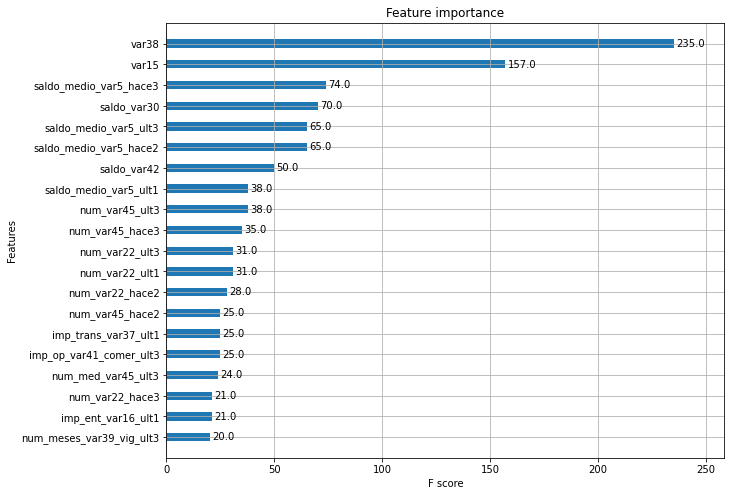

In [40]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

## LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [42]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.82625	training's binary_logloss: 0.15523	valid_1's auc: 0.809814	valid_1's binary_logloss: 0.15774
[2]	training's auc: 0.833899	training's binary_logloss: 0.149581	valid_1's auc: 0.81222	valid_1's binary_logloss: 0.153275
[3]	training's auc: 0.841789	training's binary_logloss: 0.145416	valid_1's auc: 0.814833	valid_1's binary_logloss: 0.149999
[4]	training's auc: 0.847243	training's binary_logloss: 0.14212	valid_1's auc: 0.819406	valid_1's binary_logloss: 0.147524
[5]	training's auc: 0.849589	training's binary_logloss: 0.139438	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.145464
[6]	training's auc: 0.853413	training's binary_logloss: 0.137254	valid_1's auc: 0.820878	valid_1's binary_logloss: 0.143973
[7]	training's auc: 0.85551	training's binary_logloss: 0.1354	valid_1's auc: 0.821815	valid_1's binary_logloss: 0.142746
[8]	training's auc: 0.858698	training's binary_logloss: 0.133561	valid_1's auc: 0.823733	valid_1's binary_logloss: 0.141592
[9]	training's a

[74]	training's auc: 0.928329	training's binary_logloss: 0.104353	valid_1's auc: 0.831106	valid_1's binary_logloss: 0.135773
[75]	training's auc: 0.928639	training's binary_logloss: 0.104167	valid_1's auc: 0.83094	valid_1's binary_logloss: 0.135819
[76]	training's auc: 0.928812	training's binary_logloss: 0.104032	valid_1's auc: 0.831078	valid_1's binary_logloss: 0.135819
[77]	training's auc: 0.929094	training's binary_logloss: 0.103841	valid_1's auc: 0.831173	valid_1's binary_logloss: 0.135831
[78]	training's auc: 0.929304	training's binary_logloss: 0.103661	valid_1's auc: 0.831108	valid_1's binary_logloss: 0.135854
[79]	training's auc: 0.929558	training's binary_logloss: 0.103444	valid_1's auc: 0.830932	valid_1's binary_logloss: 0.135942
[80]	training's auc: 0.930062	training's binary_logloss: 0.103185	valid_1's auc: 0.831212	valid_1's binary_logloss: 0.135846
[81]	training's auc: 0.93021	training's binary_logloss: 0.103035	valid_1's auc: 0.831221	valid_1's binary_logloss: 0.13587
[82

ROC AUC: 0.8384


In [43]:
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

In [44]:
def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(n_estimators=100, num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']), 
                               subsample=search_space['subsample'],
                               learning_rate=search_space['learning_rate'])
    
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1]) 
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환
    return -1*np.mean(roc_auc_list)

In [45]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[1]	training's auc: 0.82736	training's binary_logloss: 0.162294	valid_1's auc: 0.804818	valid_1's binary_logloss: 0.163544
[2]	training's auc: 0.828309	training's binary_logloss: 0.160269	valid_1's auc: 0.804585	valid_1's binary_logloss: 0.161866
[3]	training's auc: 0.833368	training's binary_logloss: 0.158478	valid_1's auc: 0.806871	valid_1's binary_logloss: 0.16038
[4]	training's auc: 0.834671	training's binary_logloss: 0.156852	valid_1's auc: 0.80706	valid_1's binary_logloss: 0.159053
[5]	training's auc: 0.837783	training's binary_logloss: 0.155354	valid_1's auc: 0.811645	valid_1's binary_logloss: 0.157793
[6]	training's auc: 0.839052	training's binary_logloss: 0.153966	valid_1's auc: 0.81271	valid_1's binary_logloss: 0.156635
[7]	training's auc: 0.841216	training's binary_logloss: 0.152691	valid_1's auc: 0.815103	valid_1's binary_logloss: 0.155585
[8]	training's auc: 0.841859	training's binary_logloss: 0.151499	valid_1's auc: 0.814773	valid_1's binary_logloss: 0.154617
[9]	training

[66]	training's auc: 0.876244	training's binary_logloss: 0.126639	valid_1's auc: 0.829919	valid_1's binary_logloss: 0.137223
[67]	training's auc: 0.876733	training's binary_logloss: 0.126457	valid_1's auc: 0.829943	valid_1's binary_logloss: 0.137148
[68]	training's auc: 0.877004	training's binary_logloss: 0.126282	valid_1's auc: 0.829954	valid_1's binary_logloss: 0.137083
[69]	training's auc: 0.87756	training's binary_logloss: 0.1261	valid_1's auc: 0.830128	valid_1's binary_logloss: 0.137018
[70]	training's auc: 0.87797	training's binary_logloss: 0.12593	valid_1's auc: 0.830009	valid_1's binary_logloss: 0.136959
[71]	training's auc: 0.878271	training's binary_logloss: 0.125757	valid_1's auc: 0.83006	valid_1's binary_logloss: 0.136874
[72]	training's auc: 0.878636	training's binary_logloss: 0.125587	valid_1's auc: 0.830076	valid_1's binary_logloss: 0.136826
[73]	training's auc: 0.879184	training's binary_logloss: 0.125399	valid_1's auc: 0.830085	valid_1's binary_logloss: 0.136789
[74]	t

[31]	training's auc: 0.860346	training's binary_logloss: 0.138259	valid_1's auc: 0.835652	valid_1's binary_logloss: 0.137767
[32]	training's auc: 0.860623	training's binary_logloss: 0.137851	valid_1's auc: 0.835706	valid_1's binary_logloss: 0.137481
[33]	training's auc: 0.861233	training's binary_logloss: 0.137451	valid_1's auc: 0.835552	valid_1's binary_logloss: 0.137215
[34]	training's auc: 0.861685	training's binary_logloss: 0.137067	valid_1's auc: 0.835533	valid_1's binary_logloss: 0.136967
[35]	training's auc: 0.862184	training's binary_logloss: 0.136698	valid_1's auc: 0.835406	valid_1's binary_logloss: 0.136728
[36]	training's auc: 0.862667	training's binary_logloss: 0.136338	valid_1's auc: 0.835312	valid_1's binary_logloss: 0.136482
[37]	training's auc: 0.862991	training's binary_logloss: 0.135983	valid_1's auc: 0.835197	valid_1's binary_logloss: 0.136257
[38]	training's auc: 0.863528	training's binary_logloss: 0.135648	valid_1's auc: 0.835072	valid_1's binary_logloss: 0.136031


[34]	training's auc: 0.858306	training's binary_logloss: 0.13423	valid_1's auc: 0.831793	valid_1's binary_logloss: 0.143018
[35]	training's auc: 0.858929	training's binary_logloss: 0.133883	valid_1's auc: 0.831932	valid_1's binary_logloss: 0.142746
[36]	training's auc: 0.859609	training's binary_logloss: 0.133542	valid_1's auc: 0.832139	valid_1's binary_logloss: 0.142495
[37]	training's auc: 0.860114	training's binary_logloss: 0.133199	valid_1's auc: 0.832296	valid_1's binary_logloss: 0.142265
[38]	training's auc: 0.860777	training's binary_logloss: 0.132855	valid_1's auc: 0.832378	valid_1's binary_logloss: 0.142016
[39]	training's auc: 0.861056	training's binary_logloss: 0.132533	valid_1's auc: 0.832541	valid_1's binary_logloss: 0.141797
[40]	training's auc: 0.861747	training's binary_logloss: 0.132224	valid_1's auc: 0.832606	valid_1's binary_logloss: 0.141578
[41]	training's auc: 0.862158	training's binary_logloss: 0.131929	valid_1's auc: 0.832747	valid_1's binary_logloss: 0.141381
[

[99]	training's auc: 0.885685	training's binary_logloss: 0.121466	valid_1's auc: 0.837478	valid_1's binary_logloss: 0.136439
[100]	training's auc: 0.886052	training's binary_logloss: 0.121345	valid_1's auc: 0.837486	valid_1's binary_logloss: 0.136434
[1]	training's auc: 0.840138	training's binary_logloss: 0.15221	valid_1's auc: 0.812785	valid_1's binary_logloss: 0.155558
[2]	training's auc: 0.84777	training's binary_logloss: 0.145745	valid_1's auc: 0.815828	valid_1's binary_logloss: 0.150616
[3]	training's auc: 0.857571	training's binary_logloss: 0.141216	valid_1's auc: 0.821962	valid_1's binary_logloss: 0.147259
[4]	training's auc: 0.861358	training's binary_logloss: 0.137643	valid_1's auc: 0.824181	valid_1's binary_logloss: 0.144869
[5]	training's auc: 0.866559	training's binary_logloss: 0.134811	valid_1's auc: 0.825962	valid_1's binary_logloss: 0.14308
[6]	training's auc: 0.869278	training's binary_logloss: 0.132436	valid_1's auc: 0.827506	valid_1's binary_logloss: 0.141548
[7]	trai

[26]	training's auc: 0.912142	training's binary_logloss: 0.113763	valid_1's auc: 0.834075	valid_1's binary_logloss: 0.131343
[27]	training's auc: 0.913719	training's binary_logloss: 0.113067	valid_1's auc: 0.833813	valid_1's binary_logloss: 0.131392
[28]	training's auc: 0.915337	training's binary_logloss: 0.112479	valid_1's auc: 0.83399	valid_1's binary_logloss: 0.131391
[29]	training's auc: 0.917253	training's binary_logloss: 0.11188	valid_1's auc: 0.833599	valid_1's binary_logloss: 0.131448
[30]	training's auc: 0.918443	training's binary_logloss: 0.111286	valid_1's auc: 0.833538	valid_1's binary_logloss: 0.131427
[31]	training's auc: 0.919457	training's binary_logloss: 0.110746	valid_1's auc: 0.833293	valid_1's binary_logloss: 0.131479
[32]	training's auc: 0.920976	training's binary_logloss: 0.110085	valid_1's auc: 0.833202	valid_1's binary_logloss: 0.131461
[33]	training's auc: 0.922191	training's binary_logloss: 0.109456	valid_1's auc: 0.83292	valid_1's binary_logloss: 0.13157
[34]

[5]	training's auc: 0.855483	training's binary_logloss: 0.145139	valid_1's auc: 0.820538	valid_1's binary_logloss: 0.149919
[6]	training's auc: 0.856827	training's binary_logloss: 0.14298	valid_1's auc: 0.821063	valid_1's binary_logloss: 0.148333
[7]	training's auc: 0.858639	training's binary_logloss: 0.14107	valid_1's auc: 0.821902	valid_1's binary_logloss: 0.146983
[8]	training's auc: 0.859908	training's binary_logloss: 0.139361	valid_1's auc: 0.822497	valid_1's binary_logloss: 0.145726
[9]	training's auc: 0.863745	training's binary_logloss: 0.137787	valid_1's auc: 0.824282	valid_1's binary_logloss: 0.14463
[10]	training's auc: 0.864538	training's binary_logloss: 0.136428	valid_1's auc: 0.825618	valid_1's binary_logloss: 0.143613
[11]	training's auc: 0.866724	training's binary_logloss: 0.135202	valid_1's auc: 0.826482	valid_1's binary_logloss: 0.142771
[12]	training's auc: 0.867727	training's binary_logloss: 0.134076	valid_1's auc: 0.826391	valid_1's binary_logloss: 0.142056
[13]	tra

[19]	training's auc: 0.876474	training's binary_logloss: 0.130177	valid_1's auc: 0.836385	valid_1's binary_logloss: 0.133702
[20]	training's auc: 0.8775	training's binary_logloss: 0.129479	valid_1's auc: 0.836202	valid_1's binary_logloss: 0.133362
[21]	training's auc: 0.878491	training's binary_logloss: 0.128823	valid_1's auc: 0.835944	valid_1's binary_logloss: 0.133095
[22]	training's auc: 0.879727	training's binary_logloss: 0.128171	valid_1's auc: 0.835803	valid_1's binary_logloss: 0.132857
[23]	training's auc: 0.880833	training's binary_logloss: 0.127616	valid_1's auc: 0.835788	valid_1's binary_logloss: 0.132656
[24]	training's auc: 0.881877	training's binary_logloss: 0.127021	valid_1's auc: 0.836304	valid_1's binary_logloss: 0.132396
[25]	training's auc: 0.882678	training's binary_logloss: 0.126477	valid_1's auc: 0.835986	valid_1's binary_logloss: 0.132262
[26]	training's auc: 0.883555	training's binary_logloss: 0.125961	valid_1's auc: 0.835858	valid_1's binary_logloss: 0.13208
[27

[7]	training's auc: 0.856989	training's binary_logloss: 0.140392	valid_1's auc: 0.828256	valid_1's binary_logloss: 0.148457
[8]	training's auc: 0.859909	training's binary_logloss: 0.138736	valid_1's auc: 0.828911	valid_1's binary_logloss: 0.14717
[9]	training's auc: 0.860832	training's binary_logloss: 0.137248	valid_1's auc: 0.828917	valid_1's binary_logloss: 0.146114
[10]	training's auc: 0.862409	training's binary_logloss: 0.135939	valid_1's auc: 0.829175	valid_1's binary_logloss: 0.145124
[11]	training's auc: 0.863555	training's binary_logloss: 0.134642	valid_1's auc: 0.829481	valid_1's binary_logloss: 0.144268
[12]	training's auc: 0.864843	training's binary_logloss: 0.133431	valid_1's auc: 0.829963	valid_1's binary_logloss: 0.143463
[13]	training's auc: 0.866107	training's binary_logloss: 0.13233	valid_1's auc: 0.830554	valid_1's binary_logloss: 0.142752
[14]	training's auc: 0.868249	training's binary_logloss: 0.131313	valid_1's auc: 0.830759	valid_1's binary_logloss: 0.14214
[15]	t

[5]	training's auc: 0.863741	training's binary_logloss: 0.137779	valid_1's auc: 0.824119	valid_1's binary_logloss: 0.145182
[6]	training's auc: 0.867855	training's binary_logloss: 0.135354	valid_1's auc: 0.824776	valid_1's binary_logloss: 0.143786
[7]	training's auc: 0.871623	training's binary_logloss: 0.13321	valid_1's auc: 0.826166	valid_1's binary_logloss: 0.14244
[8]	training's auc: 0.873921	training's binary_logloss: 0.131346	valid_1's auc: 0.827566	valid_1's binary_logloss: 0.141253
[9]	training's auc: 0.876897	training's binary_logloss: 0.129658	valid_1's auc: 0.828699	valid_1's binary_logloss: 0.140338
[10]	training's auc: 0.881018	training's binary_logloss: 0.128185	valid_1's auc: 0.828684	valid_1's binary_logloss: 0.139621
[11]	training's auc: 0.883713	training's binary_logloss: 0.126777	valid_1's auc: 0.829464	valid_1's binary_logloss: 0.138944
[12]	training's auc: 0.885586	training's binary_logloss: 0.125579	valid_1's auc: 0.829263	valid_1's binary_logloss: 0.138435
[13]	tr

[25]	training's auc: 0.907057	training's binary_logloss: 0.116193	valid_1's auc: 0.834743	valid_1's binary_logloss: 0.13117
[26]	training's auc: 0.908271	training's binary_logloss: 0.115576	valid_1's auc: 0.83419	valid_1's binary_logloss: 0.131239
[27]	training's auc: 0.910741	training's binary_logloss: 0.114927	valid_1's auc: 0.833715	valid_1's binary_logloss: 0.131226
[28]	training's auc: 0.912008	training's binary_logloss: 0.114368	valid_1's auc: 0.834214	valid_1's binary_logloss: 0.131124
[29]	training's auc: 0.91352	training's binary_logloss: 0.113764	valid_1's auc: 0.83465	valid_1's binary_logloss: 0.13107
[30]	training's auc: 0.915049	training's binary_logloss: 0.113149	valid_1's auc: 0.834696	valid_1's binary_logloss: 0.131122
[31]	training's auc: 0.916345	training's binary_logloss: 0.112573	valid_1's auc: 0.835036	valid_1's binary_logloss: 0.131037
[32]	training's auc: 0.917819	training's binary_logloss: 0.112042	valid_1's auc: 0.83531	valid_1's binary_logloss: 0.131005
[33]	t

[22]	training's auc: 0.90492	training's binary_logloss: 0.115354	valid_1's auc: 0.831076	valid_1's binary_logloss: 0.138095
[23]	training's auc: 0.905935	training's binary_logloss: 0.114692	valid_1's auc: 0.83124	valid_1's binary_logloss: 0.138023
[24]	training's auc: 0.907096	training's binary_logloss: 0.114059	valid_1's auc: 0.83079	valid_1's binary_logloss: 0.137978
[25]	training's auc: 0.908588	training's binary_logloss: 0.113395	valid_1's auc: 0.830625	valid_1's binary_logloss: 0.137932
[26]	training's auc: 0.909877	training's binary_logloss: 0.112697	valid_1's auc: 0.831749	valid_1's binary_logloss: 0.13783
[27]	training's auc: 0.911142	training's binary_logloss: 0.112069	valid_1's auc: 0.831299	valid_1's binary_logloss: 0.137885
[28]	training's auc: 0.912572	training's binary_logloss: 0.111454	valid_1's auc: 0.831311	valid_1's binary_logloss: 0.137854
[29]	training's auc: 0.914617	training's binary_logloss: 0.110839	valid_1's auc: 0.831487	valid_1's binary_logloss: 0.137792
[30]

[44]	training's auc: 0.903386	training's binary_logloss: 0.116708	valid_1's auc: 0.832147	valid_1's binary_logloss: 0.135673
[45]	training's auc: 0.904051	training's binary_logloss: 0.116363	valid_1's auc: 0.832101	valid_1's binary_logloss: 0.135655
[46]	training's auc: 0.905084	training's binary_logloss: 0.116011	valid_1's auc: 0.832359	valid_1's binary_logloss: 0.135612
[47]	training's auc: 0.90589	training's binary_logloss: 0.115647	valid_1's auc: 0.832228	valid_1's binary_logloss: 0.135623
[48]	training's auc: 0.90655	training's binary_logloss: 0.115347	valid_1's auc: 0.832248	valid_1's binary_logloss: 0.135605
[49]	training's auc: 0.907434	training's binary_logloss: 0.115002	valid_1's auc: 0.832089	valid_1's binary_logloss: 0.13564
[50]	training's auc: 0.908012	training's binary_logloss: 0.114685	valid_1's auc: 0.831989	valid_1's binary_logloss: 0.135677
[51]	training's auc: 0.908832	training's binary_logloss: 0.114351	valid_1's auc: 0.831922	valid_1's binary_logloss: 0.135685
[52

[33]	training's auc: 0.891775	training's binary_logloss: 0.123024	valid_1's auc: 0.834178	valid_1's binary_logloss: 0.131744
[34]	training's auc: 0.892702	training's binary_logloss: 0.122585	valid_1's auc: 0.833952	valid_1's binary_logloss: 0.131635
[35]	training's auc: 0.893461	training's binary_logloss: 0.122124	valid_1's auc: 0.83422	valid_1's binary_logloss: 0.131526
[36]	training's auc: 0.894087	training's binary_logloss: 0.121716	valid_1's auc: 0.834538	valid_1's binary_logloss: 0.131436
[37]	training's auc: 0.89494	training's binary_logloss: 0.121317	valid_1's auc: 0.834695	valid_1's binary_logloss: 0.131348
[38]	training's auc: 0.895563	training's binary_logloss: 0.12093	valid_1's auc: 0.834862	valid_1's binary_logloss: 0.131268
[39]	training's auc: 0.89639	training's binary_logloss: 0.120527	valid_1's auc: 0.8351	valid_1's binary_logloss: 0.131181
[40]	training's auc: 0.897276	training's binary_logloss: 0.120143	valid_1's auc: 0.834899	valid_1's binary_logloss: 0.131165
[41]	t

[22]	training's auc: 0.879315	training's binary_logloss: 0.126365	valid_1's auc: 0.834742	valid_1's binary_logloss: 0.139403
[23]	training's auc: 0.880364	training's binary_logloss: 0.125781	valid_1's auc: 0.835072	valid_1's binary_logloss: 0.13912
[24]	training's auc: 0.881943	training's binary_logloss: 0.125204	valid_1's auc: 0.83561	valid_1's binary_logloss: 0.13884
[25]	training's auc: 0.883272	training's binary_logloss: 0.12463	valid_1's auc: 0.835652	valid_1's binary_logloss: 0.138559
[26]	training's auc: 0.884765	training's binary_logloss: 0.12408	valid_1's auc: 0.836094	valid_1's binary_logloss: 0.138359
[27]	training's auc: 0.885506	training's binary_logloss: 0.123584	valid_1's auc: 0.835833	valid_1's binary_logloss: 0.138203
[28]	training's auc: 0.886849	training's binary_logloss: 0.123024	valid_1's auc: 0.835788	valid_1's binary_logloss: 0.138025
[29]	training's auc: 0.88783	training's binary_logloss: 0.122537	valid_1's auc: 0.835565	valid_1's binary_logloss: 0.137845
[30]	t

[31]	training's auc: 0.857411	training's binary_logloss: 0.142702	valid_1's auc: 0.825009	valid_1's binary_logloss: 0.147652
[32]	training's auc: 0.857697	training's binary_logloss: 0.142301	valid_1's auc: 0.825157	valid_1's binary_logloss: 0.147349
[33]	training's auc: 0.857794	training's binary_logloss: 0.141902	valid_1's auc: 0.825358	valid_1's binary_logloss: 0.147045
[34]	training's auc: 0.858076	training's binary_logloss: 0.141519	valid_1's auc: 0.825266	valid_1's binary_logloss: 0.146764
[35]	training's auc: 0.858158	training's binary_logloss: 0.141147	valid_1's auc: 0.825423	valid_1's binary_logloss: 0.146486
[36]	training's auc: 0.858428	training's binary_logloss: 0.140788	valid_1's auc: 0.825706	valid_1's binary_logloss: 0.146206
[37]	training's auc: 0.859321	training's binary_logloss: 0.140437	valid_1's auc: 0.82657	valid_1's binary_logloss: 0.145924
[38]	training's auc: 0.859658	training's binary_logloss: 0.140095	valid_1's auc: 0.826972	valid_1's binary_logloss: 0.145648
[

[96]	training's auc: 0.874544	training's binary_logloss: 0.128177	valid_1's auc: 0.829916	valid_1's binary_logloss: 0.138077
[97]	training's auc: 0.874881	training's binary_logloss: 0.128043	valid_1's auc: 0.829996	valid_1's binary_logloss: 0.138012
[98]	training's auc: 0.875162	training's binary_logloss: 0.127906	valid_1's auc: 0.83007	valid_1's binary_logloss: 0.137948
[99]	training's auc: 0.875425	training's binary_logloss: 0.127775	valid_1's auc: 0.830062	valid_1's binary_logloss: 0.13788
[100]	training's auc: 0.875754	training's binary_logloss: 0.127637	valid_1's auc: 0.830052	valid_1's binary_logloss: 0.137831
[1]	training's auc: 0.82749	training's binary_logloss: 0.16565	valid_1's auc: 0.813829	valid_1's binary_logloss: 0.159659
[2]	training's auc: 0.830751	training's binary_logloss: 0.16443	valid_1's auc: 0.816626	valid_1's binary_logloss: 0.158641
[3]	training's auc: 0.831422	training's binary_logloss: 0.163283	valid_1's auc: 0.817276	valid_1's binary_logloss: 0.157694
[4]	tra

[61]	training's auc: 0.865047	training's binary_logloss: 0.136216	valid_1's auc: 0.835726	valid_1's binary_logloss: 0.136647
[62]	training's auc: 0.865221	training's binary_logloss: 0.136002	valid_1's auc: 0.835629	valid_1's binary_logloss: 0.13651
[63]	training's auc: 0.865487	training's binary_logloss: 0.135794	valid_1's auc: 0.835572	valid_1's binary_logloss: 0.136374
[64]	training's auc: 0.865641	training's binary_logloss: 0.135585	valid_1's auc: 0.83539	valid_1's binary_logloss: 0.13624
[65]	training's auc: 0.866122	training's binary_logloss: 0.135384	valid_1's auc: 0.835365	valid_1's binary_logloss: 0.136101
[66]	training's auc: 0.866305	training's binary_logloss: 0.135193	valid_1's auc: 0.835311	valid_1's binary_logloss: 0.135978
[67]	training's auc: 0.86651	training's binary_logloss: 0.135001	valid_1's auc: 0.835282	valid_1's binary_logloss: 0.135851
[68]	training's auc: 0.86663	training's binary_logloss: 0.134808	valid_1's auc: 0.835301	valid_1's binary_logloss: 0.135729
[69]	

[38]	training's auc: 0.855109	training's binary_logloss: 0.13948	valid_1's auc: 0.829801	valid_1's binary_logloss: 0.147373
[39]	training's auc: 0.855549	training's binary_logloss: 0.139157	valid_1's auc: 0.829819	valid_1's binary_logloss: 0.147116
[40]	training's auc: 0.855925	training's binary_logloss: 0.138846	valid_1's auc: 0.82995	valid_1's binary_logloss: 0.146874
[41]	training's auc: 0.856023	training's binary_logloss: 0.138538	valid_1's auc: 0.829887	valid_1's binary_logloss: 0.146628
[42]	training's auc: 0.856746	training's binary_logloss: 0.138238	valid_1's auc: 0.830089	valid_1's binary_logloss: 0.146385
[43]	training's auc: 0.857068	training's binary_logloss: 0.137912	valid_1's auc: 0.830113	valid_1's binary_logloss: 0.146156
[44]	training's auc: 0.857324	training's binary_logloss: 0.137595	valid_1's auc: 0.830292	valid_1's binary_logloss: 0.145927
[45]	training's auc: 0.857489	training's binary_logloss: 0.137315	valid_1's auc: 0.830376	valid_1's binary_logloss: 0.145695
[4

[3]	training's auc: 0.853411	training's binary_logloss: 0.141113	valid_1's auc: 0.820102	valid_1's binary_logloss: 0.146697
[4]	training's auc: 0.859233	training's binary_logloss: 0.137789	valid_1's auc: 0.824479	valid_1's binary_logloss: 0.144156
[5]	training's auc: 0.861488	training's binary_logloss: 0.135069	valid_1's auc: 0.825021	valid_1's binary_logloss: 0.142327
[6]	training's auc: 0.864267	training's binary_logloss: 0.132912	valid_1's auc: 0.826967	valid_1's binary_logloss: 0.140739
[7]	training's auc: 0.867639	training's binary_logloss: 0.131036	valid_1's auc: 0.826732	valid_1's binary_logloss: 0.139748
[8]	training's auc: 0.870029	training's binary_logloss: 0.12946	valid_1's auc: 0.827625	valid_1's binary_logloss: 0.138912
[9]	training's auc: 0.873058	training's binary_logloss: 0.128091	valid_1's auc: 0.828428	valid_1's binary_logloss: 0.138282
[10]	training's auc: 0.874772	training's binary_logloss: 0.126943	valid_1's auc: 0.828661	valid_1's binary_logloss: 0.13781
[11]	trai

[24]	training's auc: 0.899933	training's binary_logloss: 0.118186	valid_1's auc: 0.833841	valid_1's binary_logloss: 0.131296
[25]	training's auc: 0.90143	training's binary_logloss: 0.117687	valid_1's auc: 0.833563	valid_1's binary_logloss: 0.131341
[26]	training's auc: 0.903014	training's binary_logloss: 0.117196	valid_1's auc: 0.833688	valid_1's binary_logloss: 0.13132
[27]	training's auc: 0.904058	training's binary_logloss: 0.116706	valid_1's auc: 0.833698	valid_1's binary_logloss: 0.131302
[28]	training's auc: 0.905541	training's binary_logloss: 0.116125	valid_1's auc: 0.833632	valid_1's binary_logloss: 0.131355
[29]	training's auc: 0.906988	training's binary_logloss: 0.115617	valid_1's auc: 0.833135	valid_1's binary_logloss: 0.131486
[30]	training's auc: 0.907807	training's binary_logloss: 0.115199	valid_1's auc: 0.833365	valid_1's binary_logloss: 0.131489
[31]	training's auc: 0.909095	training's binary_logloss: 0.114628	valid_1's auc: 0.833802	valid_1's binary_logloss: 0.131357
[3

[36]	training's auc: 0.91585	training's binary_logloss: 0.109267	valid_1's auc: 0.831484	valid_1's binary_logloss: 0.137685
[37]	training's auc: 0.916537	training's binary_logloss: 0.108801	valid_1's auc: 0.831085	valid_1's binary_logloss: 0.137779
[38]	training's auc: 0.917452	training's binary_logloss: 0.108475	valid_1's auc: 0.831202	valid_1's binary_logloss: 0.137815
[39]	training's auc: 0.918066	training's binary_logloss: 0.108231	valid_1's auc: 0.831483	valid_1's binary_logloss: 0.13781
[40]	training's auc: 0.919154	training's binary_logloss: 0.107757	valid_1's auc: 0.830857	valid_1's binary_logloss: 0.137979
[41]	training's auc: 0.919942	training's binary_logloss: 0.10748	valid_1's auc: 0.831103	valid_1's binary_logloss: 0.137982
[42]	training's auc: 0.921006	training's binary_logloss: 0.107016	valid_1's auc: 0.831375	valid_1's binary_logloss: 0.137964
[43]	training's auc: 0.921652	training's binary_logloss: 0.1066	valid_1's auc: 0.83109	valid_1's binary_logloss: 0.138034
[44]	t

[21]	training's auc: 0.914937	training's binary_logloss: 0.112277	valid_1's auc: 0.833441	valid_1's binary_logloss: 0.13143
[22]	training's auc: 0.91656	training's binary_logloss: 0.111522	valid_1's auc: 0.83295	valid_1's binary_logloss: 0.131558
[23]	training's auc: 0.918392	training's binary_logloss: 0.110799	valid_1's auc: 0.832312	valid_1's binary_logloss: 0.131713
[24]	training's auc: 0.920611	training's binary_logloss: 0.110043	valid_1's auc: 0.832777	valid_1's binary_logloss: 0.131641
[25]	training's auc: 0.923301	training's binary_logloss: 0.109283	valid_1's auc: 0.832168	valid_1's binary_logloss: 0.131794
[26]	training's auc: 0.924236	training's binary_logloss: 0.108682	valid_1's auc: 0.831565	valid_1's binary_logloss: 0.131899
[27]	training's auc: 0.92634	training's binary_logloss: 0.107761	valid_1's auc: 0.831517	valid_1's binary_logloss: 0.131989
[28]	training's auc: 0.927562	training's binary_logloss: 0.107059	valid_1's auc: 0.831646	valid_1's binary_logloss: 0.131961
[29]

[8]	training's auc: 0.865855	training's binary_logloss: 0.130321	valid_1's auc: 0.827066	valid_1's binary_logloss: 0.139038
[9]	training's auc: 0.868707	training's binary_logloss: 0.128959	valid_1's auc: 0.827814	valid_1's binary_logloss: 0.138337
[10]	training's auc: 0.871732	training's binary_logloss: 0.127745	valid_1's auc: 0.828025	valid_1's binary_logloss: 0.137851
[11]	training's auc: 0.873726	training's binary_logloss: 0.126703	valid_1's auc: 0.828118	valid_1's binary_logloss: 0.13736
[12]	training's auc: 0.87576	training's binary_logloss: 0.125731	valid_1's auc: 0.828171	valid_1's binary_logloss: 0.13698
[13]	training's auc: 0.878157	training's binary_logloss: 0.124783	valid_1's auc: 0.827975	valid_1's binary_logloss: 0.136775
[14]	training's auc: 0.880144	training's binary_logloss: 0.12394	valid_1's auc: 0.828726	valid_1's binary_logloss: 0.136476
[15]	training's auc: 0.882122	training's binary_logloss: 0.123144	valid_1's auc: 0.828122	valid_1's binary_logloss: 0.136371
[16]	t

[27]	training's auc: 0.899317	training's binary_logloss: 0.118203	valid_1's auc: 0.835275	valid_1's binary_logloss: 0.131105
[28]	training's auc: 0.900552	training's binary_logloss: 0.117755	valid_1's auc: 0.834998	valid_1's binary_logloss: 0.131172
[29]	training's auc: 0.902357	training's binary_logloss: 0.117273	valid_1's auc: 0.834878	valid_1's binary_logloss: 0.131167
[30]	training's auc: 0.903413	training's binary_logloss: 0.116783	valid_1's auc: 0.834534	valid_1's binary_logloss: 0.131226
[31]	training's auc: 0.904772	training's binary_logloss: 0.116346	valid_1's auc: 0.834551	valid_1's binary_logloss: 0.131209
[32]	training's auc: 0.905714	training's binary_logloss: 0.115927	valid_1's auc: 0.834596	valid_1's binary_logloss: 0.13122
[33]	training's auc: 0.907036	training's binary_logloss: 0.115432	valid_1's auc: 0.834361	valid_1's binary_logloss: 0.131303
[34]	training's auc: 0.908126	training's binary_logloss: 0.11495	valid_1's auc: 0.834322	valid_1's binary_logloss: 0.131314
[3

[36]	training's auc: 0.910925	training's binary_logloss: 0.111278	valid_1's auc: 0.835018	valid_1's binary_logloss: 0.136807
[37]	training's auc: 0.91174	training's binary_logloss: 0.110892	valid_1's auc: 0.834702	valid_1's binary_logloss: 0.136868
[38]	training's auc: 0.912545	training's binary_logloss: 0.110458	valid_1's auc: 0.833975	valid_1's binary_logloss: 0.137022
[39]	training's auc: 0.913491	training's binary_logloss: 0.110045	valid_1's auc: 0.83421	valid_1's binary_logloss: 0.136965
[40]	training's auc: 0.914617	training's binary_logloss: 0.109661	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.137066
[41]	training's auc: 0.915041	training's binary_logloss: 0.109367	valid_1's auc: 0.833738	valid_1's binary_logloss: 0.137105
[42]	training's auc: 0.916034	training's binary_logloss: 0.108944	valid_1's auc: 0.833687	valid_1's binary_logloss: 0.137129
[43]	training's auc: 0.916789	training's binary_logloss: 0.10854	valid_1's auc: 0.833303	valid_1's binary_logloss: 0.137257
[44

[55]	training's auc: 0.916301	training's binary_logloss: 0.111102	valid_1's auc: 0.829292	valid_1's binary_logloss: 0.136317
[1]	training's auc: 0.836632	training's binary_logloss: 0.160373	valid_1's auc: 0.819718	valid_1's binary_logloss: 0.155457
[2]	training's auc: 0.84326	training's binary_logloss: 0.155574	valid_1's auc: 0.821805	valid_1's binary_logloss: 0.151654
[3]	training's auc: 0.846733	training's binary_logloss: 0.151871	valid_1's auc: 0.824699	valid_1's binary_logloss: 0.148729
[4]	training's auc: 0.853304	training's binary_logloss: 0.14889	valid_1's auc: 0.830163	valid_1's binary_logloss: 0.146307
[5]	training's auc: 0.858467	training's binary_logloss: 0.1463	valid_1's auc: 0.832164	valid_1's binary_logloss: 0.144403
[6]	training's auc: 0.860449	training's binary_logloss: 0.144063	valid_1's auc: 0.832539	valid_1's binary_logloss: 0.142805
[7]	training's auc: 0.862669	training's binary_logloss: 0.142075	valid_1's auc: 0.83256	valid_1's binary_logloss: 0.141435
[8]	training

[6]	training's auc: 0.857524	training's binary_logloss: 0.140988	valid_1's auc: 0.829609	valid_1's binary_logloss: 0.149111
[7]	training's auc: 0.860594	training's binary_logloss: 0.139045	valid_1's auc: 0.830011	valid_1's binary_logloss: 0.147644
[8]	training's auc: 0.863468	training's binary_logloss: 0.137312	valid_1's auc: 0.831632	valid_1's binary_logloss: 0.146289
[9]	training's auc: 0.865041	training's binary_logloss: 0.135811	valid_1's auc: 0.831616	valid_1's binary_logloss: 0.14517
[10]	training's auc: 0.866616	training's binary_logloss: 0.134351	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.144224
[11]	training's auc: 0.867423	training's binary_logloss: 0.133084	valid_1's auc: 0.831814	valid_1's binary_logloss: 0.143395
[12]	training's auc: 0.869484	training's binary_logloss: 0.131907	valid_1's auc: 0.832092	valid_1's binary_logloss: 0.142653
[13]	training's auc: 0.870895	training's binary_logloss: 0.130851	valid_1's auc: 0.832122	valid_1's binary_logloss: 0.142013
[14]	

[12]	training's auc: 0.906435	training's binary_logloss: 0.114779	valid_1's auc: 0.82774	valid_1's binary_logloss: 0.136755
[13]	training's auc: 0.910874	training's binary_logloss: 0.113358	valid_1's auc: 0.826074	valid_1's binary_logloss: 0.137036
[14]	training's auc: 0.914235	training's binary_logloss: 0.112248	valid_1's auc: 0.825505	valid_1's binary_logloss: 0.13709
[15]	training's auc: 0.916024	training's binary_logloss: 0.111183	valid_1's auc: 0.825384	valid_1's binary_logloss: 0.137142
[16]	training's auc: 0.918503	training's binary_logloss: 0.110063	valid_1's auc: 0.825501	valid_1's binary_logloss: 0.137218
[17]	training's auc: 0.920318	training's binary_logloss: 0.109009	valid_1's auc: 0.824481	valid_1's binary_logloss: 0.137513
[18]	training's auc: 0.92265	training's binary_logloss: 0.107917	valid_1's auc: 0.82415	valid_1's binary_logloss: 0.137608
[19]	training's auc: 0.924544	training's binary_logloss: 0.106888	valid_1's auc: 0.824743	valid_1's binary_logloss: 0.137617
[20]

[35]	training's auc: 0.94592	training's binary_logloss: 0.0963693	valid_1's auc: 0.826052	valid_1's binary_logloss: 0.134856
[36]	training's auc: 0.946924	training's binary_logloss: 0.0957697	valid_1's auc: 0.826644	valid_1's binary_logloss: 0.13483
[37]	training's auc: 0.947219	training's binary_logloss: 0.0954072	valid_1's auc: 0.826236	valid_1's binary_logloss: 0.134987
[38]	training's auc: 0.948855	training's binary_logloss: 0.0945847	valid_1's auc: 0.82577	valid_1's binary_logloss: 0.135197
[1]	training's auc: 0.840005	training's binary_logloss: 0.145852	valid_1's auc: 0.814016	valid_1's binary_logloss: 0.154527
[2]	training's auc: 0.855209	training's binary_logloss: 0.138299	valid_1's auc: 0.820132	valid_1's binary_logloss: 0.148936
[3]	training's auc: 0.862712	training's binary_logloss: 0.133468	valid_1's auc: 0.823275	valid_1's binary_logloss: 0.145594
[4]	training's auc: 0.869125	training's binary_logloss: 0.129798	valid_1's auc: 0.824435	valid_1's binary_logloss: 0.143537
[5]

[22]	training's auc: 0.887956	training's binary_logloss: 0.125123	valid_1's auc: 0.831514	valid_1's binary_logloss: 0.137869
[23]	training's auc: 0.889226	training's binary_logloss: 0.124436	valid_1's auc: 0.831532	valid_1's binary_logloss: 0.137627
[24]	training's auc: 0.890348	training's binary_logloss: 0.123792	valid_1's auc: 0.831582	valid_1's binary_logloss: 0.137387
[25]	training's auc: 0.891491	training's binary_logloss: 0.123204	valid_1's auc: 0.831479	valid_1's binary_logloss: 0.137217
[26]	training's auc: 0.892981	training's binary_logloss: 0.122575	valid_1's auc: 0.831318	valid_1's binary_logloss: 0.137028
[27]	training's auc: 0.894086	training's binary_logloss: 0.122001	valid_1's auc: 0.831195	valid_1's binary_logloss: 0.136887
[28]	training's auc: 0.895331	training's binary_logloss: 0.121427	valid_1's auc: 0.83114	valid_1's binary_logloss: 0.136737
[29]	training's auc: 0.896178	training's binary_logloss: 0.120917	valid_1's auc: 0.830786	valid_1's binary_logloss: 0.136664
[

[33]	training's auc: 0.896987	training's binary_logloss: 0.121027	valid_1's auc: 0.833957	valid_1's binary_logloss: 0.131666
[34]	training's auc: 0.898184	training's binary_logloss: 0.120518	valid_1's auc: 0.833958	valid_1's binary_logloss: 0.131596
[35]	training's auc: 0.89909	training's binary_logloss: 0.120031	valid_1's auc: 0.83421	valid_1's binary_logloss: 0.131504
[36]	training's auc: 0.8999	training's binary_logloss: 0.119567	valid_1's auc: 0.834128	valid_1's binary_logloss: 0.131432
[37]	training's auc: 0.901007	training's binary_logloss: 0.119129	valid_1's auc: 0.833959	valid_1's binary_logloss: 0.131395
[38]	training's auc: 0.902074	training's binary_logloss: 0.1187	valid_1's auc: 0.833874	valid_1's binary_logloss: 0.131352
[39]	training's auc: 0.902858	training's binary_logloss: 0.118317	valid_1's auc: 0.833936	valid_1's binary_logloss: 0.131304
[40]	training's auc: 0.903887	training's binary_logloss: 0.117904	valid_1's auc: 0.834015	valid_1's binary_logloss: 0.131249
[41]	t

[55]	training's auc: 0.917883	training's binary_logloss: 0.109815	valid_1's auc: 0.833142	valid_1's binary_logloss: 0.137244
[56]	training's auc: 0.918599	training's binary_logloss: 0.109496	valid_1's auc: 0.832825	valid_1's binary_logloss: 0.137326
[57]	training's auc: 0.919398	training's binary_logloss: 0.109209	valid_1's auc: 0.832683	valid_1's binary_logloss: 0.137346
[58]	training's auc: 0.920128	training's binary_logloss: 0.108894	valid_1's auc: 0.832702	valid_1's binary_logloss: 0.137357
[59]	training's auc: 0.921035	training's binary_logloss: 0.108627	valid_1's auc: 0.832744	valid_1's binary_logloss: 0.137353
[60]	training's auc: 0.921561	training's binary_logloss: 0.108343	valid_1's auc: 0.832903	valid_1's binary_logloss: 0.137356
[61]	training's auc: 0.922328	training's binary_logloss: 0.108066	valid_1's auc: 0.833134	valid_1's binary_logloss: 0.137311
[62]	training's auc: 0.923043	training's binary_logloss: 0.107768	valid_1's auc: 0.833212	valid_1's binary_logloss: 0.137308


[14]	training's auc: 0.892768	training's binary_logloss: 0.120034	valid_1's auc: 0.83406	valid_1's binary_logloss: 0.131714
[15]	training's auc: 0.895239	training's binary_logloss: 0.119038	valid_1's auc: 0.833864	valid_1's binary_logloss: 0.13164
[16]	training's auc: 0.898151	training's binary_logloss: 0.118158	valid_1's auc: 0.83471	valid_1's binary_logloss: 0.131582
[17]	training's auc: 0.900526	training's binary_logloss: 0.117375	valid_1's auc: 0.834665	valid_1's binary_logloss: 0.131557
[18]	training's auc: 0.902132	training's binary_logloss: 0.116605	valid_1's auc: 0.834877	valid_1's binary_logloss: 0.131432
[19]	training's auc: 0.904309	training's binary_logloss: 0.11568	valid_1's auc: 0.835229	valid_1's binary_logloss: 0.131373
[20]	training's auc: 0.906201	training's binary_logloss: 0.114938	valid_1's auc: 0.835008	valid_1's binary_logloss: 0.131391
[21]	training's auc: 0.90816	training's binary_logloss: 0.114106	valid_1's auc: 0.834935	valid_1's binary_logloss: 0.131445
[22]	

[30]	training's auc: 0.923577	training's binary_logloss: 0.105641	valid_1's auc: 0.828933	valid_1's binary_logloss: 0.138793
[31]	training's auc: 0.924796	training's binary_logloss: 0.105017	valid_1's auc: 0.82865	valid_1's binary_logloss: 0.138904
[32]	training's auc: 0.925347	training's binary_logloss: 0.10459	valid_1's auc: 0.828038	valid_1's binary_logloss: 0.139074
[33]	training's auc: 0.92605	training's binary_logloss: 0.104051	valid_1's auc: 0.827891	valid_1's binary_logloss: 0.139086
[34]	training's auc: 0.927614	training's binary_logloss: 0.103339	valid_1's auc: 0.827527	valid_1's binary_logloss: 0.139271
[35]	training's auc: 0.928068	training's binary_logloss: 0.102974	valid_1's auc: 0.826907	valid_1's binary_logloss: 0.139437
[36]	training's auc: 0.928695	training's binary_logloss: 0.102492	valid_1's auc: 0.826196	valid_1's binary_logloss: 0.139648
[37]	training's auc: 0.929705	training's binary_logloss: 0.10195	valid_1's auc: 0.82588	valid_1's binary_logloss: 0.139867
[38]	

[53]	training's auc: 0.901626	training's binary_logloss: 0.116826	valid_1's auc: 0.829734	valid_1's binary_logloss: 0.136066
[54]	training's auc: 0.902203	training's binary_logloss: 0.11656	valid_1's auc: 0.829801	valid_1's binary_logloss: 0.136033
[55]	training's auc: 0.903301	training's binary_logloss: 0.11626	valid_1's auc: 0.829931	valid_1's binary_logloss: 0.135989
[56]	training's auc: 0.90378	training's binary_logloss: 0.116025	valid_1's auc: 0.830025	valid_1's binary_logloss: 0.135951
[57]	training's auc: 0.904262	training's binary_logloss: 0.115776	valid_1's auc: 0.829932	valid_1's binary_logloss: 0.135967
[58]	training's auc: 0.905128	training's binary_logloss: 0.115473	valid_1's auc: 0.830355	valid_1's binary_logloss: 0.135913
[59]	training's auc: 0.906102	training's binary_logloss: 0.11518	valid_1's auc: 0.83015	valid_1's binary_logloss: 0.135946
[60]	training's auc: 0.906779	training's binary_logloss: 0.114907	valid_1's auc: 0.830295	valid_1's binary_logloss: 0.135918
[61]	

[11]	training's auc: 0.860068	training's binary_logloss: 0.138125	valid_1's auc: 0.828763	valid_1's binary_logloss: 0.14718
[12]	training's auc: 0.861129	training's binary_logloss: 0.137013	valid_1's auc: 0.829145	valid_1's binary_logloss: 0.146329
[13]	training's auc: 0.863218	training's binary_logloss: 0.135972	valid_1's auc: 0.829245	valid_1's binary_logloss: 0.145534
[14]	training's auc: 0.864103	training's binary_logloss: 0.134979	valid_1's auc: 0.829457	valid_1's binary_logloss: 0.144863
[15]	training's auc: 0.865363	training's binary_logloss: 0.134062	valid_1's auc: 0.830094	valid_1's binary_logloss: 0.144221
[16]	training's auc: 0.866409	training's binary_logloss: 0.133125	valid_1's auc: 0.830369	valid_1's binary_logloss: 0.143641
[17]	training's auc: 0.867109	training's binary_logloss: 0.13229	valid_1's auc: 0.830638	valid_1's binary_logloss: 0.14312
[18]	training's auc: 0.868527	training's binary_logloss: 0.131524	valid_1's auc: 0.830652	valid_1's binary_logloss: 0.142661
[19

[76]	training's auc: 0.9156	training's binary_logloss: 0.110582	valid_1's auc: 0.835935	valid_1's binary_logloss: 0.136377
[77]	training's auc: 0.916178	training's binary_logloss: 0.11033	valid_1's auc: 0.835971	valid_1's binary_logloss: 0.136391
[78]	training's auc: 0.916541	training's binary_logloss: 0.110153	valid_1's auc: 0.836047	valid_1's binary_logloss: 0.136394
[79]	training's auc: 0.917189	training's binary_logloss: 0.1099	valid_1's auc: 0.835962	valid_1's binary_logloss: 0.136415
[1]	training's auc: 0.827368	training's binary_logloss: 0.153759	valid_1's auc: 0.804853	valid_1's binary_logloss: 0.156547
[2]	training's auc: 0.83748	training's binary_logloss: 0.14785	valid_1's auc: 0.811892	valid_1's binary_logloss: 0.151608
[3]	training's auc: 0.845173	training's binary_logloss: 0.143775	valid_1's auc: 0.817212	valid_1's binary_logloss: 0.148274
[4]	training's auc: 0.851186	training's binary_logloss: 0.14037	valid_1's auc: 0.82289	valid_1's binary_logloss: 0.145719
[5]	training'

[16]	training's auc: 0.878375	training's binary_logloss: 0.126132	valid_1's auc: 0.832803	valid_1's binary_logloss: 0.132136
[17]	training's auc: 0.879919	training's binary_logloss: 0.125417	valid_1's auc: 0.832884	valid_1's binary_logloss: 0.131994
[18]	training's auc: 0.881454	training's binary_logloss: 0.124694	valid_1's auc: 0.832963	valid_1's binary_logloss: 0.131881
[19]	training's auc: 0.883047	training's binary_logloss: 0.124099	valid_1's auc: 0.83341	valid_1's binary_logloss: 0.13172
[20]	training's auc: 0.884674	training's binary_logloss: 0.123413	valid_1's auc: 0.834615	valid_1's binary_logloss: 0.131509
[21]	training's auc: 0.886836	training's binary_logloss: 0.122805	valid_1's auc: 0.835644	valid_1's binary_logloss: 0.13133
[22]	training's auc: 0.888153	training's binary_logloss: 0.122227	valid_1's auc: 0.835358	valid_1's binary_logloss: 0.1313
[23]	training's auc: 0.889498	training's binary_logloss: 0.121665	valid_1's auc: 0.835194	valid_1's binary_logloss: 0.131252
[24]	

[30]	training's auc: 0.900622	training's binary_logloss: 0.115572	valid_1's auc: 0.833561	valid_1's binary_logloss: 0.136886
[31]	training's auc: 0.901247	training's binary_logloss: 0.115194	valid_1's auc: 0.833657	valid_1's binary_logloss: 0.13689
[32]	training's auc: 0.902254	training's binary_logloss: 0.114749	valid_1's auc: 0.833595	valid_1's binary_logloss: 0.13692
[33]	training's auc: 0.903386	training's binary_logloss: 0.114383	valid_1's auc: 0.834255	valid_1's binary_logloss: 0.136812
[34]	training's auc: 0.904095	training's binary_logloss: 0.114023	valid_1's auc: 0.834009	valid_1's binary_logloss: 0.136873
[35]	training's auc: 0.904967	training's binary_logloss: 0.113662	valid_1's auc: 0.833551	valid_1's binary_logloss: 0.137
[36]	training's auc: 0.905656	training's binary_logloss: 0.113317	valid_1's auc: 0.833688	valid_1's binary_logloss: 0.137005
[37]	training's auc: 0.906673	training's binary_logloss: 0.112898	valid_1's auc: 0.833489	valid_1's binary_logloss: 0.137089
[38]	

[48]	training's auc: 0.911874	training's binary_logloss: 0.113697	valid_1's auc: 0.829253	valid_1's binary_logloss: 0.136032
[49]	training's auc: 0.912546	training's binary_logloss: 0.113318	valid_1's auc: 0.829113	valid_1's binary_logloss: 0.136063
[50]	training's auc: 0.91329	training's binary_logloss: 0.112964	valid_1's auc: 0.828863	valid_1's binary_logloss: 0.136104
[51]	training's auc: 0.913931	training's binary_logloss: 0.112616	valid_1's auc: 0.828603	valid_1's binary_logloss: 0.136154
[52]	training's auc: 0.914628	training's binary_logloss: 0.112278	valid_1's auc: 0.828248	valid_1's binary_logloss: 0.136203
[53]	training's auc: 0.915298	training's binary_logloss: 0.11194	valid_1's auc: 0.828316	valid_1's binary_logloss: 0.136213
[54]	training's auc: 0.915997	training's binary_logloss: 0.111626	valid_1's auc: 0.828167	valid_1's binary_logloss: 0.13625
[55]	training's auc: 0.916753	training's binary_logloss: 0.111282	valid_1's auc: 0.82824	valid_1's binary_logloss: 0.136245
[56]

[56]	training's auc: 0.917306	training's binary_logloss: 0.112789	valid_1's auc: 0.833502	valid_1's binary_logloss: 0.131251
[57]	training's auc: 0.918158	training's binary_logloss: 0.112461	valid_1's auc: 0.833572	valid_1's binary_logloss: 0.131242
[58]	training's auc: 0.9189	training's binary_logloss: 0.112135	valid_1's auc: 0.833413	valid_1's binary_logloss: 0.131252
[59]	training's auc: 0.919604	training's binary_logloss: 0.111839	valid_1's auc: 0.833359	valid_1's binary_logloss: 0.131259
[60]	training's auc: 0.920428	training's binary_logloss: 0.111522	valid_1's auc: 0.833488	valid_1's binary_logloss: 0.13126
[61]	training's auc: 0.921073	training's binary_logloss: 0.111222	valid_1's auc: 0.833757	valid_1's binary_logloss: 0.131246
[62]	training's auc: 0.92163	training's binary_logloss: 0.110951	valid_1's auc: 0.833578	valid_1's binary_logloss: 0.131268
[63]	training's auc: 0.922339	training's binary_logloss: 0.11065	valid_1's auc: 0.83337	valid_1's binary_logloss: 0.131313
[64]	t

[52]	training's auc: 0.914131	training's binary_logloss: 0.111616	valid_1's auc: 0.833071	valid_1's binary_logloss: 0.137279
[53]	training's auc: 0.91476	training's binary_logloss: 0.111255	valid_1's auc: 0.832876	valid_1's binary_logloss: 0.13732
[54]	training's auc: 0.915462	training's binary_logloss: 0.110924	valid_1's auc: 0.832893	valid_1's binary_logloss: 0.137343
[55]	training's auc: 0.9162	training's binary_logloss: 0.110571	valid_1's auc: 0.832711	valid_1's binary_logloss: 0.137367
[56]	training's auc: 0.916909	training's binary_logloss: 0.110236	valid_1's auc: 0.832676	valid_1's binary_logloss: 0.137375
[57]	training's auc: 0.9177	training's binary_logloss: 0.109895	valid_1's auc: 0.832498	valid_1's binary_logloss: 0.137421
[58]	training's auc: 0.918245	training's binary_logloss: 0.109625	valid_1's auc: 0.832157	valid_1's binary_logloss: 0.137476
[59]	training's auc: 0.919175	training's binary_logloss: 0.109318	valid_1's auc: 0.832079	valid_1's binary_logloss: 0.137485
[1]	tr

[58]	training's auc: 0.877517	training's binary_logloss: 0.127028	valid_1's auc: 0.830452	valid_1's binary_logloss: 0.137694
[59]	training's auc: 0.878071	training's binary_logloss: 0.126792	valid_1's auc: 0.830778	valid_1's binary_logloss: 0.137591
[60]	training's auc: 0.878448	training's binary_logloss: 0.126574	valid_1's auc: 0.830734	valid_1's binary_logloss: 0.137501
[61]	training's auc: 0.878957	training's binary_logloss: 0.126357	valid_1's auc: 0.830952	valid_1's binary_logloss: 0.1374
[62]	training's auc: 0.87961	training's binary_logloss: 0.126145	valid_1's auc: 0.830918	valid_1's binary_logloss: 0.137316
[63]	training's auc: 0.879873	training's binary_logloss: 0.125953	valid_1's auc: 0.830774	valid_1's binary_logloss: 0.137245
[64]	training's auc: 0.880355	training's binary_logloss: 0.125736	valid_1's auc: 0.830649	valid_1's binary_logloss: 0.137188
[65]	training's auc: 0.880814	training's binary_logloss: 0.12554	valid_1's auc: 0.83077	valid_1's binary_logloss: 0.137116
[66]	

[23]	training's auc: 0.858765	training's binary_logloss: 0.141335	valid_1's auc: 0.835137	valid_1's binary_logloss: 0.140292
[24]	training's auc: 0.860117	training's binary_logloss: 0.140781	valid_1's auc: 0.835423	valid_1's binary_logloss: 0.139871
[25]	training's auc: 0.860391	training's binary_logloss: 0.140243	valid_1's auc: 0.83552	valid_1's binary_logloss: 0.139482
[26]	training's auc: 0.86115	training's binary_logloss: 0.139712	valid_1's auc: 0.83562	valid_1's binary_logloss: 0.139114
[27]	training's auc: 0.861774	training's binary_logloss: 0.139198	valid_1's auc: 0.835531	valid_1's binary_logloss: 0.138761
[28]	training's auc: 0.862102	training's binary_logloss: 0.138724	valid_1's auc: 0.836016	valid_1's binary_logloss: 0.138418
[29]	training's auc: 0.862732	training's binary_logloss: 0.138259	valid_1's auc: 0.835853	valid_1's binary_logloss: 0.138107
[30]	training's auc: 0.86325	training's binary_logloss: 0.13781	valid_1's auc: 0.835964	valid_1's binary_logloss: 0.137801
[31]	

[30]	training's auc: 0.860875	training's binary_logloss: 0.134955	valid_1's auc: 0.83151	valid_1's binary_logloss: 0.144015
[31]	training's auc: 0.861199	training's binary_logloss: 0.134517	valid_1's auc: 0.831443	valid_1's binary_logloss: 0.143733
[32]	training's auc: 0.861695	training's binary_logloss: 0.134117	valid_1's auc: 0.831441	valid_1's binary_logloss: 0.143458
[33]	training's auc: 0.86186	training's binary_logloss: 0.133721	valid_1's auc: 0.831284	valid_1's binary_logloss: 0.143198
[34]	training's auc: 0.862331	training's binary_logloss: 0.133343	valid_1's auc: 0.831272	valid_1's binary_logloss: 0.14294
[35]	training's auc: 0.863319	training's binary_logloss: 0.13298	valid_1's auc: 0.831363	valid_1's binary_logloss: 0.142674
[36]	training's auc: 0.863989	training's binary_logloss: 0.132631	valid_1's auc: 0.831276	valid_1's binary_logloss: 0.14244
[37]	training's auc: 0.865299	training's binary_logloss: 0.132289	valid_1's auc: 0.833427	valid_1's binary_logloss: 0.142196
[38]	

[95]	training's auc: 0.890362	training's binary_logloss: 0.120164	valid_1's auc: 0.836503	valid_1's binary_logloss: 0.136713
[96]	training's auc: 0.89066	training's binary_logloss: 0.120019	valid_1's auc: 0.836356	valid_1's binary_logloss: 0.136702
[97]	training's auc: 0.890904	training's binary_logloss: 0.1199	valid_1's auc: 0.8365	valid_1's binary_logloss: 0.136678
[1]	training's auc: 0.841967	training's binary_logloss: 0.154699	valid_1's auc: 0.808454	valid_1's binary_logloss: 0.157576
[2]	training's auc: 0.848045	training's binary_logloss: 0.148799	valid_1's auc: 0.81328	valid_1's binary_logloss: 0.152919
[3]	training's auc: 0.857687	training's binary_logloss: 0.144557	valid_1's auc: 0.820847	valid_1's binary_logloss: 0.149641
[4]	training's auc: 0.860302	training's binary_logloss: 0.141075	valid_1's auc: 0.821677	valid_1's binary_logloss: 0.147239
[5]	training's auc: 0.863256	training's binary_logloss: 0.138172	valid_1's auc: 0.823157	valid_1's binary_logloss: 0.145345
[6]	trainin

[17]	training's auc: 0.890631	training's binary_logloss: 0.123183	valid_1's auc: 0.833593	valid_1's binary_logloss: 0.132214
[18]	training's auc: 0.892262	training's binary_logloss: 0.122385	valid_1's auc: 0.833501	valid_1's binary_logloss: 0.132079
[19]	training's auc: 0.894384	training's binary_logloss: 0.121518	valid_1's auc: 0.833411	valid_1's binary_logloss: 0.131901
[20]	training's auc: 0.896143	training's binary_logloss: 0.120714	valid_1's auc: 0.833566	valid_1's binary_logloss: 0.131669
[21]	training's auc: 0.89752	training's binary_logloss: 0.119973	valid_1's auc: 0.833434	valid_1's binary_logloss: 0.131568
[22]	training's auc: 0.899453	training's binary_logloss: 0.119271	valid_1's auc: 0.83335	valid_1's binary_logloss: 0.131462
[23]	training's auc: 0.900964	training's binary_logloss: 0.118631	valid_1's auc: 0.833226	valid_1's binary_logloss: 0.131402
[24]	training's auc: 0.902572	training's binary_logloss: 0.117949	valid_1's auc: 0.833096	valid_1's binary_logloss: 0.131377
[2

[25]	training's auc: 0.904922	training's binary_logloss: 0.114957	valid_1's auc: 0.83417	valid_1's binary_logloss: 0.1371
[26]	training's auc: 0.906106	training's binary_logloss: 0.114356	valid_1's auc: 0.833979	valid_1's binary_logloss: 0.1371
[27]	training's auc: 0.907251	training's binary_logloss: 0.113655	valid_1's auc: 0.833846	valid_1's binary_logloss: 0.137057
[28]	training's auc: 0.908849	training's binary_logloss: 0.113047	valid_1's auc: 0.833668	valid_1's binary_logloss: 0.137063
[29]	training's auc: 0.909944	training's binary_logloss: 0.112555	valid_1's auc: 0.833444	valid_1's binary_logloss: 0.137061
[30]	training's auc: 0.91233	training's binary_logloss: 0.111953	valid_1's auc: 0.833885	valid_1's binary_logloss: 0.13698
[31]	training's auc: 0.9135	training's binary_logloss: 0.111394	valid_1's auc: 0.834103	valid_1's binary_logloss: 0.136955
[32]	training's auc: 0.914465	training's binary_logloss: 0.110917	valid_1's auc: 0.834211	valid_1's binary_logloss: 0.136891
[33]	trai

[2]	training's auc: 0.850069	training's binary_logloss: 0.144858	valid_1's auc: 0.830318	valid_1's binary_logloss: 0.143351
[3]	training's auc: 0.856787	training's binary_logloss: 0.140217	valid_1's auc: 0.832612	valid_1's binary_logloss: 0.140112
[4]	training's auc: 0.861967	training's binary_logloss: 0.136667	valid_1's auc: 0.83279	valid_1's binary_logloss: 0.137938
[5]	training's auc: 0.866165	training's binary_logloss: 0.133851	valid_1's auc: 0.832653	valid_1's binary_logloss: 0.136397
[6]	training's auc: 0.869003	training's binary_logloss: 0.131621	valid_1's auc: 0.833731	valid_1's binary_logloss: 0.134972
[7]	training's auc: 0.873249	training's binary_logloss: 0.129588	valid_1's auc: 0.832667	valid_1's binary_logloss: 0.134188
[8]	training's auc: 0.876999	training's binary_logloss: 0.127784	valid_1's auc: 0.832139	valid_1's binary_logloss: 0.133572
[9]	training's auc: 0.879535	training's binary_logloss: 0.126318	valid_1's auc: 0.832206	valid_1's binary_logloss: 0.13314
[10]	train

[31]	training's auc: 0.926495	training's binary_logloss: 0.104506	valid_1's auc: 0.829326	valid_1's binary_logloss: 0.13872
[32]	training's auc: 0.927488	training's binary_logloss: 0.10397	valid_1's auc: 0.828816	valid_1's binary_logloss: 0.138914
[33]	training's auc: 0.928368	training's binary_logloss: 0.103389	valid_1's auc: 0.828744	valid_1's binary_logloss: 0.138987
[34]	training's auc: 0.92919	training's binary_logloss: 0.102878	valid_1's auc: 0.828429	valid_1's binary_logloss: 0.139113
[35]	training's auc: 0.9298	training's binary_logloss: 0.102412	valid_1's auc: 0.82781	valid_1's binary_logloss: 0.139302
[36]	training's auc: 0.930675	training's binary_logloss: 0.101914	valid_1's auc: 0.827318	valid_1's binary_logloss: 0.139481
[37]	training's auc: 0.932265	training's binary_logloss: 0.101273	valid_1's auc: 0.827476	valid_1's binary_logloss: 0.139472
[38]	training's auc: 0.933489	training's binary_logloss: 0.100789	valid_1's auc: 0.827036	valid_1's binary_logloss: 0.139665
[39]	t

[48]	training's auc: 0.873573	training's binary_logloss: 0.129208	valid_1's auc: 0.829939	valid_1's binary_logloss: 0.138669
[49]	training's auc: 0.873905	training's binary_logloss: 0.128955	valid_1's auc: 0.829945	valid_1's binary_logloss: 0.138544
[50]	training's auc: 0.874277	training's binary_logloss: 0.128688	valid_1's auc: 0.829978	valid_1's binary_logloss: 0.138432
[51]	training's auc: 0.874941	training's binary_logloss: 0.12842	valid_1's auc: 0.830216	valid_1's binary_logloss: 0.138299
[52]	training's auc: 0.875707	training's binary_logloss: 0.128168	valid_1's auc: 0.830501	valid_1's binary_logloss: 0.138184
[53]	training's auc: 0.876076	training's binary_logloss: 0.127936	valid_1's auc: 0.830732	valid_1's binary_logloss: 0.138059
[54]	training's auc: 0.87643	training's binary_logloss: 0.127714	valid_1's auc: 0.83075	valid_1's binary_logloss: 0.13794
[55]	training's auc: 0.877021	training's binary_logloss: 0.12747	valid_1's auc: 0.830883	valid_1's binary_logloss: 0.137834
[56]	

[13]	training's auc: 0.851832	training's binary_logloss: 0.148292	valid_1's auc: 0.830489	valid_1's binary_logloss: 0.145551
[14]	training's auc: 0.852427	training's binary_logloss: 0.14743	valid_1's auc: 0.830793	valid_1's binary_logloss: 0.144896
[15]	training's auc: 0.854027	training's binary_logloss: 0.146617	valid_1's auc: 0.831484	valid_1's binary_logloss: 0.14428
[16]	training's auc: 0.854531	training's binary_logloss: 0.145859	valid_1's auc: 0.831755	valid_1's binary_logloss: 0.143684
[17]	training's auc: 0.854763	training's binary_logloss: 0.145125	valid_1's auc: 0.831836	valid_1's binary_logloss: 0.143134
[18]	training's auc: 0.855235	training's binary_logloss: 0.144425	valid_1's auc: 0.831328	valid_1's binary_logloss: 0.142591
[19]	training's auc: 0.856484	training's binary_logloss: 0.143688	valid_1's auc: 0.831636	valid_1's binary_logloss: 0.142077
[20]	training's auc: 0.857028	training's binary_logloss: 0.143003	valid_1's auc: 0.831486	valid_1's binary_logloss: 0.141618
[2

[78]	training's auc: 0.883856	training's binary_logloss: 0.125106	valid_1's auc: 0.835731	valid_1's binary_logloss: 0.131629
[79]	training's auc: 0.88424	training's binary_logloss: 0.124924	valid_1's auc: 0.835658	valid_1's binary_logloss: 0.131583
[80]	training's auc: 0.88463	training's binary_logloss: 0.124756	valid_1's auc: 0.835664	valid_1's binary_logloss: 0.131536
[81]	training's auc: 0.885186	training's binary_logloss: 0.124565	valid_1's auc: 0.83563	valid_1's binary_logloss: 0.131494
[82]	training's auc: 0.885501	training's binary_logloss: 0.124408	valid_1's auc: 0.835686	valid_1's binary_logloss: 0.131441
[83]	training's auc: 0.885943	training's binary_logloss: 0.124239	valid_1's auc: 0.83576	valid_1's binary_logloss: 0.131401
[1]	training's auc: 0.828756	training's binary_logloss: 0.160855	valid_1's auc: 0.806893	valid_1's binary_logloss: 0.166476
[2]	training's auc: 0.830839	training's binary_logloss: 0.158872	valid_1's auc: 0.810619	valid_1's binary_logloss: 0.1646
[3]	trai

[60]	training's auc: 0.877676	training's binary_logloss: 0.125828	valid_1's auc: 0.836417	valid_1's binary_logloss: 0.138426
[61]	training's auc: 0.878725	training's binary_logloss: 0.125583	valid_1's auc: 0.836328	valid_1's binary_logloss: 0.138343
[62]	training's auc: 0.879061	training's binary_logloss: 0.125394	valid_1's auc: 0.836195	valid_1's binary_logloss: 0.138258
[63]	training's auc: 0.879501	training's binary_logloss: 0.125203	valid_1's auc: 0.836293	valid_1's binary_logloss: 0.138175
[64]	training's auc: 0.87993	training's binary_logloss: 0.124989	valid_1's auc: 0.836457	valid_1's binary_logloss: 0.138088
[65]	training's auc: 0.88055	training's binary_logloss: 0.124783	valid_1's auc: 0.836683	valid_1's binary_logloss: 0.138002
[66]	training's auc: 0.880905	training's binary_logloss: 0.124606	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.13792
[67]	training's auc: 0.881449	training's binary_logloss: 0.12441	valid_1's auc: 0.837007	valid_1's binary_logloss: 0.137837
[68]

[25]	training's auc: 0.866361	training's binary_logloss: 0.134065	valid_1's auc: 0.824538	valid_1's binary_logloss: 0.141863
[26]	training's auc: 0.866887	training's binary_logloss: 0.133561	valid_1's auc: 0.82456	valid_1's binary_logloss: 0.141559
[27]	training's auc: 0.867573	training's binary_logloss: 0.133083	valid_1's auc: 0.825534	valid_1's binary_logloss: 0.141242
[28]	training's auc: 0.868484	training's binary_logloss: 0.132603	valid_1's auc: 0.826002	valid_1's binary_logloss: 0.140903
[29]	training's auc: 0.869115	training's binary_logloss: 0.132124	valid_1's auc: 0.826141	valid_1's binary_logloss: 0.140626
[30]	training's auc: 0.870474	training's binary_logloss: 0.131664	valid_1's auc: 0.826069	valid_1's binary_logloss: 0.140389
[31]	training's auc: 0.871711	training's binary_logloss: 0.131236	valid_1's auc: 0.826445	valid_1's binary_logloss: 0.140155
[32]	training's auc: 0.872359	training's binary_logloss: 0.130801	valid_1's auc: 0.826727	valid_1's binary_logloss: 0.139918
[

[90]	training's auc: 0.900418	training's binary_logloss: 0.117133	valid_1's auc: 0.830938	valid_1's binary_logloss: 0.135847
[91]	training's auc: 0.900835	training's binary_logloss: 0.116971	valid_1's auc: 0.831033	valid_1's binary_logloss: 0.135827
[92]	training's auc: 0.901217	training's binary_logloss: 0.116812	valid_1's auc: 0.831006	valid_1's binary_logloss: 0.135831
[93]	training's auc: 0.90153	training's binary_logloss: 0.116674	valid_1's auc: 0.830906	valid_1's binary_logloss: 0.135842
[94]	training's auc: 0.901931	training's binary_logloss: 0.11654	valid_1's auc: 0.83091	valid_1's binary_logloss: 0.13584
[95]	training's auc: 0.902309	training's binary_logloss: 0.116398	valid_1's auc: 0.830914	valid_1's binary_logloss: 0.135836
[96]	training's auc: 0.902839	training's binary_logloss: 0.116252	valid_1's auc: 0.830847	valid_1's binary_logloss: 0.135828
[97]	training's auc: 0.903172	training's binary_logloss: 0.116119	valid_1's auc: 0.830816	valid_1's binary_logloss: 0.135823
[98]

[55]	training's auc: 0.882126	training's binary_logloss: 0.126116	valid_1's auc: 0.834707	valid_1's binary_logloss: 0.131957
[56]	training's auc: 0.882874	training's binary_logloss: 0.12587	valid_1's auc: 0.834743	valid_1's binary_logloss: 0.131905
[57]	training's auc: 0.883581	training's binary_logloss: 0.125596	valid_1's auc: 0.834895	valid_1's binary_logloss: 0.131809
[58]	training's auc: 0.884049	training's binary_logloss: 0.125351	valid_1's auc: 0.835105	valid_1's binary_logloss: 0.131733
[59]	training's auc: 0.884554	training's binary_logloss: 0.125114	valid_1's auc: 0.834824	valid_1's binary_logloss: 0.131703
[60]	training's auc: 0.884998	training's binary_logloss: 0.12488	valid_1's auc: 0.834936	valid_1's binary_logloss: 0.131629
[61]	training's auc: 0.885397	training's binary_logloss: 0.124662	valid_1's auc: 0.83506	valid_1's binary_logloss: 0.131569
[62]	training's auc: 0.885974	training's binary_logloss: 0.124441	valid_1's auc: 0.835145	valid_1's binary_logloss: 0.13152
[63]

[20]	training's auc: 0.860875	training's binary_logloss: 0.136256	valid_1's auc: 0.830833	valid_1's binary_logloss: 0.145104
[21]	training's auc: 0.861178	training's binary_logloss: 0.135658	valid_1's auc: 0.830755	valid_1's binary_logloss: 0.144676
[22]	training's auc: 0.861996	training's binary_logloss: 0.135059	valid_1's auc: 0.831064	valid_1's binary_logloss: 0.144238
[23]	training's auc: 0.862883	training's binary_logloss: 0.134488	valid_1's auc: 0.831172	valid_1's binary_logloss: 0.143846
[24]	training's auc: 0.863448	training's binary_logloss: 0.133903	valid_1's auc: 0.831264	valid_1's binary_logloss: 0.143461
[25]	training's auc: 0.863976	training's binary_logloss: 0.133353	valid_1's auc: 0.831483	valid_1's binary_logloss: 0.143099
[26]	training's auc: 0.864844	training's binary_logloss: 0.132846	valid_1's auc: 0.831979	valid_1's binary_logloss: 0.142733
[27]	training's auc: 0.865725	training's binary_logloss: 0.132374	valid_1's auc: 0.83209	valid_1's binary_logloss: 0.14239
[2

[4]	training's auc: 0.853695	training's binary_logloss: 0.144715	valid_1's auc: 0.820072	valid_1's binary_logloss: 0.149576
[5]	training's auc: 0.855582	training's binary_logloss: 0.142005	valid_1's auc: 0.822045	valid_1's binary_logloss: 0.147567
[6]	training's auc: 0.858271	training's binary_logloss: 0.139767	valid_1's auc: 0.822569	valid_1's binary_logloss: 0.145999
[7]	training's auc: 0.862238	training's binary_logloss: 0.137782	valid_1's auc: 0.825416	valid_1's binary_logloss: 0.144594
[8]	training's auc: 0.863711	training's binary_logloss: 0.136055	valid_1's auc: 0.825154	valid_1's binary_logloss: 0.143459
[9]	training's auc: 0.866373	training's binary_logloss: 0.134499	valid_1's auc: 0.826448	valid_1's binary_logloss: 0.142412
[10]	training's auc: 0.867611	training's binary_logloss: 0.133116	valid_1's auc: 0.826477	valid_1's binary_logloss: 0.141546
[11]	training's auc: 0.868442	training's binary_logloss: 0.131815	valid_1's auc: 0.82736	valid_1's binary_logloss: 0.140822
[12]	tr

[3]	training's auc: 0.84434	training's binary_logloss: 0.150257	valid_1's auc: 0.824802	valid_1's binary_logloss: 0.147344
[4]	training's auc: 0.850802	training's binary_logloss: 0.147034	valid_1's auc: 0.828129	valid_1's binary_logloss: 0.144992
[5]	training's auc: 0.853924	training's binary_logloss: 0.144357	valid_1's auc: 0.828351	valid_1's binary_logloss: 0.143089
[6]	training's auc: 0.856937	training's binary_logloss: 0.142152	valid_1's auc: 0.830999	valid_1's binary_logloss: 0.141344
[7]	training's auc: 0.860891	training's binary_logloss: 0.140129	valid_1's auc: 0.831551	valid_1's binary_logloss: 0.140102
[8]	training's auc: 0.862915	training's binary_logloss: 0.138239	valid_1's auc: 0.833466	valid_1's binary_logloss: 0.138898
[9]	training's auc: 0.865784	training's binary_logloss: 0.136632	valid_1's auc: 0.834575	valid_1's binary_logloss: 0.137741
[10]	training's auc: 0.867619	training's binary_logloss: 0.135239	valid_1's auc: 0.834339	valid_1's binary_logloss: 0.136878
[11]	tra

[29]	training's auc: 0.894928	training's binary_logloss: 0.118261	valid_1's auc: 0.836689	valid_1's binary_logloss: 0.136795
[30]	training's auc: 0.895768	training's binary_logloss: 0.11784	valid_1's auc: 0.836629	valid_1's binary_logloss: 0.136735
[31]	training's auc: 0.896915	training's binary_logloss: 0.117374	valid_1's auc: 0.836585	valid_1's binary_logloss: 0.136655
[32]	training's auc: 0.898037	training's binary_logloss: 0.11692	valid_1's auc: 0.836482	valid_1's binary_logloss: 0.136621
[33]	training's auc: 0.899337	training's binary_logloss: 0.116478	valid_1's auc: 0.836678	valid_1's binary_logloss: 0.136571
[34]	training's auc: 0.900153	training's binary_logloss: 0.116093	valid_1's auc: 0.836059	valid_1's binary_logloss: 0.136596
[35]	training's auc: 0.901012	training's binary_logloss: 0.11569	valid_1's auc: 0.836016	valid_1's binary_logloss: 0.136576
[36]	training's auc: 0.90189	training's binary_logloss: 0.115297	valid_1's auc: 0.83613	valid_1's binary_logloss: 0.136531
[37]	

[23]	training's auc: 0.848623	training's binary_logloss: 0.146637	valid_1's auc: 0.8208	valid_1's binary_logloss: 0.150428
[24]	training's auc: 0.848954	training's binary_logloss: 0.146149	valid_1's auc: 0.821071	valid_1's binary_logloss: 0.150055
[25]	training's auc: 0.849765	training's binary_logloss: 0.145689	valid_1's auc: 0.821539	valid_1's binary_logloss: 0.149694
[26]	training's auc: 0.850399	training's binary_logloss: 0.145226	valid_1's auc: 0.822149	valid_1's binary_logloss: 0.149327
[27]	training's auc: 0.850984	training's binary_logloss: 0.1448	valid_1's auc: 0.822643	valid_1's binary_logloss: 0.148984
[28]	training's auc: 0.851223	training's binary_logloss: 0.144373	valid_1's auc: 0.822922	valid_1's binary_logloss: 0.148662
[29]	training's auc: 0.851669	training's binary_logloss: 0.143969	valid_1's auc: 0.823283	valid_1's binary_logloss: 0.148335
[30]	training's auc: 0.8518	training's binary_logloss: 0.143557	valid_1's auc: 0.823334	valid_1's binary_logloss: 0.14801
[31]	tr

[88]	training's auc: 0.867758	training's binary_logloss: 0.130286	valid_1's auc: 0.829828	valid_1's binary_logloss: 0.138608
[89]	training's auc: 0.867994	training's binary_logloss: 0.130154	valid_1's auc: 0.829968	valid_1's binary_logloss: 0.138537
[90]	training's auc: 0.868119	training's binary_logloss: 0.130029	valid_1's auc: 0.829946	valid_1's binary_logloss: 0.138468
[91]	training's auc: 0.868337	training's binary_logloss: 0.129898	valid_1's auc: 0.829907	valid_1's binary_logloss: 0.138403
[92]	training's auc: 0.868743	training's binary_logloss: 0.129756	valid_1's auc: 0.829968	valid_1's binary_logloss: 0.138325
[93]	training's auc: 0.86889	training's binary_logloss: 0.129638	valid_1's auc: 0.830016	valid_1's binary_logloss: 0.138255
[94]	training's auc: 0.869093	training's binary_logloss: 0.129517	valid_1's auc: 0.830061	valid_1's binary_logloss: 0.138196
[95]	training's auc: 0.869267	training's binary_logloss: 0.129392	valid_1's auc: 0.830109	valid_1's binary_logloss: 0.138121
[

[53]	training's auc: 0.858131	training's binary_logloss: 0.138847	valid_1's auc: 0.835473	valid_1's binary_logloss: 0.13792
[54]	training's auc: 0.85854	training's binary_logloss: 0.138603	valid_1's auc: 0.835536	valid_1's binary_logloss: 0.13775
[55]	training's auc: 0.858771	training's binary_logloss: 0.138367	valid_1's auc: 0.835601	valid_1's binary_logloss: 0.13759
[56]	training's auc: 0.859165	training's binary_logloss: 0.138134	valid_1's auc: 0.835595	valid_1's binary_logloss: 0.137431
[57]	training's auc: 0.85927	training's binary_logloss: 0.137909	valid_1's auc: 0.835593	valid_1's binary_logloss: 0.137268
[58]	training's auc: 0.859518	training's binary_logloss: 0.137687	valid_1's auc: 0.835573	valid_1's binary_logloss: 0.137118
[59]	training's auc: 0.85989	training's binary_logloss: 0.137473	valid_1's auc: 0.835478	valid_1's binary_logloss: 0.13697
[60]	training's auc: 0.860121	training's binary_logloss: 0.137262	valid_1's auc: 0.835416	valid_1's binary_logloss: 0.136827
[61]	tr

[18]	training's auc: 0.841426	training's binary_logloss: 0.148453	valid_1's auc: 0.822908	valid_1's binary_logloss: 0.154665
[19]	training's auc: 0.843549	training's binary_logloss: 0.147908	valid_1's auc: 0.825958	valid_1's binary_logloss: 0.154166
[20]	training's auc: 0.844024	training's binary_logloss: 0.14738	valid_1's auc: 0.826268	valid_1's binary_logloss: 0.153687
[21]	training's auc: 0.844905	training's binary_logloss: 0.146859	valid_1's auc: 0.826892	valid_1's binary_logloss: 0.15323
[22]	training's auc: 0.84534	training's binary_logloss: 0.146354	valid_1's auc: 0.826983	valid_1's binary_logloss: 0.152789
[23]	training's auc: 0.846043	training's binary_logloss: 0.145869	valid_1's auc: 0.827214	valid_1's binary_logloss: 0.152358
[24]	training's auc: 0.846484	training's binary_logloss: 0.145402	valid_1's auc: 0.827173	valid_1's binary_logloss: 0.151945
[25]	training's auc: 0.846932	training's binary_logloss: 0.14495	valid_1's auc: 0.827379	valid_1's binary_logloss: 0.151547
[26]

[83]	training's auc: 0.865309	training's binary_logloss: 0.130444	valid_1's auc: 0.833534	valid_1's binary_logloss: 0.140194
[84]	training's auc: 0.865466	training's binary_logloss: 0.130305	valid_1's auc: 0.833593	valid_1's binary_logloss: 0.1401
[85]	training's auc: 0.865668	training's binary_logloss: 0.13017	valid_1's auc: 0.833637	valid_1's binary_logloss: 0.140011
[86]	training's auc: 0.866545	training's binary_logloss: 0.130023	valid_1's auc: 0.834748	valid_1's binary_logloss: 0.139907
[87]	training's auc: 0.866629	training's binary_logloss: 0.129885	valid_1's auc: 0.834526	valid_1's binary_logloss: 0.139823
[88]	training's auc: 0.867045	training's binary_logloss: 0.129744	valid_1's auc: 0.835006	valid_1's binary_logloss: 0.139723
[89]	training's auc: 0.867152	training's binary_logloss: 0.129606	valid_1's auc: 0.83505	valid_1's binary_logloss: 0.139636
[90]	training's auc: 0.867487	training's binary_logloss: 0.129472	valid_1's auc: 0.835119	valid_1's binary_logloss: 0.139552
[91]

[48]	training's auc: 0.876133	training's binary_logloss: 0.126187	valid_1's auc: 0.830518	valid_1's binary_logloss: 0.136948
[49]	training's auc: 0.876539	training's binary_logloss: 0.125949	valid_1's auc: 0.830328	valid_1's binary_logloss: 0.136879
[50]	training's auc: 0.87708	training's binary_logloss: 0.125727	valid_1's auc: 0.830416	valid_1's binary_logloss: 0.136782
[51]	training's auc: 0.877571	training's binary_logloss: 0.125512	valid_1's auc: 0.83068	valid_1's binary_logloss: 0.136676
[52]	training's auc: 0.878084	training's binary_logloss: 0.125287	valid_1's auc: 0.830843	valid_1's binary_logloss: 0.136612
[53]	training's auc: 0.878514	training's binary_logloss: 0.125075	valid_1's auc: 0.83109	valid_1's binary_logloss: 0.136506
[54]	training's auc: 0.878906	training's binary_logloss: 0.124877	valid_1's auc: 0.831133	valid_1's binary_logloss: 0.136436
[55]	training's auc: 0.879403	training's binary_logloss: 0.124664	valid_1's auc: 0.831245	valid_1's binary_logloss: 0.136398
[56

[13]	training's auc: 0.850908	training's binary_logloss: 0.144371	valid_1's auc: 0.831221	valid_1's binary_logloss: 0.14192
[14]	training's auc: 0.851837	training's binary_logloss: 0.143467	valid_1's auc: 0.831751	valid_1's binary_logloss: 0.14119
[15]	training's auc: 0.85362	training's binary_logloss: 0.142618	valid_1's auc: 0.83297	valid_1's binary_logloss: 0.14054
[16]	training's auc: 0.85469	training's binary_logloss: 0.141809	valid_1's auc: 0.834042	valid_1's binary_logloss: 0.139972
[17]	training's auc: 0.855439	training's binary_logloss: 0.141053	valid_1's auc: 0.834599	valid_1's binary_logloss: 0.139442
[18]	training's auc: 0.855954	training's binary_logloss: 0.140344	valid_1's auc: 0.835118	valid_1's binary_logloss: 0.138896
[19]	training's auc: 0.85707	training's binary_logloss: 0.139646	valid_1's auc: 0.835213	valid_1's binary_logloss: 0.138368
[20]	training's auc: 0.85781	training's binary_logloss: 0.138985	valid_1's auc: 0.835265	valid_1's binary_logloss: 0.1379
[21]	train

[27]	training's auc: 0.859201	training's binary_logloss: 0.132471	valid_1's auc: 0.832007	valid_1's binary_logloss: 0.141436
[28]	training's auc: 0.860015	training's binary_logloss: 0.132049	valid_1's auc: 0.832373	valid_1's binary_logloss: 0.141119
[29]	training's auc: 0.861097	training's binary_logloss: 0.131633	valid_1's auc: 0.832369	valid_1's binary_logloss: 0.140852
[30]	training's auc: 0.86184	training's binary_logloss: 0.131247	valid_1's auc: 0.832784	valid_1's binary_logloss: 0.140562
[31]	training's auc: 0.862504	training's binary_logloss: 0.130861	valid_1's auc: 0.832839	valid_1's binary_logloss: 0.140332
[32]	training's auc: 0.86325	training's binary_logloss: 0.130493	valid_1's auc: 0.833038	valid_1's binary_logloss: 0.140062
[33]	training's auc: 0.865133	training's binary_logloss: 0.130131	valid_1's auc: 0.834605	valid_1's binary_logloss: 0.139835
[34]	training's auc: 0.865854	training's binary_logloss: 0.129799	valid_1's auc: 0.834841	valid_1's binary_logloss: 0.139598
[3

[7]	training's auc: 0.861086	training's binary_logloss: 0.137569	valid_1's auc: 0.82571	valid_1's binary_logloss: 0.143898
[8]	training's auc: 0.863211	training's binary_logloss: 0.1359	valid_1's auc: 0.826389	valid_1's binary_logloss: 0.142706
[9]	training's auc: 0.864833	training's binary_logloss: 0.13444	valid_1's auc: 0.826131	valid_1's binary_logloss: 0.141724
[10]	training's auc: 0.866492	training's binary_logloss: 0.133163	valid_1's auc: 0.827913	valid_1's binary_logloss: 0.140862
[11]	training's auc: 0.867735	training's binary_logloss: 0.131976	valid_1's auc: 0.829249	valid_1's binary_logloss: 0.140102
[12]	training's auc: 0.869311	training's binary_logloss: 0.130846	valid_1's auc: 0.828627	valid_1's binary_logloss: 0.139504
[13]	training's auc: 0.871265	training's binary_logloss: 0.129884	valid_1's auc: 0.828794	valid_1's binary_logloss: 0.138989
[14]	training's auc: 0.872872	training's binary_logloss: 0.128899	valid_1's auc: 0.829162	valid_1's binary_logloss: 0.138466
[15]	tr

[17]	training's auc: 0.876411	training's binary_logloss: 0.128545	valid_1's auc: 0.834763	valid_1's binary_logloss: 0.132739
[18]	training's auc: 0.877443	training's binary_logloss: 0.127839	valid_1's auc: 0.834821	valid_1's binary_logloss: 0.13249
[19]	training's auc: 0.878844	training's binary_logloss: 0.127217	valid_1's auc: 0.83473	valid_1's binary_logloss: 0.132273
[20]	training's auc: 0.879851	training's binary_logloss: 0.126567	valid_1's auc: 0.834151	valid_1's binary_logloss: 0.13212
[21]	training's auc: 0.881419	training's binary_logloss: 0.125935	valid_1's auc: 0.833962	valid_1's binary_logloss: 0.131956
[22]	training's auc: 0.882861	training's binary_logloss: 0.125338	valid_1's auc: 0.834076	valid_1's binary_logloss: 0.131799
[23]	training's auc: 0.884342	training's binary_logloss: 0.124705	valid_1's auc: 0.834566	valid_1's binary_logloss: 0.131674
[24]	training's auc: 0.886289	training's binary_logloss: 0.124054	valid_1's auc: 0.834887	valid_1's binary_logloss: 0.131495
[25

[11]	training's auc: 0.866752	training's binary_logloss: 0.131264	valid_1's auc: 0.833265	valid_1's binary_logloss: 0.141558
[12]	training's auc: 0.868469	training's binary_logloss: 0.13025	valid_1's auc: 0.833589	valid_1's binary_logloss: 0.140896
[13]	training's auc: 0.869735	training's binary_logloss: 0.129285	valid_1's auc: 0.834084	valid_1's binary_logloss: 0.140317
[14]	training's auc: 0.871249	training's binary_logloss: 0.128392	valid_1's auc: 0.834356	valid_1's binary_logloss: 0.139801
[15]	training's auc: 0.872715	training's binary_logloss: 0.127571	valid_1's auc: 0.834816	valid_1's binary_logloss: 0.139363
[16]	training's auc: 0.875381	training's binary_logloss: 0.1267	valid_1's auc: 0.834846	valid_1's binary_logloss: 0.13894
[17]	training's auc: 0.877699	training's binary_logloss: 0.125905	valid_1's auc: 0.835538	valid_1's binary_logloss: 0.138551
[18]	training's auc: 0.87915	training's binary_logloss: 0.125178	valid_1's auc: 0.836069	valid_1's binary_logloss: 0.1382
[19]	tr

[16]	training's auc: 0.855193	training's binary_logloss: 0.139027	valid_1's auc: 0.822101	valid_1's binary_logloss: 0.144734
[17]	training's auc: 0.855493	training's binary_logloss: 0.138286	valid_1's auc: 0.822268	valid_1's binary_logloss: 0.144166
[18]	training's auc: 0.856606	training's binary_logloss: 0.137573	valid_1's auc: 0.822909	valid_1's binary_logloss: 0.143621
[19]	training's auc: 0.857946	training's binary_logloss: 0.136915	valid_1's auc: 0.823079	valid_1's binary_logloss: 0.143112
[20]	training's auc: 0.858425	training's binary_logloss: 0.136301	valid_1's auc: 0.823234	valid_1's binary_logloss: 0.142644
[21]	training's auc: 0.858909	training's binary_logloss: 0.135726	valid_1's auc: 0.823697	valid_1's binary_logloss: 0.142206
[22]	training's auc: 0.859498	training's binary_logloss: 0.135164	valid_1's auc: 0.823866	valid_1's binary_logloss: 0.141815
[23]	training's auc: 0.859896	training's binary_logloss: 0.134611	valid_1's auc: 0.823857	valid_1's binary_logloss: 0.141457


[81]	training's auc: 0.891163	training's binary_logloss: 0.120047	valid_1's auc: 0.831701	valid_1's binary_logloss: 0.135655
[82]	training's auc: 0.891579	training's binary_logloss: 0.119901	valid_1's auc: 0.831611	valid_1's binary_logloss: 0.135654
[83]	training's auc: 0.891922	training's binary_logloss: 0.119769	valid_1's auc: 0.831577	valid_1's binary_logloss: 0.135654
[84]	training's auc: 0.892445	training's binary_logloss: 0.119629	valid_1's auc: 0.831529	valid_1's binary_logloss: 0.135654
[85]	training's auc: 0.893019	training's binary_logloss: 0.119464	valid_1's auc: 0.83121	valid_1's binary_logloss: 0.135713
[86]	training's auc: 0.893366	training's binary_logloss: 0.119334	valid_1's auc: 0.831256	valid_1's binary_logloss: 0.135705
[87]	training's auc: 0.893788	training's binary_logloss: 0.119195	valid_1's auc: 0.831173	valid_1's binary_logloss: 0.135712
[88]	training's auc: 0.894147	training's binary_logloss: 0.119059	valid_1's auc: 0.831221	valid_1's binary_logloss: 0.135727
[

[46]	training's auc: 0.873085	training's binary_logloss: 0.12885	valid_1's auc: 0.834239	valid_1's binary_logloss: 0.132193
[47]	training's auc: 0.873513	training's binary_logloss: 0.128593	valid_1's auc: 0.834294	valid_1's binary_logloss: 0.13209
[48]	training's auc: 0.873912	training's binary_logloss: 0.128352	valid_1's auc: 0.834306	valid_1's binary_logloss: 0.131999
[49]	training's auc: 0.874352	training's binary_logloss: 0.128124	valid_1's auc: 0.834282	valid_1's binary_logloss: 0.131909
[50]	training's auc: 0.87503	training's binary_logloss: 0.127887	valid_1's auc: 0.83436	valid_1's binary_logloss: 0.131833
[51]	training's auc: 0.875603	training's binary_logloss: 0.127648	valid_1's auc: 0.834479	valid_1's binary_logloss: 0.131745
[52]	training's auc: 0.876223	training's binary_logloss: 0.127401	valid_1's auc: 0.834345	valid_1's binary_logloss: 0.131674
[53]	training's auc: 0.877027	training's binary_logloss: 0.127167	valid_1's auc: 0.834283	valid_1's binary_logloss: 0.131625
[54]

[11]	training's auc: 0.848698	training's binary_logloss: 0.142987	valid_1's auc: 0.829955	valid_1's binary_logloss: 0.149551
[12]	training's auc: 0.849446	training's binary_logloss: 0.141952	valid_1's auc: 0.830011	valid_1's binary_logloss: 0.148691
[13]	training's auc: 0.850718	training's binary_logloss: 0.141022	valid_1's auc: 0.830421	valid_1's binary_logloss: 0.147893
[14]	training's auc: 0.851643	training's binary_logloss: 0.140162	valid_1's auc: 0.830943	valid_1's binary_logloss: 0.147158
[15]	training's auc: 0.851951	training's binary_logloss: 0.139367	valid_1's auc: 0.831037	valid_1's binary_logloss: 0.146481
[16]	training's auc: 0.85276	training's binary_logloss: 0.138544	valid_1's auc: 0.831652	valid_1's binary_logloss: 0.14585
[17]	training's auc: 0.853045	training's binary_logloss: 0.137765	valid_1's auc: 0.831467	valid_1's binary_logloss: 0.145278
[18]	training's auc: 0.853506	training's binary_logloss: 0.137048	valid_1's auc: 0.831319	valid_1's binary_logloss: 0.14474
[19

[76]	training's auc: 0.888579	training's binary_logloss: 0.1204	valid_1's auc: 0.836835	valid_1's binary_logloss: 0.136204
[77]	training's auc: 0.889093	training's binary_logloss: 0.120245	valid_1's auc: 0.836873	valid_1's binary_logloss: 0.136184
[78]	training's auc: 0.889683	training's binary_logloss: 0.120092	valid_1's auc: 0.836889	valid_1's binary_logloss: 0.136168
[79]	training's auc: 0.890064	training's binary_logloss: 0.119948	valid_1's auc: 0.836748	valid_1's binary_logloss: 0.136168
[80]	training's auc: 0.890471	training's binary_logloss: 0.119809	valid_1's auc: 0.836724	valid_1's binary_logloss: 0.136165
[81]	training's auc: 0.89074	training's binary_logloss: 0.119683	valid_1's auc: 0.836847	valid_1's binary_logloss: 0.136162
[82]	training's auc: 0.891046	training's binary_logloss: 0.119538	valid_1's auc: 0.836654	valid_1's binary_logloss: 0.136153
[83]	training's auc: 0.891408	training's binary_logloss: 0.119421	valid_1's auc: 0.836912	valid_1's binary_logloss: 0.136131
[1]

[58]	training's auc: 0.888336	training's binary_logloss: 0.121475	valid_1's auc: 0.831051	valid_1's binary_logloss: 0.135874
[59]	training's auc: 0.888744	training's binary_logloss: 0.121284	valid_1's auc: 0.8314	valid_1's binary_logloss: 0.135797
[60]	training's auc: 0.889403	training's binary_logloss: 0.12107	valid_1's auc: 0.831482	valid_1's binary_logloss: 0.135737
[61]	training's auc: 0.889837	training's binary_logloss: 0.120868	valid_1's auc: 0.83149	valid_1's binary_logloss: 0.135712
[62]	training's auc: 0.890289	training's binary_logloss: 0.120675	valid_1's auc: 0.831508	valid_1's binary_logloss: 0.135692
[63]	training's auc: 0.890786	training's binary_logloss: 0.120469	valid_1's auc: 0.831443	valid_1's binary_logloss: 0.135695
[64]	training's auc: 0.891153	training's binary_logloss: 0.120299	valid_1's auc: 0.831195	valid_1's binary_logloss: 0.135716
[65]	training's auc: 0.891804	training's binary_logloss: 0.120086	valid_1's auc: 0.831157	valid_1's binary_logloss: 0.135723
[66]

[26]	training's auc: 0.867188	training's binary_logloss: 0.13346	valid_1's auc: 0.835882	valid_1's binary_logloss: 0.134504
[27]	training's auc: 0.867667	training's binary_logloss: 0.133001	valid_1's auc: 0.83598	valid_1's binary_logloss: 0.13423
[28]	training's auc: 0.868304	training's binary_logloss: 0.132557	valid_1's auc: 0.836334	valid_1's binary_logloss: 0.13397
[29]	training's auc: 0.86877	training's binary_logloss: 0.132128	valid_1's auc: 0.83617	valid_1's binary_logloss: 0.13374
[30]	training's auc: 0.869245	training's binary_logloss: 0.131741	valid_1's auc: 0.835854	valid_1's binary_logloss: 0.133552
[31]	training's auc: 0.869738	training's binary_logloss: 0.131363	valid_1's auc: 0.835794	valid_1's binary_logloss: 0.133366
[32]	training's auc: 0.870569	training's binary_logloss: 0.130962	valid_1's auc: 0.836025	valid_1's binary_logloss: 0.133178
[33]	training's auc: 0.871004	training's binary_logloss: 0.130558	valid_1's auc: 0.835943	valid_1's binary_logloss: 0.133007
[34]	tr

[91]	training's auc: 0.901773	training's binary_logloss: 0.11801	valid_1's auc: 0.838238	valid_1's binary_logloss: 0.130151
[92]	training's auc: 0.902174	training's binary_logloss: 0.117861	valid_1's auc: 0.838166	valid_1's binary_logloss: 0.13015
[93]	training's auc: 0.902527	training's binary_logloss: 0.117708	valid_1's auc: 0.838079	valid_1's binary_logloss: 0.130169
[94]	training's auc: 0.903209	training's binary_logloss: 0.117547	valid_1's auc: 0.83803	valid_1's binary_logloss: 0.130163
[95]	training's auc: 0.9036	training's binary_logloss: 0.117395	valid_1's auc: 0.837903	valid_1's binary_logloss: 0.130188
[96]	training's auc: 0.904023	training's binary_logloss: 0.117225	valid_1's auc: 0.837946	valid_1's binary_logloss: 0.130171
[97]	training's auc: 0.904264	training's binary_logloss: 0.117091	valid_1's auc: 0.837855	valid_1's binary_logloss: 0.130188
[98]	training's auc: 0.904553	training's binary_logloss: 0.11695	valid_1's auc: 0.837815	valid_1's binary_logloss: 0.130198
[99]	t

[56]	training's auc: 0.886452	training's binary_logloss: 0.121309	valid_1's auc: 0.836469	valid_1's binary_logloss: 0.13668
[57]	training's auc: 0.886863	training's binary_logloss: 0.121078	valid_1's auc: 0.836392	valid_1's binary_logloss: 0.13666
[58]	training's auc: 0.887326	training's binary_logloss: 0.120854	valid_1's auc: 0.836364	valid_1's binary_logloss: 0.136627
[59]	training's auc: 0.887866	training's binary_logloss: 0.120624	valid_1's auc: 0.836521	valid_1's binary_logloss: 0.13657
[60]	training's auc: 0.88867	training's binary_logloss: 0.120406	valid_1's auc: 0.836777	valid_1's binary_logloss: 0.136535
[61]	training's auc: 0.889039	training's binary_logloss: 0.120234	valid_1's auc: 0.836747	valid_1's binary_logloss: 0.136507
[62]	training's auc: 0.889571	training's binary_logloss: 0.120034	valid_1's auc: 0.836798	valid_1's binary_logloss: 0.136463
[63]	training's auc: 0.890045	training's binary_logloss: 0.119848	valid_1's auc: 0.836779	valid_1's binary_logloss: 0.136423
[64]

[29]	training's auc: 0.893935	training's binary_logloss: 0.119937	valid_1's auc: 0.828711	valid_1's binary_logloss: 0.136509
[30]	training's auc: 0.895273	training's binary_logloss: 0.119431	valid_1's auc: 0.828563	valid_1's binary_logloss: 0.136482
[31]	training's auc: 0.896287	training's binary_logloss: 0.118995	valid_1's auc: 0.828181	valid_1's binary_logloss: 0.136463
[32]	training's auc: 0.897351	training's binary_logloss: 0.118512	valid_1's auc: 0.828068	valid_1's binary_logloss: 0.136447
[33]	training's auc: 0.898394	training's binary_logloss: 0.118056	valid_1's auc: 0.828029	valid_1's binary_logloss: 0.136434
[34]	training's auc: 0.899302	training's binary_logloss: 0.117634	valid_1's auc: 0.827733	valid_1's binary_logloss: 0.13645
[35]	training's auc: 0.900415	training's binary_logloss: 0.117241	valid_1's auc: 0.827163	valid_1's binary_logloss: 0.136506
[36]	training's auc: 0.901416	training's binary_logloss: 0.116872	valid_1's auc: 0.827381	valid_1's binary_logloss: 0.136508
[

[45]	training's auc: 0.910033	training's binary_logloss: 0.115157	valid_1's auc: 0.83586	valid_1's binary_logloss: 0.13074
[46]	training's auc: 0.910565	training's binary_logloss: 0.114884	valid_1's auc: 0.835814	valid_1's binary_logloss: 0.130764
[47]	training's auc: 0.911279	training's binary_logloss: 0.114544	valid_1's auc: 0.835861	valid_1's binary_logloss: 0.130758
[48]	training's auc: 0.912165	training's binary_logloss: 0.114192	valid_1's auc: 0.835826	valid_1's binary_logloss: 0.130778
[49]	training's auc: 0.913024	training's binary_logloss: 0.113829	valid_1's auc: 0.835553	valid_1's binary_logloss: 0.130822
[50]	training's auc: 0.913787	training's binary_logloss: 0.113536	valid_1's auc: 0.835378	valid_1's binary_logloss: 0.130847
[51]	training's auc: 0.914369	training's binary_logloss: 0.113203	valid_1's auc: 0.834941	valid_1's binary_logloss: 0.130919
[52]	training's auc: 0.915014	training's binary_logloss: 0.1129	valid_1's auc: 0.835186	valid_1's binary_logloss: 0.130899
[53]

[40]	training's auc: 0.905344	training's binary_logloss: 0.114685	valid_1's auc: 0.834799	valid_1's binary_logloss: 0.136689
[41]	training's auc: 0.906079	training's binary_logloss: 0.114293	valid_1's auc: 0.834586	valid_1's binary_logloss: 0.1367
[42]	training's auc: 0.907004	training's binary_logloss: 0.114011	valid_1's auc: 0.834656	valid_1's binary_logloss: 0.136689
[43]	training's auc: 0.907974	training's binary_logloss: 0.11366	valid_1's auc: 0.834627	valid_1's binary_logloss: 0.136669
[44]	training's auc: 0.908912	training's binary_logloss: 0.113285	valid_1's auc: 0.834535	valid_1's binary_logloss: 0.1367
[45]	training's auc: 0.909517	training's binary_logloss: 0.112978	valid_1's auc: 0.834572	valid_1's binary_logloss: 0.136693
[46]	training's auc: 0.910204	training's binary_logloss: 0.112677	valid_1's auc: 0.834538	valid_1's binary_logloss: 0.136714
[47]	training's auc: 0.911004	training's binary_logloss: 0.112327	valid_1's auc: 0.834551	valid_1's binary_logloss: 0.136707
[48]	

[55]	training's auc: 0.861411	training's binary_logloss: 0.137193	valid_1's auc: 0.826837	valid_1's binary_logloss: 0.143415
[56]	training's auc: 0.862355	training's binary_logloss: 0.136964	valid_1's auc: 0.827062	valid_1's binary_logloss: 0.143249
[57]	training's auc: 0.862447	training's binary_logloss: 0.13674	valid_1's auc: 0.827077	valid_1's binary_logloss: 0.143098
[58]	training's auc: 0.86267	training's binary_logloss: 0.13652	valid_1's auc: 0.827044	valid_1's binary_logloss: 0.142933
[59]	training's auc: 0.86276	training's binary_logloss: 0.136306	valid_1's auc: 0.827203	valid_1's binary_logloss: 0.142786
[60]	training's auc: 0.862878	training's binary_logloss: 0.136096	valid_1's auc: 0.827171	valid_1's binary_logloss: 0.142631
[61]	training's auc: 0.863078	training's binary_logloss: 0.135889	valid_1's auc: 0.827132	valid_1's binary_logloss: 0.142495
[62]	training's auc: 0.863155	training's binary_logloss: 0.13569	valid_1's auc: 0.827165	valid_1's binary_logloss: 0.14236
[63]	t

[20]	training's auc: 0.84416	training's binary_logloss: 0.151677	valid_1's auc: 0.82701	valid_1's binary_logloss: 0.147995
[21]	training's auc: 0.844385	training's binary_logloss: 0.151172	valid_1's auc: 0.827426	valid_1's binary_logloss: 0.147578
[22]	training's auc: 0.847692	training's binary_logloss: 0.150675	valid_1's auc: 0.82976	valid_1's binary_logloss: 0.14719
[23]	training's auc: 0.848392	training's binary_logloss: 0.150192	valid_1's auc: 0.830088	valid_1's binary_logloss: 0.146808
[24]	training's auc: 0.848772	training's binary_logloss: 0.149729	valid_1's auc: 0.83029	valid_1's binary_logloss: 0.146444
[25]	training's auc: 0.849252	training's binary_logloss: 0.149286	valid_1's auc: 0.830264	valid_1's binary_logloss: 0.1461
[26]	training's auc: 0.849523	training's binary_logloss: 0.148853	valid_1's auc: 0.830241	valid_1's binary_logloss: 0.14576
[27]	training's auc: 0.849727	training's binary_logloss: 0.148426	valid_1's auc: 0.830421	valid_1's binary_logloss: 0.145435
[28]	tra

[85]	training's auc: 0.867568	training's binary_logloss: 0.133965	valid_1's auc: 0.835309	valid_1's binary_logloss: 0.134983
[86]	training's auc: 0.867657	training's binary_logloss: 0.133824	valid_1's auc: 0.835304	valid_1's binary_logloss: 0.134897
[87]	training's auc: 0.867776	training's binary_logloss: 0.133678	valid_1's auc: 0.835276	valid_1's binary_logloss: 0.134807
[88]	training's auc: 0.868026	training's binary_logloss: 0.133529	valid_1's auc: 0.835248	valid_1's binary_logloss: 0.13472
[89]	training's auc: 0.868112	training's binary_logloss: 0.13339	valid_1's auc: 0.83525	valid_1's binary_logloss: 0.134633
[90]	training's auc: 0.868241	training's binary_logloss: 0.13325	valid_1's auc: 0.835224	valid_1's binary_logloss: 0.134558
[91]	training's auc: 0.868385	training's binary_logloss: 0.133118	valid_1's auc: 0.835193	valid_1's binary_logloss: 0.134482
[1]	training's auc: 0.8279	training's binary_logloss: 0.161984	valid_1's auc: 0.808853	valid_1's binary_logloss: 0.167469
[2]	tra

[59]	training's auc: 0.858054	training's binary_logloss: 0.135684	valid_1's auc: 0.831536	valid_1's binary_logloss: 0.144217
[60]	training's auc: 0.858278	training's binary_logloss: 0.135468	valid_1's auc: 0.831595	valid_1's binary_logloss: 0.144061
[61]	training's auc: 0.858631	training's binary_logloss: 0.135263	valid_1's auc: 0.831756	valid_1's binary_logloss: 0.143901
[62]	training's auc: 0.858942	training's binary_logloss: 0.135054	valid_1's auc: 0.831962	valid_1's binary_logloss: 0.143749
[63]	training's auc: 0.859157	training's binary_logloss: 0.134851	valid_1's auc: 0.831967	valid_1's binary_logloss: 0.14361
[64]	training's auc: 0.859565	training's binary_logloss: 0.134663	valid_1's auc: 0.83176	valid_1's binary_logloss: 0.143466
[65]	training's auc: 0.859754	training's binary_logloss: 0.134471	valid_1's auc: 0.831707	valid_1's binary_logloss: 0.14333
[66]	training's auc: 0.859918	training's binary_logloss: 0.134275	valid_1's auc: 0.831911	valid_1's binary_logloss: 0.143192
[67

[24]	training's auc: 0.868057	training's binary_logloss: 0.131268	valid_1's auc: 0.827164	valid_1's binary_logloss: 0.139799
[25]	training's auc: 0.869406	training's binary_logloss: 0.130745	valid_1's auc: 0.827632	valid_1's binary_logloss: 0.1395
[26]	training's auc: 0.869894	training's binary_logloss: 0.130241	valid_1's auc: 0.827651	valid_1's binary_logloss: 0.139269
[27]	training's auc: 0.870589	training's binary_logloss: 0.129791	valid_1's auc: 0.828387	valid_1's binary_logloss: 0.138958
[28]	training's auc: 0.871223	training's binary_logloss: 0.129331	valid_1's auc: 0.828562	valid_1's binary_logloss: 0.138734
[29]	training's auc: 0.872266	training's binary_logloss: 0.12891	valid_1's auc: 0.82878	valid_1's binary_logloss: 0.138506
[30]	training's auc: 0.872823	training's binary_logloss: 0.128523	valid_1's auc: 0.828906	valid_1's binary_logloss: 0.138311
[31]	training's auc: 0.873969	training's binary_logloss: 0.128093	valid_1's auc: 0.829252	valid_1's binary_logloss: 0.138089
[32]

[89]	training's auc: 0.90569	training's binary_logloss: 0.114858	valid_1's auc: 0.831535	valid_1's binary_logloss: 0.135764
[90]	training's auc: 0.906022	training's binary_logloss: 0.114702	valid_1's auc: 0.831308	valid_1's binary_logloss: 0.135801
[91]	training's auc: 0.906376	training's binary_logloss: 0.114545	valid_1's auc: 0.831324	valid_1's binary_logloss: 0.135805
[92]	training's auc: 0.90706	training's binary_logloss: 0.114393	valid_1's auc: 0.831356	valid_1's binary_logloss: 0.135805
[93]	training's auc: 0.907406	training's binary_logloss: 0.114255	valid_1's auc: 0.831266	valid_1's binary_logloss: 0.135839
[94]	training's auc: 0.907834	training's binary_logloss: 0.114076	valid_1's auc: 0.831194	valid_1's binary_logloss: 0.135854
[95]	training's auc: 0.90824	training's binary_logloss: 0.113932	valid_1's auc: 0.831043	valid_1's binary_logloss: 0.135886
[96]	training's auc: 0.90865	training's binary_logloss: 0.113773	valid_1's auc: 0.830891	valid_1's binary_logloss: 0.135918
[97]

[7]	training's auc: 0.847464	training's binary_logloss: 0.145586	valid_1's auc: 0.825476	valid_1's binary_logloss: 0.152471
[8]	training's auc: 0.848529	training's binary_logloss: 0.144099	valid_1's auc: 0.8265	valid_1's binary_logloss: 0.151146
[9]	training's auc: 0.850361	training's binary_logloss: 0.142737	valid_1's auc: 0.827567	valid_1's binary_logloss: 0.149975
[10]	training's auc: 0.851257	training's binary_logloss: 0.141475	valid_1's auc: 0.827633	valid_1's binary_logloss: 0.148933
[11]	training's auc: 0.853285	training's binary_logloss: 0.140325	valid_1's auc: 0.828496	valid_1's binary_logloss: 0.147993
[12]	training's auc: 0.854296	training's binary_logloss: 0.139282	valid_1's auc: 0.829083	valid_1's binary_logloss: 0.147125
[13]	training's auc: 0.85528	training's binary_logloss: 0.138318	valid_1's auc: 0.829273	valid_1's binary_logloss: 0.146331
[14]	training's auc: 0.855379	training's binary_logloss: 0.137425	valid_1's auc: 0.829632	valid_1's binary_logloss: 0.145642
[15]	t

[72]	training's auc: 0.898291	training's binary_logloss: 0.117138	valid_1's auc: 0.83699	valid_1's binary_logloss: 0.136184
[73]	training's auc: 0.898791	training's binary_logloss: 0.116954	valid_1's auc: 0.836959	valid_1's binary_logloss: 0.13618
[74]	training's auc: 0.899526	training's binary_logloss: 0.116771	valid_1's auc: 0.837261	valid_1's binary_logloss: 0.136125
[75]	training's auc: 0.899947	training's binary_logloss: 0.116613	valid_1's auc: 0.83726	valid_1's binary_logloss: 0.136124
[76]	training's auc: 0.900342	training's binary_logloss: 0.116441	valid_1's auc: 0.837205	valid_1's binary_logloss: 0.136144
[77]	training's auc: 0.900848	training's binary_logloss: 0.116275	valid_1's auc: 0.837228	valid_1's binary_logloss: 0.136124
[78]	training's auc: 0.901251	training's binary_logloss: 0.11609	valid_1's auc: 0.837159	valid_1's binary_logloss: 0.136132
[79]	training's auc: 0.901781	training's binary_logloss: 0.115892	valid_1's auc: 0.837269	valid_1's binary_logloss: 0.136116
[80]

[37]	training's auc: 0.867498	training's binary_logloss: 0.13453	valid_1's auc: 0.827976	valid_1's binary_logloss: 0.142039
[38]	training's auc: 0.86769	training's binary_logloss: 0.134188	valid_1's auc: 0.828063	valid_1's binary_logloss: 0.141801
[39]	training's auc: 0.868353	training's binary_logloss: 0.133845	valid_1's auc: 0.828504	valid_1's binary_logloss: 0.141567
[40]	training's auc: 0.868842	training's binary_logloss: 0.133529	valid_1's auc: 0.828687	valid_1's binary_logloss: 0.141361
[41]	training's auc: 0.869221	training's binary_logloss: 0.133213	valid_1's auc: 0.828823	valid_1's binary_logloss: 0.141135
[42]	training's auc: 0.869433	training's binary_logloss: 0.132907	valid_1's auc: 0.829221	valid_1's binary_logloss: 0.140922
[43]	training's auc: 0.869793	training's binary_logloss: 0.132613	valid_1's auc: 0.829214	valid_1's binary_logloss: 0.140728
[44]	training's auc: 0.870348	training's binary_logloss: 0.132306	valid_1's auc: 0.829493	valid_1's binary_logloss: 0.140531
[4

[2]	training's auc: 0.835989	training's binary_logloss: 0.163154	valid_1's auc: 0.817146	valid_1's binary_logloss: 0.15764
[3]	training's auc: 0.838677	training's binary_logloss: 0.161469	valid_1's auc: 0.818939	valid_1's binary_logloss: 0.156241
[4]	training's auc: 0.838746	training's binary_logloss: 0.159952	valid_1's auc: 0.819855	valid_1's binary_logloss: 0.154992
[5]	training's auc: 0.840227	training's binary_logloss: 0.15856	valid_1's auc: 0.820139	valid_1's binary_logloss: 0.153829
[6]	training's auc: 0.842544	training's binary_logloss: 0.157235	valid_1's auc: 0.821478	valid_1's binary_logloss: 0.152776
[7]	training's auc: 0.843606	training's binary_logloss: 0.15599	valid_1's auc: 0.822064	valid_1's binary_logloss: 0.151787
[8]	training's auc: 0.84515	training's binary_logloss: 0.154843	valid_1's auc: 0.824228	valid_1's binary_logloss: 0.150855
[9]	training's auc: 0.84636	training's binary_logloss: 0.153776	valid_1's auc: 0.825579	valid_1's binary_logloss: 0.149973
[10]	training

[67]	training's auc: 0.877843	training's binary_logloss: 0.128934	valid_1's auc: 0.835945	valid_1's binary_logloss: 0.132984
[68]	training's auc: 0.878165	training's binary_logloss: 0.12874	valid_1's auc: 0.835849	valid_1's binary_logloss: 0.1329
[69]	training's auc: 0.878506	training's binary_logloss: 0.128549	valid_1's auc: 0.835812	valid_1's binary_logloss: 0.132826
[70]	training's auc: 0.878873	training's binary_logloss: 0.128367	valid_1's auc: 0.835797	valid_1's binary_logloss: 0.132751
[71]	training's auc: 0.87918	training's binary_logloss: 0.128185	valid_1's auc: 0.835793	valid_1's binary_logloss: 0.132679
[72]	training's auc: 0.879436	training's binary_logloss: 0.12801	valid_1's auc: 0.835708	valid_1's binary_logloss: 0.132615
[73]	training's auc: 0.879727	training's binary_logloss: 0.127826	valid_1's auc: 0.835786	valid_1's binary_logloss: 0.132535
[74]	training's auc: 0.880001	training's binary_logloss: 0.127649	valid_1's auc: 0.835688	valid_1's binary_logloss: 0.132475
[75]	

[51]	training's auc: 0.871665	training's binary_logloss: 0.129733	valid_1's auc: 0.8344	valid_1's binary_logloss: 0.140835
[52]	training's auc: 0.872073	training's binary_logloss: 0.129482	valid_1's auc: 0.834594	valid_1's binary_logloss: 0.140685
[53]	training's auc: 0.872477	training's binary_logloss: 0.12924	valid_1's auc: 0.834634	valid_1's binary_logloss: 0.140535
[54]	training's auc: 0.873055	training's binary_logloss: 0.128988	valid_1's auc: 0.834675	valid_1's binary_logloss: 0.1404
[55]	training's auc: 0.873337	training's binary_logloss: 0.128752	valid_1's auc: 0.834617	valid_1's binary_logloss: 0.140267
[56]	training's auc: 0.873686	training's binary_logloss: 0.12851	valid_1's auc: 0.834725	valid_1's binary_logloss: 0.140137
[57]	training's auc: 0.874037	training's binary_logloss: 0.128279	valid_1's auc: 0.834757	valid_1's binary_logloss: 0.139995
[58]	training's auc: 0.874682	training's binary_logloss: 0.12805	valid_1's auc: 0.834588	valid_1's binary_logloss: 0.139871
[59]	tr

[16]	training's auc: 0.877636	training's binary_logloss: 0.12639	valid_1's auc: 0.82834	valid_1's binary_logloss: 0.137956
[17]	training's auc: 0.879691	training's binary_logloss: 0.125611	valid_1's auc: 0.827504	valid_1's binary_logloss: 0.137719
[18]	training's auc: 0.880944	training's binary_logloss: 0.124939	valid_1's auc: 0.82684	valid_1's binary_logloss: 0.13757
[19]	training's auc: 0.882654	training's binary_logloss: 0.124244	valid_1's auc: 0.827762	valid_1's binary_logloss: 0.137317
[20]	training's auc: 0.883974	training's binary_logloss: 0.123588	valid_1's auc: 0.827246	valid_1's binary_logloss: 0.137225
[21]	training's auc: 0.885761	training's binary_logloss: 0.122937	valid_1's auc: 0.828208	valid_1's binary_logloss: 0.136982
[22]	training's auc: 0.887148	training's binary_logloss: 0.12231	valid_1's auc: 0.8288	valid_1's binary_logloss: 0.136764
[23]	training's auc: 0.888372	training's binary_logloss: 0.121721	valid_1's auc: 0.829056	valid_1's binary_logloss: 0.136576
[24]	tr

[15]	training's auc: 0.873968	training's binary_logloss: 0.129569	valid_1's auc: 0.834708	valid_1's binary_logloss: 0.133368
[16]	training's auc: 0.875655	training's binary_logloss: 0.128734	valid_1's auc: 0.834387	valid_1's binary_logloss: 0.133068
[17]	training's auc: 0.877184	training's binary_logloss: 0.127997	valid_1's auc: 0.834204	valid_1's binary_logloss: 0.132752
[18]	training's auc: 0.878209	training's binary_logloss: 0.127307	valid_1's auc: 0.834543	valid_1's binary_logloss: 0.132464
[19]	training's auc: 0.879891	training's binary_logloss: 0.126643	valid_1's auc: 0.834583	valid_1's binary_logloss: 0.132206
[20]	training's auc: 0.881086	training's binary_logloss: 0.126009	valid_1's auc: 0.83447	valid_1's binary_logloss: 0.131988
[21]	training's auc: 0.882899	training's binary_logloss: 0.125328	valid_1's auc: 0.834769	valid_1's binary_logloss: 0.131853
[22]	training's auc: 0.884284	training's binary_logloss: 0.124716	valid_1's auc: 0.835103	valid_1's binary_logloss: 0.13167
[2

[7]	training's auc: 0.858305	training's binary_logloss: 0.13613	valid_1's auc: 0.82901	valid_1's binary_logloss: 0.145231
[8]	training's auc: 0.861423	training's binary_logloss: 0.13453	valid_1's auc: 0.829119	valid_1's binary_logloss: 0.144102
[9]	training's auc: 0.862406	training's binary_logloss: 0.13303	valid_1's auc: 0.830225	valid_1's binary_logloss: 0.143101
[10]	training's auc: 0.864902	training's binary_logloss: 0.131706	valid_1's auc: 0.831957	valid_1's binary_logloss: 0.142113
[11]	training's auc: 0.866945	training's binary_logloss: 0.13052	valid_1's auc: 0.832665	valid_1's binary_logloss: 0.141296
[12]	training's auc: 0.869183	training's binary_logloss: 0.129385	valid_1's auc: 0.832536	valid_1's binary_logloss: 0.140702
[13]	training's auc: 0.871748	training's binary_logloss: 0.128386	valid_1's auc: 0.832628	valid_1's binary_logloss: 0.140113
[14]	training's auc: 0.872583	training's binary_logloss: 0.127511	valid_1's auc: 0.832891	valid_1's binary_logloss: 0.139615
[15]	tra

[14]	training's auc: 0.88253	training's binary_logloss: 0.124615	valid_1's auc: 0.830471	valid_1's binary_logloss: 0.136987
[15]	training's auc: 0.884031	training's binary_logloss: 0.12381	valid_1's auc: 0.83044	valid_1's binary_logloss: 0.136686
[16]	training's auc: 0.885489	training's binary_logloss: 0.122964	valid_1's auc: 0.829936	valid_1's binary_logloss: 0.136523
[17]	training's auc: 0.887243	training's binary_logloss: 0.12223	valid_1's auc: 0.829989	valid_1's binary_logloss: 0.136392
[18]	training's auc: 0.888851	training's binary_logloss: 0.12146	valid_1's auc: 0.829669	valid_1's binary_logloss: 0.136318
[19]	training's auc: 0.890317	training's binary_logloss: 0.12078	valid_1's auc: 0.829184	valid_1's binary_logloss: 0.136315
[20]	training's auc: 0.891636	training's binary_logloss: 0.120187	valid_1's auc: 0.829646	valid_1's binary_logloss: 0.136161
[21]	training's auc: 0.892989	training's binary_logloss: 0.119607	valid_1's auc: 0.829532	valid_1's binary_logloss: 0.13617
[22]	tr

[21]	training's auc: 0.890986	training's binary_logloss: 0.121622	valid_1's auc: 0.833494	valid_1's binary_logloss: 0.131614
[22]	training's auc: 0.892817	training's binary_logloss: 0.121021	valid_1's auc: 0.833063	valid_1's binary_logloss: 0.131589
[23]	training's auc: 0.894075	training's binary_logloss: 0.120472	valid_1's auc: 0.833297	valid_1's binary_logloss: 0.131497
[24]	training's auc: 0.895257	training's binary_logloss: 0.119859	valid_1's auc: 0.833242	valid_1's binary_logloss: 0.131461
[25]	training's auc: 0.896866	training's binary_logloss: 0.119262	valid_1's auc: 0.833239	valid_1's binary_logloss: 0.131422
[26]	training's auc: 0.898375	training's binary_logloss: 0.118706	valid_1's auc: 0.83399	valid_1's binary_logloss: 0.131321
[27]	training's auc: 0.899914	training's binary_logloss: 0.118186	valid_1's auc: 0.833938	valid_1's binary_logloss: 0.131315
[28]	training's auc: 0.901232	training's binary_logloss: 0.117616	valid_1's auc: 0.834499	valid_1's binary_logloss: 0.131238
[

[1]	training's auc: 0.835118	training's binary_logloss: 0.155592	valid_1's auc: 0.808629	valid_1's binary_logloss: 0.158329
[2]	training's auc: 0.8435	training's binary_logloss: 0.150045	valid_1's auc: 0.812373	valid_1's binary_logloss: 0.153903
[3]	training's auc: 0.850849	training's binary_logloss: 0.145912	valid_1's auc: 0.816815	valid_1's binary_logloss: 0.15067
[4]	training's auc: 0.85475	training's binary_logloss: 0.142694	valid_1's auc: 0.820295	valid_1's binary_logloss: 0.148167
[5]	training's auc: 0.857772	training's binary_logloss: 0.139922	valid_1's auc: 0.821902	valid_1's binary_logloss: 0.146225
[6]	training's auc: 0.86249	training's binary_logloss: 0.137555	valid_1's auc: 0.823867	valid_1's binary_logloss: 0.144646
[7]	training's auc: 0.864276	training's binary_logloss: 0.13555	valid_1's auc: 0.825496	valid_1's binary_logloss: 0.143218
[8]	training's auc: 0.866504	training's binary_logloss: 0.133785	valid_1's auc: 0.826101	valid_1's binary_logloss: 0.14211
[9]	training's 

[3]	training's auc: 0.846491	training's binary_logloss: 0.14829	valid_1's auc: 0.824756	valid_1's binary_logloss: 0.145962
[4]	training's auc: 0.854713	training's binary_logloss: 0.144861	valid_1's auc: 0.830249	valid_1's binary_logloss: 0.143358
[5]	training's auc: 0.857524	training's binary_logloss: 0.142155	valid_1's auc: 0.831764	valid_1's binary_logloss: 0.141389
[6]	training's auc: 0.860603	training's binary_logloss: 0.139788	valid_1's auc: 0.834054	valid_1's binary_logloss: 0.139694
[7]	training's auc: 0.86431	training's binary_logloss: 0.13769	valid_1's auc: 0.835368	valid_1's binary_logloss: 0.138317
[8]	training's auc: 0.867595	training's binary_logloss: 0.135923	valid_1's auc: 0.835442	valid_1's binary_logloss: 0.137158
[9]	training's auc: 0.86877	training's binary_logloss: 0.134377	valid_1's auc: 0.835728	valid_1's binary_logloss: 0.136186
[10]	training's auc: 0.870765	training's binary_logloss: 0.133014	valid_1's auc: 0.835013	valid_1's binary_logloss: 0.135442
[11]	traini

[29]	training's auc: 0.903932	training's binary_logloss: 0.115055	valid_1's auc: 0.83592	valid_1's binary_logloss: 0.136772
[30]	training's auc: 0.905175	training's binary_logloss: 0.114568	valid_1's auc: 0.836013	valid_1's binary_logloss: 0.136714
[31]	training's auc: 0.90655	training's binary_logloss: 0.114038	valid_1's auc: 0.83609	valid_1's binary_logloss: 0.13671
[32]	training's auc: 0.907669	training's binary_logloss: 0.113586	valid_1's auc: 0.835763	valid_1's binary_logloss: 0.136723
[33]	training's auc: 0.908526	training's binary_logloss: 0.113165	valid_1's auc: 0.835774	valid_1's binary_logloss: 0.13673
[34]	training's auc: 0.90938	training's binary_logloss: 0.112762	valid_1's auc: 0.835735	valid_1's binary_logloss: 0.13671
[35]	training's auc: 0.910784	training's binary_logloss: 0.112343	valid_1's auc: 0.835892	valid_1's binary_logloss: 0.136668
[36]	training's auc: 0.911537	training's binary_logloss: 0.11196	valid_1's auc: 0.835814	valid_1's binary_logloss: 0.136664
[37]	tra

[24]	training's auc: 0.889466	training's binary_logloss: 0.122794	valid_1's auc: 0.830156	valid_1's binary_logloss: 0.136955
[25]	training's auc: 0.890348	training's binary_logloss: 0.122277	valid_1's auc: 0.829844	valid_1's binary_logloss: 0.136833
[26]	training's auc: 0.891863	training's binary_logloss: 0.121765	valid_1's auc: 0.830324	valid_1's binary_logloss: 0.13666
[27]	training's auc: 0.892828	training's binary_logloss: 0.121221	valid_1's auc: 0.830117	valid_1's binary_logloss: 0.136573
[28]	training's auc: 0.893737	training's binary_logloss: 0.120692	valid_1's auc: 0.830419	valid_1's binary_logloss: 0.136399
[29]	training's auc: 0.894713	training's binary_logloss: 0.120176	valid_1's auc: 0.830608	valid_1's binary_logloss: 0.136298
[30]	training's auc: 0.895532	training's binary_logloss: 0.119726	valid_1's auc: 0.8302	valid_1's binary_logloss: 0.136264
[31]	training's auc: 0.896548	training's binary_logloss: 0.119279	valid_1's auc: 0.830845	valid_1's binary_logloss: 0.136161
[32

[19]	training's auc: 0.88075	training's binary_logloss: 0.128252	valid_1's auc: 0.835677	valid_1's binary_logloss: 0.133227
[20]	training's auc: 0.881548	training's binary_logloss: 0.127513	valid_1's auc: 0.835414	valid_1's binary_logloss: 0.132986
[21]	training's auc: 0.882846	training's binary_logloss: 0.126865	valid_1's auc: 0.834869	valid_1's binary_logloss: 0.132791
[22]	training's auc: 0.88401	training's binary_logloss: 0.126191	valid_1's auc: 0.83473	valid_1's binary_logloss: 0.132576
[23]	training's auc: 0.88558	training's binary_logloss: 0.125503	valid_1's auc: 0.834827	valid_1's binary_logloss: 0.132385
[24]	training's auc: 0.886427	training's binary_logloss: 0.124923	valid_1's auc: 0.834369	valid_1's binary_logloss: 0.132259
[25]	training's auc: 0.887182	training's binary_logloss: 0.12436	valid_1's auc: 0.834295	valid_1's binary_logloss: 0.132167
[26]	training's auc: 0.888557	training's binary_logloss: 0.123761	valid_1's auc: 0.834548	valid_1's binary_logloss: 0.132003
[27]	

[43]	training's auc: 0.907406	training's binary_logloss: 0.113585	valid_1's auc: 0.834045	valid_1's binary_logloss: 0.136797
[44]	training's auc: 0.908734	training's binary_logloss: 0.113205	valid_1's auc: 0.834324	valid_1's binary_logloss: 0.136788
[45]	training's auc: 0.909562	training's binary_logloss: 0.112879	valid_1's auc: 0.83428	valid_1's binary_logloss: 0.136776
[46]	training's auc: 0.910466	training's binary_logloss: 0.112541	valid_1's auc: 0.834205	valid_1's binary_logloss: 0.136793
[47]	training's auc: 0.911309	training's binary_logloss: 0.112222	valid_1's auc: 0.834291	valid_1's binary_logloss: 0.136787
[48]	training's auc: 0.912166	training's binary_logloss: 0.111872	valid_1's auc: 0.83407	valid_1's binary_logloss: 0.13682
[49]	training's auc: 0.912745	training's binary_logloss: 0.111557	valid_1's auc: 0.83397	valid_1's binary_logloss: 0.136846
[50]	training's auc: 0.913582	training's binary_logloss: 0.111165	valid_1's auc: 0.833979	valid_1's binary_logloss: 0.136869
[51]

[12]	training's auc: 0.885644	training's binary_logloss: 0.125075	valid_1's auc: 0.833428	valid_1's binary_logloss: 0.133012
[13]	training's auc: 0.888157	training's binary_logloss: 0.123868	valid_1's auc: 0.833884	valid_1's binary_logloss: 0.132628
[14]	training's auc: 0.890889	training's binary_logloss: 0.12273	valid_1's auc: 0.834474	valid_1's binary_logloss: 0.132306
[15]	training's auc: 0.892813	training's binary_logloss: 0.121723	valid_1's auc: 0.834591	valid_1's binary_logloss: 0.132119
[16]	training's auc: 0.89472	training's binary_logloss: 0.12071	valid_1's auc: 0.834709	valid_1's binary_logloss: 0.13203
[17]	training's auc: 0.896858	training's binary_logloss: 0.119812	valid_1's auc: 0.835498	valid_1's binary_logloss: 0.131798
[18]	training's auc: 0.89923	training's binary_logloss: 0.118927	valid_1's auc: 0.835857	valid_1's binary_logloss: 0.131577
[19]	training's auc: 0.900683	training's binary_logloss: 0.118187	valid_1's auc: 0.835951	valid_1's binary_logloss: 0.131421
[20]	

[27]	training's auc: 0.915188	training's binary_logloss: 0.110124	valid_1's auc: 0.831965	valid_1's binary_logloss: 0.137731
[28]	training's auc: 0.916649	training's binary_logloss: 0.109538	valid_1's auc: 0.831573	valid_1's binary_logloss: 0.137879
[29]	training's auc: 0.918371	training's binary_logloss: 0.108842	valid_1's auc: 0.831399	valid_1's binary_logloss: 0.137935
[30]	training's auc: 0.919427	training's binary_logloss: 0.108256	valid_1's auc: 0.831523	valid_1's binary_logloss: 0.137943
[31]	training's auc: 0.921123	training's binary_logloss: 0.107761	valid_1's auc: 0.832182	valid_1's binary_logloss: 0.137863
[32]	training's auc: 0.922355	training's binary_logloss: 0.107161	valid_1's auc: 0.831554	valid_1's binary_logloss: 0.137993
[33]	training's auc: 0.92355	training's binary_logloss: 0.106725	valid_1's auc: 0.831807	valid_1's binary_logloss: 0.137939
[34]	training's auc: 0.924698	training's binary_logloss: 0.106135	valid_1's auc: 0.831494	valid_1's binary_logloss: 0.138061
[

[41]	training's auc: 0.936785	training's binary_logloss: 0.0986312	valid_1's auc: 0.813869	valid_1's binary_logloss: 0.141189
[42]	training's auc: 0.937788	training's binary_logloss: 0.0980707	valid_1's auc: 0.813699	valid_1's binary_logloss: 0.141301
[43]	training's auc: 0.938109	training's binary_logloss: 0.0977737	valid_1's auc: 0.81329	valid_1's binary_logloss: 0.141503
[44]	training's auc: 0.939326	training's binary_logloss: 0.0973716	valid_1's auc: 0.812884	valid_1's binary_logloss: 0.141694
[45]	training's auc: 0.939676	training's binary_logloss: 0.0970377	valid_1's auc: 0.81273	valid_1's binary_logloss: 0.141839
[46]	training's auc: 0.94066	training's binary_logloss: 0.0964573	valid_1's auc: 0.812588	valid_1's binary_logloss: 0.141927
[47]	training's auc: 0.941741	training's binary_logloss: 0.0959384	valid_1's auc: 0.812814	valid_1's binary_logloss: 0.141915
[1]	training's auc: 0.837201	training's binary_logloss: 0.151586	valid_1's auc: 0.818173	valid_1's binary_logloss: 0.1487

[8]	training's auc: 0.880662	training's binary_logloss: 0.123966	valid_1's auc: 0.831551	valid_1's binary_logloss: 0.139474
[9]	training's auc: 0.883897	training's binary_logloss: 0.122416	valid_1's auc: 0.831329	valid_1's binary_logloss: 0.139043
[10]	training's auc: 0.888396	training's binary_logloss: 0.120811	valid_1's auc: 0.831215	valid_1's binary_logloss: 0.138571
[11]	training's auc: 0.891801	training's binary_logloss: 0.119436	valid_1's auc: 0.831651	valid_1's binary_logloss: 0.138258
[12]	training's auc: 0.894702	training's binary_logloss: 0.118238	valid_1's auc: 0.832036	valid_1's binary_logloss: 0.13812
[13]	training's auc: 0.897964	training's binary_logloss: 0.116979	valid_1's auc: 0.830646	valid_1's binary_logloss: 0.138031
[14]	training's auc: 0.900119	training's binary_logloss: 0.115857	valid_1's auc: 0.831029	valid_1's binary_logloss: 0.137894
[15]	training's auc: 0.902253	training's binary_logloss: 0.114851	valid_1's auc: 0.832579	valid_1's binary_logloss: 0.137674
[16

[28]	training's auc: 0.91051	training's binary_logloss: 0.112354	valid_1's auc: 0.828494	valid_1's binary_logloss: 0.136625
[29]	training's auc: 0.912127	training's binary_logloss: 0.111871	valid_1's auc: 0.827792	valid_1's binary_logloss: 0.136754
[30]	training's auc: 0.913178	training's binary_logloss: 0.111364	valid_1's auc: 0.828142	valid_1's binary_logloss: 0.136722
[31]	training's auc: 0.914425	training's binary_logloss: 0.110858	valid_1's auc: 0.828454	valid_1's binary_logloss: 0.136719
[32]	training's auc: 0.915033	training's binary_logloss: 0.110477	valid_1's auc: 0.828335	valid_1's binary_logloss: 0.136794
[33]	training's auc: 0.915952	training's binary_logloss: 0.110046	valid_1's auc: 0.827575	valid_1's binary_logloss: 0.137004
[34]	training's auc: 0.917177	training's binary_logloss: 0.109513	valid_1's auc: 0.827119	valid_1's binary_logloss: 0.13709
[35]	training's auc: 0.918498	training's binary_logloss: 0.10897	valid_1's auc: 0.827505	valid_1's binary_logloss: 0.137041
[36

[51]	training's auc: 0.930351	training's binary_logloss: 0.104787	valid_1's auc: 0.830814	valid_1's binary_logloss: 0.132637
[52]	training's auc: 0.930709	training's binary_logloss: 0.104489	valid_1's auc: 0.830527	valid_1's binary_logloss: 0.132701
[53]	training's auc: 0.9313	training's binary_logloss: 0.104237	valid_1's auc: 0.830941	valid_1's binary_logloss: 0.13265
[54]	training's auc: 0.931872	training's binary_logloss: 0.103871	valid_1's auc: 0.83065	valid_1's binary_logloss: 0.132718
[1]	training's auc: 0.829024	training's binary_logloss: 0.150909	valid_1's auc: 0.806795	valid_1's binary_logloss: 0.157728
[2]	training's auc: 0.84115	training's binary_logloss: 0.144394	valid_1's auc: 0.816236	valid_1's binary_logloss: 0.151929
[3]	training's auc: 0.851018	training's binary_logloss: 0.139864	valid_1's auc: 0.823688	valid_1's binary_logloss: 0.148235
[4]	training's auc: 0.855509	training's binary_logloss: 0.136275	valid_1's auc: 0.826402	valid_1's binary_logloss: 0.145517
[5]	train

[16]	training's auc: 0.878136	training's binary_logloss: 0.125926	valid_1's auc: 0.828108	valid_1's binary_logloss: 0.13764
[17]	training's auc: 0.879715	training's binary_logloss: 0.125191	valid_1's auc: 0.827544	valid_1's binary_logloss: 0.137484
[18]	training's auc: 0.881747	training's binary_logloss: 0.124425	valid_1's auc: 0.827326	valid_1's binary_logloss: 0.137316
[19]	training's auc: 0.88321	training's binary_logloss: 0.123761	valid_1's auc: 0.827746	valid_1's binary_logloss: 0.137088
[20]	training's auc: 0.884377	training's binary_logloss: 0.123115	valid_1's auc: 0.828422	valid_1's binary_logloss: 0.136842
[21]	training's auc: 0.885557	training's binary_logloss: 0.122517	valid_1's auc: 0.828519	valid_1's binary_logloss: 0.13671
[22]	training's auc: 0.886725	training's binary_logloss: 0.121944	valid_1's auc: 0.828788	valid_1's binary_logloss: 0.136601
[23]	training's auc: 0.887977	training's binary_logloss: 0.12142	valid_1's auc: 0.828973	valid_1's binary_logloss: 0.136528
[24]

[20]	training's auc: 0.881427	training's binary_logloss: 0.125443	valid_1's auc: 0.834848	valid_1's binary_logloss: 0.131549
[21]	training's auc: 0.883022	training's binary_logloss: 0.124813	valid_1's auc: 0.835271	valid_1's binary_logloss: 0.131395
[22]	training's auc: 0.884359	training's binary_logloss: 0.124231	valid_1's auc: 0.83529	valid_1's binary_logloss: 0.131248
[23]	training's auc: 0.886045	training's binary_logloss: 0.123698	valid_1's auc: 0.835304	valid_1's binary_logloss: 0.131142
[24]	training's auc: 0.88743	training's binary_logloss: 0.123108	valid_1's auc: 0.835533	valid_1's binary_logloss: 0.131008
[25]	training's auc: 0.888613	training's binary_logloss: 0.122611	valid_1's auc: 0.835279	valid_1's binary_logloss: 0.130943
[26]	training's auc: 0.889668	training's binary_logloss: 0.122105	valid_1's auc: 0.835608	valid_1's binary_logloss: 0.130946
[27]	training's auc: 0.891077	training's binary_logloss: 0.121619	valid_1's auc: 0.835538	valid_1's binary_logloss: 0.130887
[2

[23]	training's auc: 0.887549	training's binary_logloss: 0.120724	valid_1's auc: 0.837527	valid_1's binary_logloss: 0.13666
[24]	training's auc: 0.888583	training's binary_logloss: 0.120173	valid_1's auc: 0.837359	valid_1's binary_logloss: 0.136559
[25]	training's auc: 0.890326	training's binary_logloss: 0.119612	valid_1's auc: 0.837537	valid_1's binary_logloss: 0.136469
[26]	training's auc: 0.891885	training's binary_logloss: 0.119094	valid_1's auc: 0.837091	valid_1's binary_logloss: 0.136435
[27]	training's auc: 0.893241	training's binary_logloss: 0.118601	valid_1's auc: 0.836875	valid_1's binary_logloss: 0.136427
[28]	training's auc: 0.894409	training's binary_logloss: 0.118138	valid_1's auc: 0.836085	valid_1's binary_logloss: 0.136472
[29]	training's auc: 0.895414	training's binary_logloss: 0.117648	valid_1's auc: 0.835909	valid_1's binary_logloss: 0.13648
[30]	training's auc: 0.896861	training's binary_logloss: 0.117198	valid_1's auc: 0.835655	valid_1's binary_logloss: 0.136507
[3

[33]	training's auc: 0.913311	training's binary_logloss: 0.112022	valid_1's auc: 0.83041	valid_1's binary_logloss: 0.136033
[34]	training's auc: 0.91408	training's binary_logloss: 0.111618	valid_1's auc: 0.830428	valid_1's binary_logloss: 0.136026
[35]	training's auc: 0.91519	training's binary_logloss: 0.111119	valid_1's auc: 0.82992	valid_1's binary_logloss: 0.136132
[36]	training's auc: 0.916224	training's binary_logloss: 0.110644	valid_1's auc: 0.830028	valid_1's binary_logloss: 0.136133
[37]	training's auc: 0.917112	training's binary_logloss: 0.110232	valid_1's auc: 0.829626	valid_1's binary_logloss: 0.136263
[38]	training's auc: 0.918497	training's binary_logloss: 0.109805	valid_1's auc: 0.829424	valid_1's binary_logloss: 0.136323
[39]	training's auc: 0.919244	training's binary_logloss: 0.10938	valid_1's auc: 0.829265	valid_1's binary_logloss: 0.136393
[40]	training's auc: 0.920071	training's binary_logloss: 0.108948	valid_1's auc: 0.828836	valid_1's binary_logloss: 0.136471
[41]	

[6]	training's auc: 0.861914	training's binary_logloss: 0.134462	valid_1's auc: 0.827896	valid_1's binary_logloss: 0.144703
[7]	training's auc: 0.863628	training's binary_logloss: 0.132551	valid_1's auc: 0.827718	valid_1's binary_logloss: 0.143507
[8]	training's auc: 0.866484	training's binary_logloss: 0.130828	valid_1's auc: 0.828203	valid_1's binary_logloss: 0.142497
[9]	training's auc: 0.86829	training's binary_logloss: 0.129332	valid_1's auc: 0.829461	valid_1's binary_logloss: 0.141467
[10]	training's auc: 0.870724	training's binary_logloss: 0.127947	valid_1's auc: 0.830276	valid_1's binary_logloss: 0.140675
[11]	training's auc: 0.875404	training's binary_logloss: 0.126689	valid_1's auc: 0.832401	valid_1's binary_logloss: 0.140047
[12]	training's auc: 0.87744	training's binary_logloss: 0.125576	valid_1's auc: 0.832607	valid_1's binary_logloss: 0.139469
[13]	training's auc: 0.880038	training's binary_logloss: 0.124536	valid_1's auc: 0.832683	valid_1's binary_logloss: 0.139127
[14]	t

[20]	training's auc: 0.896014	training's binary_logloss: 0.118247	valid_1's auc: 0.830008	valid_1's binary_logloss: 0.136024
[21]	training's auc: 0.897612	training's binary_logloss: 0.117702	valid_1's auc: 0.830933	valid_1's binary_logloss: 0.135866
[22]	training's auc: 0.899475	training's binary_logloss: 0.117019	valid_1's auc: 0.831965	valid_1's binary_logloss: 0.135702
[23]	training's auc: 0.90079	training's binary_logloss: 0.116477	valid_1's auc: 0.831237	valid_1's binary_logloss: 0.135851
[24]	training's auc: 0.901555	training's binary_logloss: 0.115977	valid_1's auc: 0.831322	valid_1's binary_logloss: 0.135878
[25]	training's auc: 0.903199	training's binary_logloss: 0.115424	valid_1's auc: 0.830923	valid_1's binary_logloss: 0.135979
[26]	training's auc: 0.904888	training's binary_logloss: 0.114872	valid_1's auc: 0.830613	valid_1's binary_logloss: 0.136065
[27]	training's auc: 0.905738	training's binary_logloss: 0.114363	valid_1's auc: 0.830545	valid_1's binary_logloss: 0.136078
[

[33]	training's auc: 0.910045	training's binary_logloss: 0.113535	valid_1's auc: 0.831002	valid_1's binary_logloss: 0.131907
[34]	training's auc: 0.910877	training's binary_logloss: 0.113177	valid_1's auc: 0.830443	valid_1's binary_logloss: 0.132017
[35]	training's auc: 0.91189	training's binary_logloss: 0.112764	valid_1's auc: 0.830063	valid_1's binary_logloss: 0.132153
[36]	training's auc: 0.912704	training's binary_logloss: 0.112347	valid_1's auc: 0.829494	valid_1's binary_logloss: 0.132314
[37]	training's auc: 0.913689	training's binary_logloss: 0.111959	valid_1's auc: 0.829306	valid_1's binary_logloss: 0.132369
[38]	training's auc: 0.914778	training's binary_logloss: 0.111474	valid_1's auc: 0.829242	valid_1's binary_logloss: 0.132416
[39]	training's auc: 0.915614	training's binary_logloss: 0.111101	valid_1's auc: 0.829274	valid_1's binary_logloss: 0.132451
[1]	training's auc: 0.827224	training's binary_logloss: 0.150515	valid_1's auc: 0.806904	valid_1's binary_logloss: 0.157209
[2

[11]	training's auc: 0.867513	training's binary_logloss: 0.136842	valid_1's auc: 0.825884	valid_1's binary_logloss: 0.144176
[12]	training's auc: 0.868385	training's binary_logloss: 0.135684	valid_1's auc: 0.826812	valid_1's binary_logloss: 0.14337
[13]	training's auc: 0.869839	training's binary_logloss: 0.134663	valid_1's auc: 0.827101	valid_1's binary_logloss: 0.142666
[14]	training's auc: 0.871484	training's binary_logloss: 0.133621	valid_1's auc: 0.827951	valid_1's binary_logloss: 0.141979
[15]	training's auc: 0.872365	training's binary_logloss: 0.132683	valid_1's auc: 0.828269	valid_1's binary_logloss: 0.141354
[16]	training's auc: 0.873425	training's binary_logloss: 0.131822	valid_1's auc: 0.828628	valid_1's binary_logloss: 0.140815
[17]	training's auc: 0.874228	training's binary_logloss: 0.131004	valid_1's auc: 0.828893	valid_1's binary_logloss: 0.140319
[18]	training's auc: 0.875869	training's binary_logloss: 0.130212	valid_1's auc: 0.829249	valid_1's binary_logloss: 0.139887
[

[76]	training's auc: 0.923098	training's binary_logloss: 0.108774	valid_1's auc: 0.830559	valid_1's binary_logloss: 0.135987
[77]	training's auc: 0.923612	training's binary_logloss: 0.108596	valid_1's auc: 0.830155	valid_1's binary_logloss: 0.136068
[78]	training's auc: 0.924123	training's binary_logloss: 0.108358	valid_1's auc: 0.830215	valid_1's binary_logloss: 0.136093
[79]	training's auc: 0.924632	training's binary_logloss: 0.108147	valid_1's auc: 0.830071	valid_1's binary_logloss: 0.136138
[80]	training's auc: 0.925107	training's binary_logloss: 0.107919	valid_1's auc: 0.829979	valid_1's binary_logloss: 0.136167
[81]	training's auc: 0.925434	training's binary_logloss: 0.107713	valid_1's auc: 0.82967	valid_1's binary_logloss: 0.136222
[82]	training's auc: 0.925815	training's binary_logloss: 0.107502	valid_1's auc: 0.829507	valid_1's binary_logloss: 0.136249
[1]	training's auc: 0.837136	training's binary_logloss: 0.161659	valid_1's auc: 0.818044	valid_1's binary_logloss: 0.156508
[2

[59]	training's auc: 0.91022	training's binary_logloss: 0.114905	valid_1's auc: 0.837095	valid_1's binary_logloss: 0.130573
[60]	training's auc: 0.911031	training's binary_logloss: 0.114641	valid_1's auc: 0.836867	valid_1's binary_logloss: 0.130607
[61]	training's auc: 0.911751	training's binary_logloss: 0.114383	valid_1's auc: 0.836886	valid_1's binary_logloss: 0.130602
[62]	training's auc: 0.912315	training's binary_logloss: 0.114157	valid_1's auc: 0.836845	valid_1's binary_logloss: 0.130625
[63]	training's auc: 0.91301	training's binary_logloss: 0.113916	valid_1's auc: 0.836669	valid_1's binary_logloss: 0.130641
[64]	training's auc: 0.9139	training's binary_logloss: 0.113651	valid_1's auc: 0.836674	valid_1's binary_logloss: 0.130634
[65]	training's auc: 0.91459	training's binary_logloss: 0.113394	valid_1's auc: 0.836573	valid_1's binary_logloss: 0.130639
[66]	training's auc: 0.915335	training's binary_logloss: 0.113168	valid_1's auc: 0.836702	valid_1's binary_logloss: 0.13063
[67]	t

[36]	training's auc: 0.893803	training's binary_logloss: 0.119927	valid_1's auc: 0.836782	valid_1's binary_logloss: 0.137082
[37]	training's auc: 0.894648	training's binary_logloss: 0.119509	valid_1's auc: 0.836568	valid_1's binary_logloss: 0.137021
[38]	training's auc: 0.8955	training's binary_logloss: 0.119106	valid_1's auc: 0.836358	valid_1's binary_logloss: 0.136979
[39]	training's auc: 0.896521	training's binary_logloss: 0.118685	valid_1's auc: 0.836394	valid_1's binary_logloss: 0.136931
[40]	training's auc: 0.897216	training's binary_logloss: 0.118333	valid_1's auc: 0.83625	valid_1's binary_logloss: 0.136899
[41]	training's auc: 0.898055	training's binary_logloss: 0.117964	valid_1's auc: 0.836326	valid_1's binary_logloss: 0.136822
[42]	training's auc: 0.898882	training's binary_logloss: 0.117603	valid_1's auc: 0.836295	valid_1's binary_logloss: 0.136771
[43]	training's auc: 0.89959	training's binary_logloss: 0.117257	valid_1's auc: 0.836175	valid_1's binary_logloss: 0.136733
[44]

[41]	training's auc: 0.898242	training's binary_logloss: 0.118545	valid_1's auc: 0.831496	valid_1's binary_logloss: 0.135887
[42]	training's auc: 0.899354	training's binary_logloss: 0.118175	valid_1's auc: 0.831495	valid_1's binary_logloss: 0.135833
[43]	training's auc: 0.900011	training's binary_logloss: 0.117847	valid_1's auc: 0.831627	valid_1's binary_logloss: 0.135782
[44]	training's auc: 0.900538	training's binary_logloss: 0.117515	valid_1's auc: 0.831238	valid_1's binary_logloss: 0.135798
[45]	training's auc: 0.901339	training's binary_logloss: 0.117184	valid_1's auc: 0.831497	valid_1's binary_logloss: 0.13573
[46]	training's auc: 0.90197	training's binary_logloss: 0.116828	valid_1's auc: 0.831354	valid_1's binary_logloss: 0.13574
[47]	training's auc: 0.903093	training's binary_logloss: 0.116458	valid_1's auc: 0.831693	valid_1's binary_logloss: 0.135679
[48]	training's auc: 0.903865	training's binary_logloss: 0.116146	valid_1's auc: 0.831919	valid_1's binary_logloss: 0.135618
[49

[25]	training's auc: 0.882653	training's binary_logloss: 0.127693	valid_1's auc: 0.83462	valid_1's binary_logloss: 0.133302
[26]	training's auc: 0.883624	training's binary_logloss: 0.127124	valid_1's auc: 0.834884	valid_1's binary_logloss: 0.133056
[27]	training's auc: 0.884678	training's binary_logloss: 0.126569	valid_1's auc: 0.835134	valid_1's binary_logloss: 0.132842
[28]	training's auc: 0.885563	training's binary_logloss: 0.12603	valid_1's auc: 0.834623	valid_1's binary_logloss: 0.132731
[29]	training's auc: 0.88637	training's binary_logloss: 0.125473	valid_1's auc: 0.834797	valid_1's binary_logloss: 0.132556
[30]	training's auc: 0.887187	training's binary_logloss: 0.124989	valid_1's auc: 0.834542	valid_1's binary_logloss: 0.132409
[31]	training's auc: 0.888367	training's binary_logloss: 0.124481	valid_1's auc: 0.835015	valid_1's binary_logloss: 0.132195
[32]	training's auc: 0.889243	training's binary_logloss: 0.124037	valid_1's auc: 0.834612	valid_1's binary_logloss: 0.132109
[33

[42]	training's auc: 0.899801	training's binary_logloss: 0.117486	valid_1's auc: 0.835543	valid_1's binary_logloss: 0.136886
[43]	training's auc: 0.900685	training's binary_logloss: 0.117132	valid_1's auc: 0.835644	valid_1's binary_logloss: 0.136819
[44]	training's auc: 0.901309	training's binary_logloss: 0.116791	valid_1's auc: 0.835683	valid_1's binary_logloss: 0.136793
[45]	training's auc: 0.902123	training's binary_logloss: 0.116429	valid_1's auc: 0.835379	valid_1's binary_logloss: 0.136806
[46]	training's auc: 0.902633	training's binary_logloss: 0.116133	valid_1's auc: 0.835243	valid_1's binary_logloss: 0.136791
[47]	training's auc: 0.90337	training's binary_logloss: 0.115785	valid_1's auc: 0.835133	valid_1's binary_logloss: 0.13679
[48]	training's auc: 0.904313	training's binary_logloss: 0.115459	valid_1's auc: 0.834749	valid_1's binary_logloss: 0.136801
[49]	training's auc: 0.904989	training's binary_logloss: 0.11515	valid_1's auc: 0.834969	valid_1's binary_logloss: 0.136711
[50

[37]	training's auc: 0.91462	training's binary_logloss: 0.111809	valid_1's auc: 0.829514	valid_1's binary_logloss: 0.136304
[38]	training's auc: 0.915655	training's binary_logloss: 0.111387	valid_1's auc: 0.829781	valid_1's binary_logloss: 0.136266
[39]	training's auc: 0.916383	training's binary_logloss: 0.110991	valid_1's auc: 0.829297	valid_1's binary_logloss: 0.13636
[40]	training's auc: 0.917222	training's binary_logloss: 0.110596	valid_1's auc: 0.828929	valid_1's binary_logloss: 0.136429
[41]	training's auc: 0.918101	training's binary_logloss: 0.110167	valid_1's auc: 0.828627	valid_1's binary_logloss: 0.136547
[42]	training's auc: 0.919011	training's binary_logloss: 0.109776	valid_1's auc: 0.82869	valid_1's binary_logloss: 0.136545
[43]	training's auc: 0.91989	training's binary_logloss: 0.109327	valid_1's auc: 0.828369	valid_1's binary_logloss: 0.13664
[44]	training's auc: 0.921397	training's binary_logloss: 0.108905	valid_1's auc: 0.828094	valid_1's binary_logloss: 0.1367
[45]	tr

[35]	training's auc: 0.91104	training's binary_logloss: 0.114813	valid_1's auc: 0.83411	valid_1's binary_logloss: 0.131094
[36]	training's auc: 0.91254	training's binary_logloss: 0.114324	valid_1's auc: 0.834056	valid_1's binary_logloss: 0.131103
[37]	training's auc: 0.913833	training's binary_logloss: 0.113823	valid_1's auc: 0.83416	valid_1's binary_logloss: 0.131103
[38]	training's auc: 0.914969	training's binary_logloss: 0.113384	valid_1's auc: 0.834413	valid_1's binary_logloss: 0.131062
[39]	training's auc: 0.91615	training's binary_logloss: 0.112956	valid_1's auc: 0.834418	valid_1's binary_logloss: 0.13106
[40]	training's auc: 0.917117	training's binary_logloss: 0.112573	valid_1's auc: 0.834088	valid_1's binary_logloss: 0.131114
[41]	training's auc: 0.917927	training's binary_logloss: 0.112236	valid_1's auc: 0.833969	valid_1's binary_logloss: 0.131101
[42]	training's auc: 0.918679	training's binary_logloss: 0.111805	valid_1's auc: 0.833859	valid_1's binary_logloss: 0.131119
[43]	t

[31]	training's auc: 0.908133	training's binary_logloss: 0.113838	valid_1's auc: 0.832655	valid_1's binary_logloss: 0.13717
[32]	training's auc: 0.909128	training's binary_logloss: 0.113339	valid_1's auc: 0.832754	valid_1's binary_logloss: 0.137182
[33]	training's auc: 0.910411	training's binary_logloss: 0.112832	valid_1's auc: 0.832692	valid_1's binary_logloss: 0.137223
[34]	training's auc: 0.911224	training's binary_logloss: 0.1124	valid_1's auc: 0.832662	valid_1's binary_logloss: 0.137259
[35]	training's auc: 0.912219	training's binary_logloss: 0.111944	valid_1's auc: 0.832399	valid_1's binary_logloss: 0.137307
[36]	training's auc: 0.913479	training's binary_logloss: 0.111506	valid_1's auc: 0.832724	valid_1's binary_logloss: 0.137239
[37]	training's auc: 0.914638	training's binary_logloss: 0.11106	valid_1's auc: 0.832868	valid_1's binary_logloss: 0.137227
[38]	training's auc: 0.915533	training's binary_logloss: 0.11065	valid_1's auc: 0.833223	valid_1's binary_logloss: 0.13716
[39]	t

[42]	training's auc: 0.913341	training's binary_logloss: 0.112236	valid_1's auc: 0.830979	valid_1's binary_logloss: 0.135835
[43]	training's auc: 0.914358	training's binary_logloss: 0.111864	valid_1's auc: 0.831552	valid_1's binary_logloss: 0.135765
[44]	training's auc: 0.915407	training's binary_logloss: 0.111487	valid_1's auc: 0.831435	valid_1's binary_logloss: 0.135784
[45]	training's auc: 0.916225	training's binary_logloss: 0.111112	valid_1's auc: 0.831217	valid_1's binary_logloss: 0.135832
[46]	training's auc: 0.917176	training's binary_logloss: 0.110709	valid_1's auc: 0.831135	valid_1's binary_logloss: 0.135854
[47]	training's auc: 0.917871	training's binary_logloss: 0.110342	valid_1's auc: 0.831022	valid_1's binary_logloss: 0.135879
[48]	training's auc: 0.918473	training's binary_logloss: 0.110005	valid_1's auc: 0.830839	valid_1's binary_logloss: 0.135918
[49]	training's auc: 0.919171	training's binary_logloss: 0.109674	valid_1's auc: 0.830447	valid_1's binary_logloss: 0.13599
[

[15]	training's auc: 0.878537	training's binary_logloss: 0.127676	valid_1's auc: 0.833639	valid_1's binary_logloss: 0.140854
[16]	training's auc: 0.880362	training's binary_logloss: 0.126754	valid_1's auc: 0.834045	valid_1's binary_logloss: 0.140377
[17]	training's auc: 0.881809	training's binary_logloss: 0.12587	valid_1's auc: 0.83385	valid_1's binary_logloss: 0.139934
[18]	training's auc: 0.882776	training's binary_logloss: 0.125039	valid_1's auc: 0.833521	valid_1's binary_logloss: 0.139593
[19]	training's auc: 0.884409	training's binary_logloss: 0.124202	valid_1's auc: 0.833718	valid_1's binary_logloss: 0.13927
[20]	training's auc: 0.886168	training's binary_logloss: 0.123466	valid_1's auc: 0.833908	valid_1's binary_logloss: 0.138961
[21]	training's auc: 0.887438	training's binary_logloss: 0.122768	valid_1's auc: 0.834153	valid_1's binary_logloss: 0.138709
[22]	training's auc: 0.888952	training's binary_logloss: 0.122103	valid_1's auc: 0.834534	valid_1's binary_logloss: 0.138398
[23

[17]	training's auc: 0.902268	training's binary_logloss: 0.117348	valid_1's auc: 0.82619	valid_1's binary_logloss: 0.136726
[18]	training's auc: 0.904229	training's binary_logloss: 0.116474	valid_1's auc: 0.826037	valid_1's binary_logloss: 0.136725
[19]	training's auc: 0.906332	training's binary_logloss: 0.115524	valid_1's auc: 0.825886	valid_1's binary_logloss: 0.136703
[20]	training's auc: 0.908348	training's binary_logloss: 0.114644	valid_1's auc: 0.825613	valid_1's binary_logloss: 0.136765
[21]	training's auc: 0.910182	training's binary_logloss: 0.11384	valid_1's auc: 0.825408	valid_1's binary_logloss: 0.136797
[22]	training's auc: 0.913109	training's binary_logloss: 0.112913	valid_1's auc: 0.825152	valid_1's binary_logloss: 0.136901
[23]	training's auc: 0.914946	training's binary_logloss: 0.11215	valid_1's auc: 0.82505	valid_1's binary_logloss: 0.136963
[24]	training's auc: 0.917324	training's binary_logloss: 0.111439	valid_1's auc: 0.825155	valid_1's binary_logloss: 0.136959
[25]

[40]	training's auc: 0.934622	training's binary_logloss: 0.103213	valid_1's auc: 0.832654	valid_1's binary_logloss: 0.131905
[41]	training's auc: 0.935159	training's binary_logloss: 0.102811	valid_1's auc: 0.832213	valid_1's binary_logloss: 0.132026
[42]	training's auc: 0.935832	training's binary_logloss: 0.10231	valid_1's auc: 0.831732	valid_1's binary_logloss: 0.132175
[43]	training's auc: 0.936642	training's binary_logloss: 0.101796	valid_1's auc: 0.831532	valid_1's binary_logloss: 0.132258
[44]	training's auc: 0.937974	training's binary_logloss: 0.10134	valid_1's auc: 0.831878	valid_1's binary_logloss: 0.132212
[45]	training's auc: 0.938671	training's binary_logloss: 0.100878	valid_1's auc: 0.831874	valid_1's binary_logloss: 0.132224
[46]	training's auc: 0.939175	training's binary_logloss: 0.100469	valid_1's auc: 0.831462	valid_1's binary_logloss: 0.132336
[47]	training's auc: 0.940341	training's binary_logloss: 0.0999326	valid_1's auc: 0.831411	valid_1's binary_logloss: 0.132374
[

[8]	training's auc: 0.870113	training's binary_logloss: 0.135122	valid_1's auc: 0.828323	valid_1's binary_logloss: 0.143482
[9]	training's auc: 0.871588	training's binary_logloss: 0.133533	valid_1's auc: 0.828647	valid_1's binary_logloss: 0.142515
[10]	training's auc: 0.873569	training's binary_logloss: 0.132071	valid_1's auc: 0.829031	valid_1's binary_logloss: 0.141635
[11]	training's auc: 0.875033	training's binary_logloss: 0.13075	valid_1's auc: 0.829284	valid_1's binary_logloss: 0.140887
[12]	training's auc: 0.877804	training's binary_logloss: 0.129481	valid_1's auc: 0.829941	valid_1's binary_logloss: 0.140183
[13]	training's auc: 0.880913	training's binary_logloss: 0.128272	valid_1's auc: 0.829608	valid_1's binary_logloss: 0.139582
[14]	training's auc: 0.882426	training's binary_logloss: 0.127278	valid_1's auc: 0.830229	valid_1's binary_logloss: 0.139062
[15]	training's auc: 0.884143	training's binary_logloss: 0.126288	valid_1's auc: 0.830644	valid_1's binary_logloss: 0.138638
[16

[27]	training's auc: 0.900322	training's binary_logloss: 0.119299	valid_1's auc: 0.83327	valid_1's binary_logloss: 0.131684
[28]	training's auc: 0.90212	training's binary_logloss: 0.118694	valid_1's auc: 0.833739	valid_1's binary_logloss: 0.131555
[29]	training's auc: 0.903601	training's binary_logloss: 0.11811	valid_1's auc: 0.834048	valid_1's binary_logloss: 0.131469
[30]	training's auc: 0.904782	training's binary_logloss: 0.117584	valid_1's auc: 0.834108	valid_1's binary_logloss: 0.131398
[31]	training's auc: 0.905831	training's binary_logloss: 0.117045	valid_1's auc: 0.834211	valid_1's binary_logloss: 0.131341
[32]	training's auc: 0.906994	training's binary_logloss: 0.116514	valid_1's auc: 0.834215	valid_1's binary_logloss: 0.131302
[33]	training's auc: 0.908857	training's binary_logloss: 0.115937	valid_1's auc: 0.834037	valid_1's binary_logloss: 0.131286
[34]	training's auc: 0.90962	training's binary_logloss: 0.115472	valid_1's auc: 0.834404	valid_1's binary_logloss: 0.131192
[35]

[14]	training's auc: 0.880369	training's binary_logloss: 0.126694	valid_1's auc: 0.832398	valid_1's binary_logloss: 0.140717
[15]	training's auc: 0.882041	training's binary_logloss: 0.125698	valid_1's auc: 0.832098	valid_1's binary_logloss: 0.140264
[16]	training's auc: 0.883256	training's binary_logloss: 0.124771	valid_1's auc: 0.831902	valid_1's binary_logloss: 0.139941
[17]	training's auc: 0.885738	training's binary_logloss: 0.123918	valid_1's auc: 0.832547	valid_1's binary_logloss: 0.139513
[18]	training's auc: 0.887695	training's binary_logloss: 0.123087	valid_1's auc: 0.833161	valid_1's binary_logloss: 0.139161
[19]	training's auc: 0.888936	training's binary_logloss: 0.122289	valid_1's auc: 0.833316	valid_1's binary_logloss: 0.13889
[20]	training's auc: 0.891152	training's binary_logloss: 0.121483	valid_1's auc: 0.833459	valid_1's binary_logloss: 0.138625
[21]	training's auc: 0.892525	training's binary_logloss: 0.120757	valid_1's auc: 0.833515	valid_1's binary_logloss: 0.1384
[22

[28]	training's auc: 0.905317	training's binary_logloss: 0.115077	valid_1's auc: 0.828708	valid_1's binary_logloss: 0.136319
[29]	training's auc: 0.9066	training's binary_logloss: 0.114498	valid_1's auc: 0.828477	valid_1's binary_logloss: 0.136433
[30]	training's auc: 0.908125	training's binary_logloss: 0.113981	valid_1's auc: 0.82831	valid_1's binary_logloss: 0.13648
[31]	training's auc: 0.909356	training's binary_logloss: 0.113478	valid_1's auc: 0.827906	valid_1's binary_logloss: 0.136561
[32]	training's auc: 0.910132	training's binary_logloss: 0.113028	valid_1's auc: 0.827935	valid_1's binary_logloss: 0.13655
[33]	training's auc: 0.911051	training's binary_logloss: 0.112564	valid_1's auc: 0.827638	valid_1's binary_logloss: 0.13666
[34]	training's auc: 0.912511	training's binary_logloss: 0.112147	valid_1's auc: 0.827442	valid_1's binary_logloss: 0.13669
[35]	training's auc: 0.913664	training's binary_logloss: 0.111703	valid_1's auc: 0.827829	valid_1's binary_logloss: 0.136643
[36]	tr

[52]	training's auc: 0.928604	training's binary_logloss: 0.106232	valid_1's auc: 0.830727	valid_1's binary_logloss: 0.132151
[53]	training's auc: 0.929174	training's binary_logloss: 0.105905	valid_1's auc: 0.830591	valid_1's binary_logloss: 0.132168
[54]	training's auc: 0.929476	training's binary_logloss: 0.105661	valid_1's auc: 0.830366	valid_1's binary_logloss: 0.132255
[55]	training's auc: 0.930166	training's binary_logloss: 0.105389	valid_1's auc: 0.830333	valid_1's binary_logloss: 0.132334
[56]	training's auc: 0.930758	training's binary_logloss: 0.105021	valid_1's auc: 0.830495	valid_1's binary_logloss: 0.132319
[57]	training's auc: 0.931114	training's binary_logloss: 0.104737	valid_1's auc: 0.830267	valid_1's binary_logloss: 0.132429
[58]	training's auc: 0.932253	training's binary_logloss: 0.10424	valid_1's auc: 0.829898	valid_1's binary_logloss: 0.132515
[59]	training's auc: 0.932762	training's binary_logloss: 0.103904	valid_1's auc: 0.829739	valid_1's binary_logloss: 0.132544
[

[57]	training's auc: 0.931031	training's binary_logloss: 0.102397	valid_1's auc: 0.830945	valid_1's binary_logloss: 0.138157
[58]	training's auc: 0.931581	training's binary_logloss: 0.102039	valid_1's auc: 0.830823	valid_1's binary_logloss: 0.138243
[59]	training's auc: 0.932133	training's binary_logloss: 0.101756	valid_1's auc: 0.830326	valid_1's binary_logloss: 0.138385
[60]	training's auc: 0.932429	training's binary_logloss: 0.101527	valid_1's auc: 0.829823	valid_1's binary_logloss: 0.138541
[61]	training's auc: 0.933269	training's binary_logloss: 0.101219	valid_1's auc: 0.830273	valid_1's binary_logloss: 0.138491
[62]	training's auc: 0.933646	training's binary_logloss: 0.100942	valid_1's auc: 0.829628	valid_1's binary_logloss: 0.138673
[63]	training's auc: 0.934455	training's binary_logloss: 0.100548	valid_1's auc: 0.829527	valid_1's binary_logloss: 0.138719
[64]	training's auc: 0.93551	training's binary_logloss: 0.100156	valid_1's auc: 0.829262	valid_1's binary_logloss: 0.13882
[1

[18]	training's auc: 0.895914	training's binary_logloss: 0.120721	valid_1's auc: 0.831276	valid_1's binary_logloss: 0.132226
[19]	training's auc: 0.897995	training's binary_logloss: 0.119829	valid_1's auc: 0.831713	valid_1's binary_logloss: 0.132084
[20]	training's auc: 0.899585	training's binary_logloss: 0.119025	valid_1's auc: 0.831794	valid_1's binary_logloss: 0.131982
[21]	training's auc: 0.901626	training's binary_logloss: 0.11827	valid_1's auc: 0.832193	valid_1's binary_logloss: 0.131847
[22]	training's auc: 0.904019	training's binary_logloss: 0.117528	valid_1's auc: 0.832027	valid_1's binary_logloss: 0.131792
[23]	training's auc: 0.905843	training's binary_logloss: 0.116819	valid_1's auc: 0.831977	valid_1's binary_logloss: 0.13175
[24]	training's auc: 0.90709	training's binary_logloss: 0.116238	valid_1's auc: 0.831871	valid_1's binary_logloss: 0.131716
[25]	training's auc: 0.909358	training's binary_logloss: 0.115513	valid_1's auc: 0.831918	valid_1's binary_logloss: 0.131702
[26

[43]	training's auc: 0.928398	training's binary_logloss: 0.104049	valid_1's auc: 0.832246	valid_1's binary_logloss: 0.137825
[44]	training's auc: 0.929355	training's binary_logloss: 0.103536	valid_1's auc: 0.831697	valid_1's binary_logloss: 0.137981
[45]	training's auc: 0.929851	training's binary_logloss: 0.103117	valid_1's auc: 0.831215	valid_1's binary_logloss: 0.138143
[46]	training's auc: 0.930713	training's binary_logloss: 0.102779	valid_1's auc: 0.831622	valid_1's binary_logloss: 0.138104
[47]	training's auc: 0.931371	training's binary_logloss: 0.102419	valid_1's auc: 0.831553	valid_1's binary_logloss: 0.138154
[1]	training's auc: 0.841844	training's binary_logloss: 0.159571	valid_1's auc: 0.804394	valid_1's binary_logloss: 0.1615
[2]	training's auc: 0.849042	training's binary_logloss: 0.155738	valid_1's auc: 0.810635	valid_1's binary_logloss: 0.158451
[3]	training's auc: 0.854645	training's binary_logloss: 0.152634	valid_1's auc: 0.816716	valid_1's binary_logloss: 0.15593
[4]	tr

[2]	training's auc: 0.845126	training's binary_logloss: 0.158179	valid_1's auc: 0.820962	valid_1's binary_logloss: 0.153778
[3]	training's auc: 0.849983	training's binary_logloss: 0.154888	valid_1's auc: 0.823546	valid_1's binary_logloss: 0.151296
[4]	training's auc: 0.855486	training's binary_logloss: 0.152171	valid_1's auc: 0.82866	valid_1's binary_logloss: 0.149113
[5]	training's auc: 0.857141	training's binary_logloss: 0.149868	valid_1's auc: 0.829197	valid_1's binary_logloss: 0.147297
[6]	training's auc: 0.862452	training's binary_logloss: 0.147764	valid_1's auc: 0.831433	valid_1's binary_logloss: 0.145808
[7]	training's auc: 0.863475	training's binary_logloss: 0.145879	valid_1's auc: 0.832402	valid_1's binary_logloss: 0.1444
[8]	training's auc: 0.865758	training's binary_logloss: 0.144198	valid_1's auc: 0.832782	valid_1's binary_logloss: 0.143153
[9]	training's auc: 0.867094	training's binary_logloss: 0.142647	valid_1's auc: 0.832046	valid_1's binary_logloss: 0.142099
[10]	traini

[67]	training's auc: 0.919099	training's binary_logloss: 0.111967	valid_1's auc: 0.83481	valid_1's binary_logloss: 0.130834
[68]	training's auc: 0.919961	training's binary_logloss: 0.11169	valid_1's auc: 0.834767	valid_1's binary_logloss: 0.130824
[69]	training's auc: 0.920579	training's binary_logloss: 0.111437	valid_1's auc: 0.834775	valid_1's binary_logloss: 0.130833
[70]	training's auc: 0.921044	training's binary_logloss: 0.11119	valid_1's auc: 0.834672	valid_1's binary_logloss: 0.130855
[71]	training's auc: 0.921705	training's binary_logloss: 0.110939	valid_1's auc: 0.834609	valid_1's binary_logloss: 0.130872
[72]	training's auc: 0.922466	training's binary_logloss: 0.110715	valid_1's auc: 0.834745	valid_1's binary_logloss: 0.130847
[73]	training's auc: 0.922956	training's binary_logloss: 0.110461	valid_1's auc: 0.834707	valid_1's binary_logloss: 0.130866
[74]	training's auc: 0.923491	training's binary_logloss: 0.110218	valid_1's auc: 0.834526	valid_1's binary_logloss: 0.13091
[75]

[53]	training's auc: 0.910268	training's binary_logloss: 0.113435	valid_1's auc: 0.83409	valid_1's binary_logloss: 0.137088
[54]	training's auc: 0.910937	training's binary_logloss: 0.113107	valid_1's auc: 0.834024	valid_1's binary_logloss: 0.137091
[55]	training's auc: 0.911424	training's binary_logloss: 0.112806	valid_1's auc: 0.83386	valid_1's binary_logloss: 0.137104
[56]	training's auc: 0.911951	training's binary_logloss: 0.112494	valid_1's auc: 0.833733	valid_1's binary_logloss: 0.137108
[57]	training's auc: 0.912579	training's binary_logloss: 0.112199	valid_1's auc: 0.833872	valid_1's binary_logloss: 0.137119
[58]	training's auc: 0.913311	training's binary_logloss: 0.111884	valid_1's auc: 0.834009	valid_1's binary_logloss: 0.137068
[59]	training's auc: 0.91439	training's binary_logloss: 0.111579	valid_1's auc: 0.83409	valid_1's binary_logloss: 0.137062
[60]	training's auc: 0.915064	training's binary_logloss: 0.111294	valid_1's auc: 0.834265	valid_1's binary_logloss: 0.137019
[61]

In [46]:
lgbm_clf =  LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                           max_depth=int(best['max_depth']),
                           min_child_samples=int(best['min_child_samples']), 
                           subsample=round(best['subsample'], 5),
                           learning_rate=round(best['learning_rate'], 5)
                          )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.831361	training's binary_logloss: 0.156294	valid_1's auc: 0.806483	valid_1's binary_logloss: 0.158715
[2]	training's auc: 0.838601	training's binary_logloss: 0.15083	valid_1's auc: 0.811773	valid_1's binary_logloss: 0.154507
[3]	training's auc: 0.848105	training's binary_logloss: 0.146815	valid_1's auc: 0.816877	valid_1's binary_logloss: 0.151293
[4]	training's auc: 0.851973	training's binary_logloss: 0.143629	valid_1's auc: 0.819909	valid_1's binary_logloss: 0.148714
[5]	training's auc: 0.856732	training's binary_logloss: 0.140963	valid_1's auc: 0.822219	valid_1's binary_logloss: 0.146675
[6]	training's auc: 0.85899	training's binary_logloss: 0.138758	valid_1's auc: 0.825534	valid_1's binary_logloss: 0.144992
[7]	training's auc: 0.860992	training's binary_logloss: 0.136897	valid_1's auc: 0.825534	valid_1's binary_logloss: 0.143674
[8]	training's auc: 0.862288	training's binary_logloss: 0.135247	valid_1's auc: 0.827324	valid_1's binary_logloss: 0.142438
[9]	traini

[93]	training's auc: 0.935133	training's binary_logloss: 0.101115	valid_1's auc: 0.829827	valid_1's binary_logloss: 0.13643
[94]	training's auc: 0.935352	training's binary_logloss: 0.100927	valid_1's auc: 0.829829	valid_1's binary_logloss: 0.136447
[95]	training's auc: 0.935799	training's binary_logloss: 0.100686	valid_1's auc: 0.829689	valid_1's binary_logloss: 0.136478
[96]	training's auc: 0.936125	training's binary_logloss: 0.100567	valid_1's auc: 0.829644	valid_1's binary_logloss: 0.136504
[97]	training's auc: 0.936414	training's binary_logloss: 0.100377	valid_1's auc: 0.829562	valid_1's binary_logloss: 0.136536
[98]	training's auc: 0.936609	training's binary_logloss: 0.100233	valid_1's auc: 0.82958	valid_1's binary_logloss: 0.136548
[99]	training's auc: 0.936776	training's binary_logloss: 0.100095	valid_1's auc: 0.829364	valid_1's binary_logloss: 0.136607
[100]	training's auc: 0.937017	training's binary_logloss: 0.0999659	valid_1's auc: 0.829168	valid_1's binary_logloss: 0.136668


# 10 분류 실습 - 캐글 신용카드 사기 검출

## 언더 샘플링과 오버 샘플링의 이해

## 데이터 일차 가공 및 모델 학습/예측/평가

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [48]:
from sklearn.model_selection import train_test_split

# 인자로 받은 DataFrame을 복사한 뒤 Time 컬럼만 삭제하고 복사된 DF 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time',axis=1,inplace=True)
    return df_copy

In [49]:
# 사전 데이터 가공 후 학습과 테스트 데이터 셋 반환 함수

def get_train_test_dataset(df=None):
    
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:,:-1]
    y_target = df_copy.iloc[:,-1]
    
    # train_test_split() 으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0,
                                                       stratify=y_target)
    # 학습과 테스트 데이터 셋 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [50]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [53]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081, F1: 0.7143, AUC:0.9713


In [54]:
# 인자로 사이킷런의 Estimator객체와 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [55]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568, F1: 0.8453, AUC:0.9790


## 데이터 분포도 변환 후 모델 학습/예측/평가

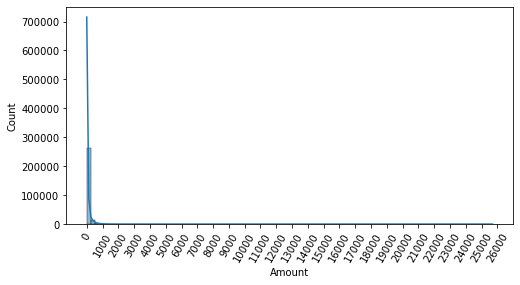

In [56]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()

In [57]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [58]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081, F1: 0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500, F1: 0.8409, AUC:0.9779


In [59]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환 
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [60]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014, F1: 0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635, F1: 0.8496, AUC:0.9796


## 이상치 데이터 제거 후 모델 학습/예측/평가

<AxesSubplot:>

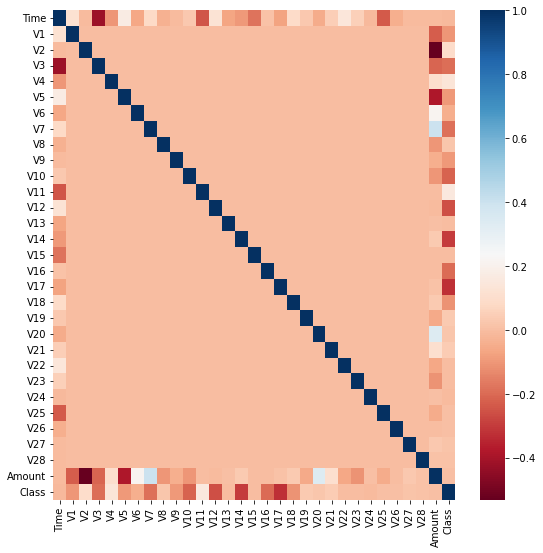

In [61]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [62]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [63]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [64]:
# get_processed_df()를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712, F1: 0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288, F1: 0.8897, AUC:0.9780


## SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [65]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 0    199020
1    199020
Name: Class, dtype: int64


In [66]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247, F1: 0.1023, AUC:0.9737


In [67]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

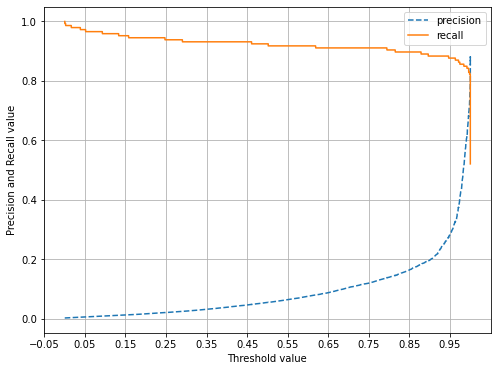

In [68]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [69]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9118, 재현율: 0.8493, F1: 0.8794, AUC:0.9814


# 11 스태킹 앙상블

## 기본 스태킹 모델

In [70]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train , X_test , y_train , y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

In [71]:
# 개별 ML 모델을 위한 Classifier 생성
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 Stacking 모델을 위한 Classifier 생성
lr_final = LogisticRegression(C=10)

In [72]:
# 개별 모델들을 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [73]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f} :'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도: 0.9561 :


In [74]:
knn_pred # 반환된 예측 데이터 세트는 1차원 형태의 ndarray

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1])

In [75]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [76]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , final)))

최종 메타 모델의 예측 정확도: 0.9737


## CV 세트 기반의 스태킹

In [77]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):

    # 지정된 n_folds 값으로 KFold 생성
    kf = KFold(n_splits=n_folds, shuffle=False)
    
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__,'model 시작 ')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        
        # 입력된 학습 데이터에서 기반 모델이 학습/ 예측할 폴드 데이터 셋 추출
        print('\t 폴드 세트: ', folder_counter, ' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(X_tr, y_tr)
        
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index,:] = model.predict(X_te).reshape(-1,1)
        
        # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:, folder_counter] = model.predict(X_test_n)
        
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

In [78]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [79]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)

print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:',Stack_final_X_train.shape,
     '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [80]:
lr_final.fit(Stack_final_X_train,y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test,stack_final)))

최종 메타 모델의 예측 정확도: 0.9737
